#Carga de datos

Imporando Librerias

In [0]:
import pandas as pd
import numpy as np

### Cargando *Dataset*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ds1.zip to ds1 (1).zip


In [0]:
import io
import json
from zipfile import ZipFile
lista = []

with ZipFile(io.BytesIO(uploaded['ds1.zip']), 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
     # Check filename endswith csv
     #print(fileName)
     if fileName.endswith('.json'):
       with zipObj.open(fileName) as file_text:
         #zipObj.extract(fileName, 'temp_csv')
         d = file_text.read()
         d = json.loads(d)
         #print(d['text'])
         lista.append(d['text'])  
         # Extract a single file from zip

In [0]:
df = pd.DataFrame(lista,columns=['News'])

# Analisis Exploratorio
1. (https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)
2. (https://rubikscode.net/2019/06/03/guide-to-exploratory-data-analysis-with-python/)

##Descripcion del dataset

Dimensiones del dataset

In [0]:
print(df.shape)

(1000, 1)


Muestra los 5 primeros documentos

In [0]:
print(df.head(5))

                                                News
0  Garantía 12 meses (1 año) Comentarios del anun...
1  Cinco militares mexicanos murieron y 10 result...
2  EL NACIONAL WEB 1 de octubre 2016 - 03:58 pm L...
3  ACTUALIZA 3-Clinton busca mantener a Trump a l...
4  La pregunta no puede contener URLs Tu nombre T...


Descripción del dataset

In [0]:
print(df.describe())

                                                     News
count                                                1000
unique                                                983
top     La pregunta no puede contener URLs Tu nombre T...
freq                                                   15


Así, vemos que este dataset tiene 1000 instancias con 1 atributos, vemos la lista de los 5 primeros registros, y observamos que el datasets tiene solo textro. Por último, podemos ver el número de registros que hay en el dataset, los valores unicos y el texto mas largo.

Informacion del dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
News    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


##Pre - Procesamiento

###Eliminacion de duplicados

In [0]:
df = df.drop_duplicates()

In [0]:
df.describe()

News
count                                                 983
unique                                                983
top     El presidente, Luis Guillermo Solís, inauguró ...
freq                                                    1

### Eliminación de ruido

Definamos de forma aproximada la eliminación de ruido como tareas de normalización de texto específico que a menudo tienen lugar antes de la tokenización. Yo diría que, aunque los otros 2 pasos principales del marco de preprocesamiento (tokenización y normalización) son básicamente independientes de la tarea, la eliminación del ruido es mucho más específica de la tarea.
Las tareas de eliminación de ruido de muestra podrían incluir:
1. eliminar encabezados de archivos de texto, pies de página
2. eliminar HTML, XML, etc. marcado y metadatos
3. extraer datos valiosos de otros formatos, como JSON

Como se puede imaginar, el límite entre la eliminación de ruido y la recopilación y el ensamblaje de datos, por un lado, es confuso, mientras que la línea entre la eliminación de ruido y la normalización se ve borrosa por el otro. Dada su estrecha relación con textos específicos y su recopilación y montaje, muchas tareas de eliminación de ruido, como el análisis sintáctico de una estructura JSON, obviamente tendrían que implementarse antes de la tokenización.

En nuestro caso la eliminacion de ruido solo constara de la eliminacion de las palabras entre corchetes

Librerias

In [0]:
import re
#import contractions

####Quita entre corchetes

In [0]:
text = 'hola a todos / hellow for all - (saludo + hola*todos) [fin]'
re.sub('\[[^]]*\]', '', text)

'hola a todos / hellow for all - (saludo + hola*todos) '

####Quitar entre parentesis

In [0]:
text = 'hola a todos / hellow for all - (saludo + hola*todos) [fin]'
re.sub('\([^)]*\)', '', text)

'hola a todos / hellow for all -  [fin]'

####Aunque no es obligatorio hacerlo en esta etapa antes de la tokenización (encontrarás que esta afirmación es la norma para el ordenamiento relativamente flexible de las tareas de preprocesamiento de datos de texto), reemplazar las contracciones con sus expansiones puede ser beneficioso en este punto, ya que nuestro tokenizador de palabras Dividirá palabras como “did not” en “did” y “not”. No es imposible remediar esta tokenización en una etapa posterior, pero hacerlo antes lo hace más fácil y directo. (Este paso es comunmente utilizado en textos en ingles)

In [0]:
contractions.fix(text)

'hola a todos / hellow for all - (saludo + hola*todos) [fin]'

####Eliminacion de ruido en DataFrame

In [0]:
def ruido(text):
  #Corchetes y contenido
  text = re.sub('\[[^]]*\]', '', str(text))
  #Parentesis y contenido
  text = re.sub('\([^)]*\)', '', str(text))
  return text

In [0]:
for r in range(len(df['News'])):
  df['News'][r]=ruido(df['News'][r])

### Eliminar valores vacios 


De estas informaciones ya podemos ver que algunas características no serán relevantes en nuestro análisis exploratorio ya que hay demasiados valores faltantes (como Alley y PoolQC). Además, hay tantas características para analizar que puede ser mejor concentrarse en las que nos pueden dar una idea real. Simplemente eliminemos Id y las características con 30% o menos valores de NaN.

In [0]:
df.isna().sum()

News    0
dtype: int64

In [0]:
df.isnull().sum()

News    0
dtype: int64

In [0]:
df.drop(titanic[df.age.isnull()].index, inplace = True)

###Eliminar textos muy cortos

In [0]:
#Valor minimo
df.min()

News    \n53' | Javier Cortés queda tendido en el camp...
dtype: object

In [0]:
#Valor maximo
df.max()

News    ﻿ NYT: En Venezuela, la falta de medicinas lle...
dtype: object

In [0]:
#Guardando los largos de los documentos
largo=[]
for l in df['News']:
  largo.append(len(l))

In [0]:
#Ordenado acendente
#df_largo.sort_values('len',ascending=False)

## Analisis Exploratorio 

**Referencias**
1. https://seaborn.pydata.org/generated/seaborn.scatterplot.html
2. https://seaborn.pydata.org/generated/seaborn.pairplot.html

### Analisando la distribucion de los largos de los documentos

Importando librerias de graficos

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Almacenando largo de los documentos

In [0]:
#Variable para almacenar el largo de cada documento
largo = []
#Recorriendo documentos
for x in df['News']:
  #Agregando el largo de los documentos a la variable largo
  largo.append(len(x))

In [0]:
df['len'] = largo

In [0]:
df.head(2)

News   len
0  Garantía 12 meses (1 año) Comentarios del anun...   437
1  Cinco militares mexicanos murieron y 10 result...  2238

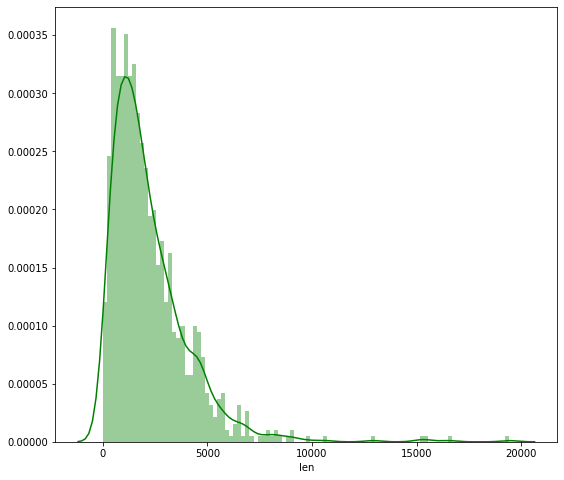

In [0]:
#Graficando largo de documentos
plt.figure(figsize=(9, 8))
sns.distplot(df_largo['len'], color='g', bins=100, hist_kws={'alpha': 0.4});

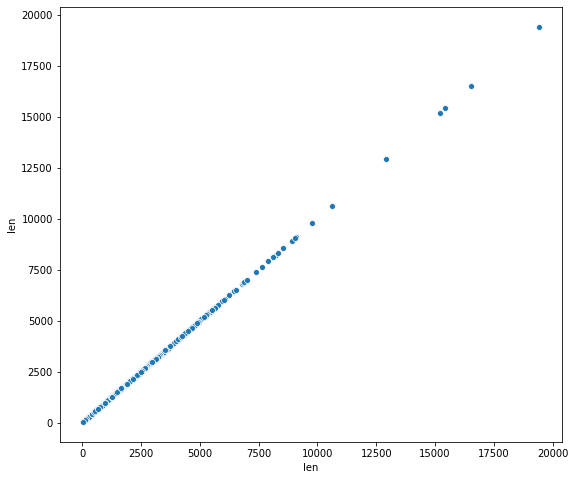

In [0]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x="len", y="len", data=df)

### Analisando frecuencia del largo de los documentos

Guardando valores unicos

In [0]:
#Valores unicos
unique = df['len'].unique()

Capturando la frcuencia de palabras

In [0]:
#Frecuencia
freq_len = df['len'].value_counts(ascending = False)#.values

Guardando valores unicos con sus frecuencias en un dataframe

In [0]:
freq = []
for f in unique:
  freq.append([f,freq_len.get(f)])
#len(freq_len)
df_freq = pd.DataFrame(freq,columns=['len','freq'])

In [0]:
df_freq.head(2)

len  freq
0   437     3
1  2238     1

Grafico que muestra la distribucion de loslargos de los temas con la misma frecuencia

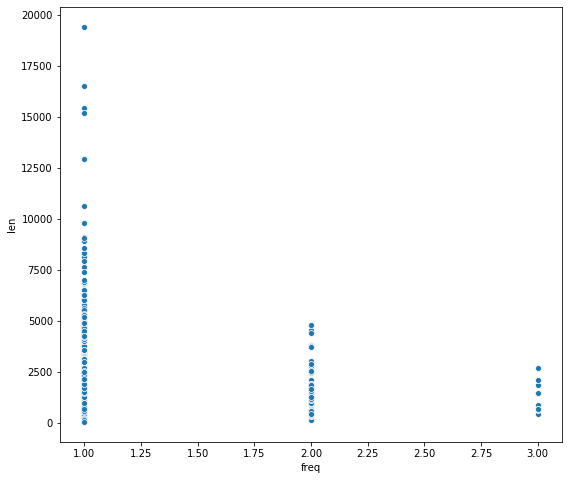

In [0]:
plt.figure(figsize=(9, 8))
sns.scatterplot(x="freq", y="len", data=df_freq)

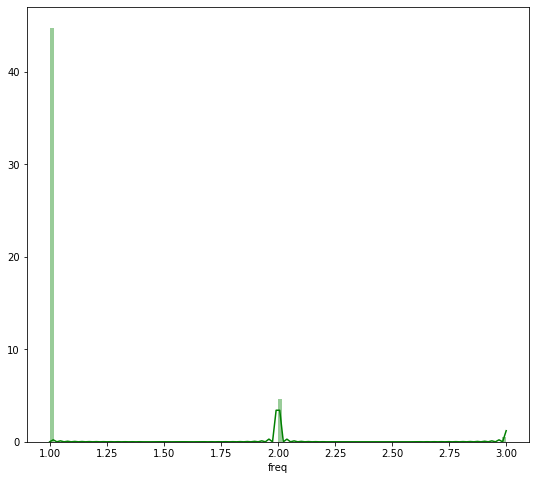

In [0]:
#Graficando largo de documentos
plt.figure(figsize=(9, 8))
sns.distplot(df_freq['freq'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [0]:
tips.head(4)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2

# Procesamiento del lenguje natural

## Tokenizacion

La tokenización es un paso que divide cadenas de texto más largas en piezas más pequeñas o tokens. Los trozos de texto más grandes pueden ser convertidos en oraciones, las oraciones pueden ser tokenizadas en palabras, etc. El procesamiento adicional generalmente se realiza después de que una pieza de texto ha sido apropiadamente concatenada. La tokenización también se conoce como segmentación de texto o análisis léxico. A veces la segmentación se usa para referirse al desglose de un gran trozo de texto en partes más grandes que las palabras (por ejemplo, párrafos u oraciones), mientras que la tokenización se reserva para el proceso de desglose que se produce exclusivamente en palabras.

Existen multiples librerias para realizar este proceso pero en nuestro caso, utilizaremos SPACY ya que ademas de realizar este proceso cuenta con un diccionario contundente en español y contiene otros procesos como la lemmatizacion, normalizacion y stop-words dentro de sus propiedades tras la tokenizacion, ademas de tener incluida su propia libreria de visualizacion.
Dentro del proceso de tokenizacion la variacion de los resultados con distintas librerias es minima por no decir nula.

Spacy

Para comenzar a trabajar con spacy, primero tenemos que cargar el modelo en español.

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
df['News'][0]

'Garantía 12 meses (1 año) Comentarios del anunciante \nVehiculo en buen estado, mantenimientos al dia, libro de revisiones, motor 3.0 Di 154 cv, 7 plazas, lunas tintadas, bola de remolque, estribos laterales, defensa delantera todo homologado, KILOMETROS DEMOSTRABLES!!! GARANTIA UN AÑO. Se acepta vehículo como parte de pago. IRURI MOTOR, desde 1971, ESPECIALISTAS EN 4X4, GRAN VARIEDAD DE VEHICULOS. COMPRAMOS SU 4X4 Equipamiento extra '

In [0]:
doc = nlp(df['News'][0])

In [0]:
for token in doc:
    print(token.text, end=' | ')

Garantía | 12 | meses | ( | 1 | año | ) | Comentarios | del | anunciante | 
 | Vehiculo | en | buen | estado | , | mantenimientos | al | dia | , | libro | de | revisiones | , | motor | 3.0 | Di | 154 | cv | , | 7 | plazas | , | lunas | tintadas | , | bola | de | remolque | , | estribos | laterales | , | defensa | delantera | todo | homologado | , | KILOMETROS | DEMOSTRABLES | ! | ! | ! | GARANTIA | UN | AÑO | . | Se | acepta | vehículo | como | parte | de | pago | . | IRURI | MOTOR | , | desde | 1971 | , | ESPECIALISTAS | EN | 4X4 | , | GRAN | VARIEDAD | DE | VEHICULOS | . | COMPRAMOS | SU | 4X4 | Equipamiento | extra | 

En la tokenizacion se toman en consideracion:

*   Prefijo: Carácter (s) al principio ▸ $ (“¿
*   Sufijo: Carácter (s) al final ▸ km),. ! "
*   Infijo: Carácter (s) entre ▸ - - / ...
*   Excepción: regla de caso especial para dividir una cadena en varios tokens o evitar que un token se divida cuando se aplican las reglas de puntuación ▸ St. U.S.




### Prefixes, Suffixes and Infixes
spaCy aislará la puntuación que no forme parte integral de una palabra. Las comillas, las comas y la puntuación al final de una oración se les asignará su propio token. Sin embargo, la puntuación que existe como parte de una dirección de correo electrónico, sitio web o valor numérico se mantendrá como parte del token.

In [0]:
doc2 = nlp(u'¡Estamos aquí para ayudar! ¡Envíe un correo postal, envíe un correo electrónico a support@oursite.com o visítenos en http://www.otrositio.com!')
for t in doc2:
    print(t)

¡
Estamos
aquí
para
ayudar
!
¡
Envíe
un
correo
postal
,
envíe
un
correo
electrónico
a
support@oursite.com
o
visítenos
en
http://www.otrositio.com
!


Hay que tener en cuenta que los signos de exclamación, la coma y el guión en 'snail-mail' tienen asignados sus propios tokens, aunque se conservan tanto la dirección de correo electrónico como el sitio web.

### Excepcines

La puntuación que existe como parte de una abreviatura conocida se mantendrá como parte del token.

In [0]:
doc4 = nlp(u"El siguiente lugar a visitar es la A.V grecia en EE.UU")
for t in doc4:
    print(t)

El
siguiente
lugar
a
visitar
es
la
A.V
grecia
en
EE.UU


Aquí se conservan las abreviaturas de "Avenida" y "Estados Unidos".

### Numero de tokens
Los objetos Doc tienen un número establecido de tokens:


In [0]:
len(doc2)

23

### Contando entradas de vocabulario
¡Los objetos de vocabulario contienen una biblioteca completa de artículos!

In [0]:
len(doc2.vocab)

1229971


NOTA: Este número cambia según la biblioteca de idiomas utilizada.

### Los tokens se pueden recuperar por posición de índice y corte
Los objetos Doc pueden considerarse como listas de objetos token. Como tal, los tokens individuales se pueden recuperar por posición de índice, y los tramos de tokens se pueden recuperar mediante el corte:

In [0]:
doc5 = nlp(u'Es mejor dar que recibir.')

# Recuperar el tercer token:
doc5[2]

dar

In [0]:
# Recuperar 2 tokens del medio:
doc5[2:4]

dar que

In [0]:
# Recuperar los 4 ultimos tokens:
doc5[-4:]

dar que recibir.

### Las fichas no se pueden reasignar
Aunque los objetos Doc pueden considerarse listas de tokens, no admiten la reasignación de elementos:

In [0]:
doc6 = nlp(u'La cena fue horrible.')
doc7 = nlp(u'La cena estubo deliciosa.')

In [0]:
#Intenta cambiar "La cena fue horrible" a "La cena estuvo deliciosa"
doc6[3] = doc7[3]

TypeError: ignored

### Entidades nombradas
Yendo un paso más allá de los tokens, las entidades con nombre agregan otra capa de contexto. El modelo de lenguaje reconoce que ciertas palabras son nombres organizacionales, mientras que otras son ubicaciones, y aún otras combinaciones se relacionan con dinero, fechas, etc. Las entidades nombradas son accesibles a través de la propiedad ents de un objeto Doc.

In [0]:
doc8 = nlp(u'Apple construirá una fábrica en Hong Kong por $6 millones')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | construirá | una | fábrica | en | Hong | Kong | por | $ | 6 | millones | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - LOC - Non-GPE locations, mountain ranges, bodies of water


Observe cómo dos tokens se combinan para formar la entidad Hong Kong

In [0]:
len(doc8.ents)

2

El reconocimiento de entidad con nombre (NER) es una importante herramienta de aprendizaje automático aplicada al procesamiento del lenguaje natural.

### Trozos sustantivos
Similar a Doc.ents, Doc.noun_chunks son otra propiedad de objeto. Los fragmentos nominales son "frases nominales básicas", frases planas que tienen un sustantivo como cabeza. Puedes pensar en los fragmentos de sustantivos como un sustantivo más las palabras que describen el sustantivo; por ejemplo, en la canción de Sheb Wooley de 1958, un * "una persona de un solo ojo, un cuerno, volador y púrpura" * sería un fragmento largo de sustantivo .

In [0]:
doc9 = nlp(u"Los automóviles autónomos transfieren la responsabilidad del seguro hacia los fabricantes.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Los automóviles
la responsabilidad
seguro
los fabricantes


In [0]:
doc10 = nlp(u"autos rojos no tienen tasas de seguro más altas.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

autos
tasas
seguro


In [0]:
doc11 = nlp(u"Era un devorador de gente morada, tuerto y con un solo ojo.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

un devorador
gente
un solo ojo


### Visualizadores incorporados
spaCy incluye una herramienta de visualización integrada llamada DisplaCy. DisplaCy puede detectar si está trabajando en una computadora portátil Jupyter y devolverá el marcado que se puede representar en una celda de inmediato. Cuando exporte su cuaderno, las visualizaciones se incluirán como HTML.

**Visualizar el análisis de dependencia.**
A continuación importaremos desplacy para el gráfico de dependencia

In [0]:
from spacy import displacy

doc = nlp(u'Apple va a construir una fábrica en U.K por $ 6 millones.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

El argumento opcional 'distancia' establece la distancia entre tokens. Si la distancia es demasiado pequeña, el texto que aparece debajo de las flechas cortas puede estar demasiado comprimido para leer.

**Visualizar el reconocedor de entidades**

In [0]:
doc = nlp(u'Durante el último trimestre, Apple vendió casi 20 mil iPods con una ganancia de $ 6 millones.')
displacy.render(doc, style='ent', jupyter=True)

## Normalizacion

La normalización generalmente se refiere a una serie de tareas relacionadas destinadas a poner todo el texto en igualdad de condiciones: convirtiendo todo el texto en el mismo caso (superior o inferior), eliminando la puntuación, convirtiendo los números a sus equivalentes de palabras, y así sucesivamente. La normalización pone todas las palabras en pie de igualdad, y permite que el procesamiento proceda de manera uniforme.
La normalización del texto puede significar realizar una serie de tareas, pero para nuestro marco abordaremos la normalización en 3 pasos distintos: (1) derivación, (2) lematización y (3) Eliminacion de caracteres. Para obtener información específica sobre cuáles pueden ser estos distintos pasos, consulte esta publicación .
Recuerde, después de la tokenización, ya no estamos trabajando en un nivel de texto, pero ahora a nivel de palabra. Nuestras funciones de normalización, que se muestran a continuación, reflejan esto. Los nombres de funciones y los comentarios deben proporcionar la información necesaria sobre lo que hace cada uno.

### Stemming
A menudo, al buscar texto para una determinada palabra clave, ayuda si la búsqueda devuelve variaciones de la palabra. Por ejemplo, la búsqueda de "barco" también podría devolver "barcos" y "paseos en bote". Aquí, "bote" sería el vástago de [bote, navegante, navegación, botes].

La derivación es un método algo tosco para catalogar palabras relacionadas; esencialmente corta letras desde el final hasta que se alcanza el tallo. Esto funciona bastante bien en la mayoría de los casos. De hecho, spaCy no incluye un stemmer, sino que opta por confiar completamente en la lematización. Para aquellos interesados, hay algunos antecedentes sobre esta decisión aquí.

En su lugar, utilizaremos otra herramienta popular de PNL llamada nltk, que significa Natural Language Toolkit.

Existen multiples librerias que realizan este procedimiento, pero los algoritmos son los mismos.
La mayor parte de los algoritmos estan diseñados para el ingles, pero se pueden utilizar con textos en español, no con resultados optimos.

#### Porter Stemmer
Una de las herramientas de derivación más comunes y efectivas es el algoritmo de Porter desarrollado por Martin Porter en 1980. El algoritmo emplea cinco fases de reducción de palabras, cada una con su propio conjunto de reglas de mapeo. En la primera fase, se definen reglas simples de mapeo de sufijos, tales como:

![texto alternativo](https://i.imgur.com/2omE9lP.png)


De un conjunto dado de reglas derivadas, solo se aplica una regla, basada en el sufijo más largo S1. Así, las caricias se reducen a caricias pero no a preocupaciones.

Las fases más sofisticadas consideran la longitud / complejidad de la palabra antes de aplicar una regla. Por ejemplo:

![texto alternativo](https://i.imgur.com/f34esOE.png)

Aquí m> 0 describe la "medida" del tallo, de modo que la regla se aplica a todos los tallos menos a los más básicos.

**Nota:** Este metodo esta diseñado para las palabras en ingles, por lo que en el español no funciona muy bien

In [0]:
#Importar el kit de herramientas y la biblioteca completa de Porter Stemmer
import nltk

from nltk.stem.porter import *

In [0]:
p_stemmer = PorterStemmer()

In [0]:
words = ['correr','corredor','corriendo','corrido','corredor','facilmente','bastante']

In [0]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

correr --> correr
corredor --> corredor
corriendo --> corriendo
corrido --> corrido
corredor --> corredor
facilmente --> facilment
bastante --> bastant


#### Snowball Stemmer
Esto es algo inapropiado, ya que Snowball es el nombre de un lenguaje derivado desarrollado por Martin Porter. El algoritmo utilizado aquí se llama con mayor precisión "Porter2 Stemmer". Ofrece una ligera mejora con respecto a la potencia original de Porter, tanto en lógica como en velocidad. Como nltk usa el nombre SnowballStemmer, lo usaremos aquí.

Este modelo funciona mejor en español debido a que al momento de utilizar el moelo Snowball Stemmer requiere que pases un parámetro de idioma, que incluye el español.

In [0]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='spanish')

In [0]:
words = ['correr','corredor','corriendo','corrido','corredor','facilmente','bastante']

In [0]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

correr --> corr
corredor --> corredor
corriendo --> corr
corrido --> corr
corredor --> corredor
facilmente --> facil
bastante --> bastant


En este caso, el stemmer realizó lo mismo que el Porter Stemmer, con la excepción de que manejó el tallo de "facilmente" más apropiadamente con "facil", al igual con correr aunque pierde algunas letras.

### Lematización
A diferencia de la derivación, la lematización va más allá de la reducción de palabras y considera el vocabulario completo de un idioma para aplicar un análisis morfológico a las palabras. El lema de 'fue' es 'se' y el lema de 'raton' es 'raton'. Además, el lema de 'juntare' podría ser 'juntar' o 'reunir' dependiendo de su uso en una oración.

la lemmatizacion se puede realizar con diferentes librerias, pero la mayor parte de estas esta diseñada para palabras en ingles. Nosotros utilizaremos Spacy ya que estacuenta con un diccionario amplio en español, ademas veremos la lemmatizacion con nltk para ver como se comporta con los terminos en español.

####Lemmatizer nltk

In [0]:
from nltk.stem import WordNetLemmatizer

In [0]:
import nltk
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [0]:
from nltk.corpus import wordnet as wn

In [0]:
doc1 = nlp(u"Soy un corredor corriendo en una carrera porque me encanta correr desde que corrí hoy por lo que fue una bonit carrera cuando fui a correr")
lemm = []
for l in doc1:
  if wn.lemmas(str(l),lang='spa'):
    lemm.append(wn.lemmas(str(l),lang='spa')[0].name())
    #print(wn.synsets(str(l),lang='spa')[0].lemma_names('spa'))
  else:
    #print(l)
    lemm.append(l)
print(lemm)

[Soy, un, 'corredor', corriendo, 'en', una, 'carrera', porque, me, encanta, 'correr', desde, que, corrí, 'hoy', 'por', lo, que, fue, una, bonit, 'carrera', cuando, fui, 'A', 'correr']


In [0]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
lem = WordNetLemmatizer()
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
for word in doc1:
  # Get the single character pos constant from pos_tag like this:
  pos_label = (pos_tag(word_tokenize(str(word)))[0][1][0]).lower()

  # pos_refs = {'n': ['NN', 'NNS', 'NNP', 'NNPS'],
  #            'v': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
  #            'r': ['RB', 'RBR', 'RBS'],
  #            'a': ['JJ', 'JJR', 'JJS']}

  if pos_label == 'j': pos_label = 'a'    # 'j' <--> 'a' reassignment

  if pos_label in ['r']:  # For adverbs it's a bit different
    print(wordnet.synset(word+'.r.1',lang='spa').lemma_names('spa')[0].pertainyms()[0].name())
  elif pos_label in ['a', 's', 'v']: # For adjectives and verbs
    print(lem.lemmatize(word, pos=pos_label))
  else:   # For nouns and everything else as it is the default kwarg
    print(lem.lemmatize(str(word)))

Soy
un
corredor
corriendo
en
una
carrera
porque
me
encanta
correr
desde
que
corrí
hoy
por
lo
que
fue
una
bonit
carrera
cuando
fui
a
correr


#### Lemmatizer spacy

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
for l in nlp("col como te ha ido en este mes, año"):
  print(l.lemma_)

col
comer
te
haber
ir
en
este
mes
,
año


In [0]:
lemm2 = []
for l in doc1:
  lemm2.append(l.lemma_)
print(lemm2)

['Soy', 'uno', 'corredor', 'correr', 'en', 'uno', 'carrera', 'porque', 'me', 'encantar', 'correr', 'desde', 'que', 'correr', 'hoy', 'por', 'el', 'que', 'ser', 'uno', 'bonit', 'carrera', 'cuando', 'ser', 'a', 'correr']


In [0]:
doc1 = nlp(u"Soy un corredor corriendo en una carrera porque me encanta correr desde que corrí hoy")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

Soy 	 AUX 	 633139548010732535 	 Soy
un 	 DET 	 8171375619591740969 	 uno
corredor 	 NOUN 	 16214897375728715296 	 corredor
corriendo 	 VERB 	 10468945644875678183 	 correr
en 	 ADP 	 14626626061804382878 	 en
una 	 DET 	 8171375619591740969 	 uno
carrera 	 NOUN 	 17410845618979305672 	 carrera
porque 	 SCONJ 	 5757082442330786044 	 porque
me 	 PRON 	 18197037023634208128 	 me
encanta 	 VERB 	 13479814939995592147 	 encantar
correr 	 VERB 	 10468945644875678183 	 correr
desde 	 ADP 	 15141126369269946138 	 desde
que 	 SCONJ 	 11474801393294414462 	 que
corrí 	 VERB 	 10468945644875678183 	 correr
hoy 	 ADV 	 13035178216107647832 	 hoy


En la oracion anterior, podemos notar que corriendo, correr y corri, apuntan a la misma direccion del lemma (...8183) para evitar duplicados.

Podemos notar que con este metodo a difrencia de el stemmer no ocurre que se cortan palabras, por lo que se podria decir que es mejor.

**Función para mostrar lemas**
Dado que la pantalla de arriba es escalonada y difícil de leer, escribamos una función que muestre la información que queremos de manera más clara.

In [0]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Aquí estamos usando una cadena f para formatear el texto impreso estableciendo anchos de campo mínimos y agregando una alineación a la izquierda al valor de hash del lema.

In [0]:
doc2 = nlp(u"¡Vi dieciocho ratones hoy!")

show_lemmas(doc2)

¡            PUNCT  2520741703198981157    ¡
Vi           VERB   7634836707563084333    Vi
dieciocho    NUM    18174547961274255906   dieciocho
ratones      NOUN   16416717874964675269   ratón
hoy          ADV    13035178216107647832   hoy
!            PUNCT  17494803046312582752   !


Observe que el lema de ratones es raton, sin embargo, dieciocho es su propio número, no una forma expandida de ocho.


In [0]:
doc3 = nlp(u"Me reuniré con él mañana en la reunión.")

show_lemmas(doc3)

Me           PRON   17688641098104964042   Me
reuniré      VERB   1993692187206939587    reunir
con          ADP    6945313634251781056    con
él           PRON   15857385564908023410   él
mañana       ADV    15916546618663248448   mañana
en           ADP    14626626061804382878   en
la           DET    12507729120330568444   lo
reunión      NOUN   3869048914498630981    reunión
.            PUNCT  12646065887601541794   .


Aquí el lema de la reunire está determinado por reunir, tambien podemos observar que el lema de la es lo.

In [0]:
doc4 = nlp(u"Ese es un enorme automóvil")

show_lemmas(doc4)

Ese          PRON   9548668832634925705    Ese
es           AUX    940341820454552972     ser
un           DET    8171375619591740969    uno
enorme       ADJ    1204841031276129712    enorme
automóvil    NOUN   13626179457562665607   automóvil


Tenga en cuenta que la lematización no reduce las palabras a su sinónimo más básico, es decir, como podemos observar es se transforma en ser.

###Eliminacion de caracteres
Drentro de los textos existen caracteres que no son reprecentativos en los quextos o que no tienen relevancia en el prrocesamiento del lenguaje natural como *,^,-,(),%,$,·,etc...

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
import re, string, unicodedata

####Elimina Las palabras no existentes en el codigo ASCII

In [0]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', str(word)).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

####Convertir caracteres a minuscula

In [0]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = str(word).lower()
        new_words.append(new_word)
    return new_words

####Remover los caracteres

In [0]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', str(word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

####Transforma numeros a letras

In [0]:
import inflect
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if str(word).isdigit():
            new_word = p.number_to_words(str(word))
            new_words.append(new_word)
        else:
            new_words.append(str(word))
    return new_words

####Eliminar palabras que no son alfanumericas

In [0]:
def alpha_numeric(words):
for word in doc:
  new_words = []
  if word:
    new_words.append(str(word).is_alpha))
  return new_words

####Prueba funciones

In [0]:
doc = nlp('hola a todos / hellow for all - (saludo + hola*todos) [fin]')
doc222 = nlp('!"·"%$%&%&&(/ ()=?¿*^ PPP¨KJGF3234REXSDF 3fdg 32423)')

In [0]:
print(remove_non_ascii(doc222))

['!', '"', '', '"', '%', '$', '%', '&', '%', '&', '&', '(', '/', '(', ')', '=', '?', '', '*', '^', 'PPP KJGF3234REXSDF', '3fdg', '32423', ')']


In [0]:
print(to_lowercase(doc222))


['!', '"', '·', '"', '%', '$', '%', '&', '%', '&', '&', '(', '/', '(', ')', '=', '?', '¿', '*', '^', 'ppp¨kjgf3234rexsdf', '3fdg', '32423', ')']


In [0]:
print(remove_punctuation(doc222))


['PPPKJGF3234REXSDF', '3fdg', '32423']


In [0]:
print(replace_numbers(doc222))

['!', '"', '·', '"', '%', '$', '%', '&', '%', '&', '&', '(', '/', '(', ')', '=', '?', '¿', '*', '^', 'PPP¨KJGF3234REXSDF', '3fdg', 'thirty-two thousand, four hundred and twenty-three', ')']


### Stop-Words
Palabras como "a" y "el" aparecen con tanta frecuencia que no requieren un etiquetado tan completo como los sustantivos, verbos y modificadores. Llamamos a estas palabras de detención, y se pueden filtrar del texto para procesar. spaCy tiene una lista integrada de unas 551 palabras en español.

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
# Imprima el conjunto de palabras de detención predeterminadas de spaCy (recuerde que los conjuntos no están ordenados)
print(nlp.Defaults.stop_words)

{'añadió', 'debe', 'cuantos', 'cuatro', 'sé', 'aquéllos', 'será', 'supuesto', 'aún', 'hubo', 'bastante', 'otra', 'decir', 'próximos', 'sigue', 'mencionó', 'ésa', 'si', 'último', 'pasada', 'pais', 'tanto', 'ninguno', 'ya', 'alguna', 'medio', 'éstas', 'misma', 'algunos', 'informó', 'entonces', 'general', 'esa', 'hay', 'nadie', 'otras', 'varios', 'puede', 'quizás', 'está', 'consigue', 'queremos', 'estuvo', 'enfrente', 'tal', 'mío', 'casi', 'propio', 'pesar', 'emplear', 'quienes', 'muchas', 'cuáles', 'intenta', 'cual', 'segunda', 'este', 'dicen', 'trabajo', 'empleo', 'qeu', 'como', 'podriamos', 'principalmente', 'hoy', 'mis', 'podeis', 'salvo', 'podrán', 'propios', 'informo', 'cualquier', 'tu', 'usan', 'pueden', 'eras', 'propias', 'mismas', 'dia', 'cierta', 'quizas', 'realizado', 'habían', 'que', 'alguno', 'luego', 'trabajamos', 'ultimo', 'última', 'qué', 'según', 'usar', 'aproximadamente', 'modo', 'da', 'éstos', 'mi', 'saber', 'cosas', 'ocho', 'deprisa', 'están', 'conocer', 'te', 'vuestra

In [0]:
len(nlp.Defaults.stop_words)

551

#### Para ver si una palabra es una palabra de parada

In [0]:
#nlp.vocab['saben'].is_stop
nlp.vocab['psoe'].is_stop

False

In [0]:
nlp.vocab['sabran'].is_stop

False

#### Para agregar una palabra de parada
Puede haber ocasiones en las que desee agregar una palabra de detención al conjunto predeterminado. Quizás decida que 'por cierto' (abreviatura común para "por cierto") debe considerarse una palabra de parada.

In [0]:
# Agregue la palabra al conjunto de palabras de detención. Use minúsculas!
nlp.Defaults.stop_words.add('por cierto')

# Establezca la etiqueta stop_word en el lexema
nlp.vocab['por cierto'].is_stop = True

In [0]:
len(nlp.Defaults.stop_words)

552

In [0]:
nlp.vocab['por cierto'].is_stop

True

#### Para eliminar una palabra de parada
Alternativamente, puede decidir que "por cierto" no debe considerarse una palabra de parada.

In [0]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('por cierto')

# Remove the stop_word tag from the lexeme
nlp.vocab['pòr cierto'].is_stop = False

In [0]:
len(nlp.Defaults.stop_words)

551

In [0]:
nlp.vocab['por cierto'].is_stop

True

## Normalizacion de texto

En estas clases se agrupan los pasos de normalizacion vistos anteriormente (Tokenizacion - Lemmatizacion - Stemmer - StopWords - Eliminacion de caracteres) en dos funciones (con y sin Stemmen)

In [8]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')
from nltk import SnowballStemmer

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


###Sin Stemmer

In [0]:
from nltk.stem.snowball import SnowballStemmer
spanishstemmer = SnowballStemmer('spanish')
def normalize(text):
  #Tokenizacion spacy
  doc = nlp(text)
  #Lemmatizacion | Eliminacion de caracteres |Eliminacion de palabras de parada
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Texto a minusculas | Eliminacion de caracteres alfanumericos
  lexical_tokens = [t.lower() for t in words if len(t) > 2 and t.isalpha()]
  #Transformacion de numero a letras - Ingles
  #lexical_tokens=replace_numbers(lexical_tokens)
  #Elimina palabras que no se encuentran en el codigo ASCII
  #lexical_tokens=remove_non_ascii(lexical_tokens)
  #Stemmer
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return lexical_tokens

Sin Stemming para Word 2 Vect

In [0]:
from nltk.stem.snowball import SnowballStemmer
spanishstemmer = SnowballStemmer('spanish')
def normalize_w2v(text):
  #Tokenizacion spac
  doc = nlp(text)
  #Lemmatizacion | Eliminacion de caracteres |Eliminacion de palabras de parada
  words = []
  for t in doc: 
    if (t.is_punct | t.is_stop):
      words.append("<stopword>")
    else:
      words.append(t.lemma_)
  #Texto a minusculas | Eliminacion de caracteres alfanumericos
  lexical_tokens = []
  for t in words: 
    if (len(t) > 2 and t.isalpha()):
      lexical_tokens.append(t.lower())
    else:
      lexical_tokens.append("<stopword>")
  #Transformacion de numero a letras - Ingles
  #lexical_tokens=replace_numbers(lexical_tokens)
  #Elimina palabras que no se encuentran en el codigo ASCII
  #lexical_tokens=remove_non_ascii(lexical_tokens)
  #Stemmer
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return lexical_tokens

### Con Stemmer

In [0]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from string import punctuation
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('spanish')
#normalice
non_words = list(punctuation)
non_words.extend(['¿','¡'])
non_words.extend(map(str,range(10)))
def stem_tokens(tokens, stemmer):
    stemmed = []
    #Stemmer
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
  #Tokenice and normalice
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems

### Resultado

In [0]:
print(tokenize(df['News'][0]))
print(normalize(df['News'][0]))

['garant', 'mes', 'año', 'comentari', 'del', 'anunci', 'vehicul', 'en', 'buen', 'estad', 'manten', 'al', 'dia', 'libr', 'de', 'revision', 'motor', 'di', 'cv', 'plaz', 'lun', 'tint', 'bol', 'de', 'remolqu', 'estrib', 'lateral', 'defens', 'delanter', 'tod', 'homolog', 'kilometr', 'demostr', 'garanti', 'un', 'año', 'se', 'acept', 'vehicul', 'com', 'part', 'de', 'pag', 'iruri', 'motor', 'desd', 'especial', 'en', 'x', 'gran', 'varied', 'de', 'vehicul', 'compr', 'su', 'x', 'equip', 'extra']
['garantia', 'mesar', 'comentarios', 'anunciante', 'vehiculo', 'mantenimiento', 'librar', 'revision', 'motor', 'plaza', 'luna', 'tintar', 'bola', 'remolcar', 'estribo', 'lateral', 'defensa', 'delantero', 'homologar', 'kilometros', 'demostrables', 'garantia', 'ano', 'acepto', 'vehiculo', 'pagar', 'iruri', 'motor', 'especialistas', 'variedad', 'vehiculos', 'compramos', 'equipamiento', 'extra']


### Agregaregar al dataframe los elementos normalizados

In [0]:
text = []
for x in range(len(df['News'])):
  #print(x)
  text.append(normalize(df['News'][x]))

df['text'] = text

## Incrustaciones de palabras o Vectorizacion

**Referencias** 
1. https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
2. https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

En términos muy simplistas, las incrustaciones de palabras son los textos convertidos en números y puede haber diferentes representaciones numéricas del mismo texto. Pero antes de sumergirnos en los detalles de las incrustaciones de Word, debe hacerse la siguiente pregunta: ¿Por qué necesitamos las incrustaciones de Word?

Como resultado, muchos algoritmos de Machine Learning y casi todas las arquitecturas de Deep Learning son incapaces de procesar cadenas  o texto sin formato  en su forma sin procesar. Requieren números como entradas para realizar cualquier tipo de trabajo, ya sea clasificación, regresión, etc. en términos generales. Y con la gran cantidad de datos que está presente en el formato de texto, es imprescindible extraer conocimiento de él y crear aplicaciones. Algunas aplicaciones del mundo real de aplicaciones de texto son: análisis de opiniones de Amazon, etc., clasificación de documentos o noticias o agrupación de Google, etc.

Ahora definamos las incrustaciones de palabras formalmente. Un formato de incrustación de palabras generalmente intenta asignar una palabra usando un diccionario a un vector. Vamos a dividir esta oración en detalles más finos para tener una visión clara.

Eche un vistazo a este ejemplo: oración = "Las incrustaciones de palabras son palabras convertidas en números"

Una palabra  en esta oración puede ser "Incrustaciones" o "números", etc.

Un diccionario  puede ser la lista de todas las palabras únicas en la oración. Entonces, un diccionario puede verse así: ['Palabra', 'Incrustacion', 'ser', 'Convertir', 'Dentro', 'Numero']

Un vector representativo de una palabras puede ser un vector codificado donde 1 representa la posicion donde existe la palabra y 0 donde no. La representación vectorial de "números"  en este formato de acuerdo con el diccionario anterior es [0,0,0,0,0,1] y la conversión es [0,0,0,1,0,0].

Este es solo un método muy simple para representar una palabra en forma vectorial. Veamos diferentes tipos de incrustaciones de palabras o vectores de palabras y sus ventajas y desventajas sobre el resto.

###Diferentes tipos de incrustaciones de palabras

Los diferentes tipos de incrustaciones de palabras se pueden clasificar en dos categorías:

1. Incrustación basada en frecuencia
2. Incrustación basada en predicciones

Tratemos de comprender cada uno de estos métodos en detalle.

Generalmente hay tres tipos de vectores que encontramos en esta categoría.

Vector de conteo
Vector TF-IDF
Vector de ocurrencia conjunta

Veamos en detalle cada uno de estos métodos de vectorización.

#### **Vectores de conteo**

#####**Descripcion**

Considere un Corpus C de documentos D {d1, d2 ... ..dD} y N tokens únicos extraídos del cuerpo C. Los N tokens formarán nuestro diccionario y DX N. dará el tamaño de la matriz M del vector de conteo. Cada fila en la matriz M contiene la frecuencia de tokens en el documento D (i).

Comprendamos esto usando un ejemplo simple.

D1: Es un niño perezoso. Ella también es perezosa.

D2: Neeraj es una persona perezosa.

El diccionario creado puede ser una lista de tokens (palabras) únicos en el corpus = ['Él', 'Ella', 'perezoso', 'niño', 'Neeraj', 'persona']

Aquí, D = 2, N = 6

La matriz de conteo M de tamaño 2 X 6 se representará como:


![texto alternativo](https://i.imgur.com/eJuJkcT.png)


Ahora, una columna también se puede entender como vector de palabras para la palabra correspondiente en la matriz M. Por ejemplo, el vector de palabras para 'perezoso' en la matriz anterior es [2,1] y así sucesivamente. Aquí, las filas corresponden a Los documentos en el corpus y las columnas corresponden a las fichas en el diccionario. La segunda fila en la matriz anterior se puede leer como: D2 contiene 'perezoso': una vez, 'Neeraj': una vez y 'persona' una vez.

Ahora puede haber bastantes variaciones al preparar la matriz M. anterior. Las variaciones serán generalmente

1. La forma en que se prepara el diccionario.
¿Por qué? Porque en las aplicaciones del mundo real podríamos tener un corpus que contiene millones de documentos. Y con millones de documentos, podemos extraer cientos de millones de palabras únicas. Básicamente, la matriz que se preparará como la anterior será muy escasa e ineficiente para cualquier cálculo. Por lo tanto, una alternativa al uso de cada palabra única como elemento del diccionario sería elegir decir las primeras 10,000 palabras según la frecuencia y luego preparar un diccionario.
2. Se toma la cuenta de cada palabra.
Podemos tomar la frecuencia (número de veces que una palabra ha aparecido en el documento) o la presencia (¿ha aparecido la palabra en el documento?) Como la entrada en la matriz de conteo M. Pero, en general, se prefiere el método de frecuencia sobre el último.

A continuación se muestra una imagen representativa de la matriz M para una fácil comprensión.

![texto alternativo](https://i.imgur.com/43yMCaz.png)

#####**Vectorizacion**

CountVectorizer es una herramienta de la libreria de npl sklearn que implementa tanto la tokenización como el recuento de ocurrencias en una sola clase.

El preprocesamiento de texto, la creación de tokens y la capacidad de filtrar palabras vacías están incluidos en CountVectorizer, que crea un diccionario de características y transforma documentos en vectores de características.

Importando CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

Ajustando parametros

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer()
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = normalize,
                lowercase = False,
                #stop_words = spanish_stopwords) #NLTK
                #stop_words = stop_words_sw) #stop-words
                stop_words = nlp.Defaults.stop_words,
                min_df=3,
                max_df=0.95) #Spacy

Creando Vector de conteo

In [0]:
count_train = vectorizer.fit(df['News'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


El ajuste, realiza la normalizacion, eliminacion de palabras de parada y sin relevancia, ademas de crea el vocabulario.(Aplica los parametros establecidos)

In [0]:
bag_of_wors = count_train.transform(df['News'])

In [0]:
bag_of_wors.shape

(1000, 6293)

#####**Dataframe con pesos por documento y palabra**

In [0]:
name_doc = []
for i in range(len(df['News'])):
  name_doc.append('Doc '+str(i))

In [0]:
df_coun_vectorize = pd.DataFrame(bag_of_wors.toarray(),columns=vectorizer.get_feature_names(),index=name_doc)#, index=vectorizer.get_feature_names(),columns=["weights"])

In [0]:
df_coun_vectorize.head()

abajar  abandonar  abarcar  ...  únicamente  único  útil
Doc 0       0          0        0  ...           0      0     0
Doc 1       0          0        0  ...           0      0     0
Doc 2       0          1        0  ...           0      1     0
Doc 3       0          0        0  ...           0      0     0
Doc 4       0          0        0  ...           0      0     0

[5 rows x 6293 columns]

#####**Palabra y peso dominante por documento**

In [0]:
df_count_vectorize_weight = pd.DataFrame(np.amax(df_coun_vectorize.values,axis=1),columns=['weight'])
df_count_vectorize_weight['termino'] = np.argmax(df_coun_vectorize.values,axis=1)

In [0]:
palabra=[]
for i in range(len(df_count_vectorize_weight)):
  palabra.append(vectorizer.get_feature_names()[(df_count_vectorize_weight['termino'][i])])

In [0]:
df_count_vectorize_weight['palabra']=palabra

In [0]:
df_count_vectorize_weight.head()

weight  termino   palabra
0       2     3951     motor
1       7     3865   militar
2       4     2568  festival
3       8     1650   debatir
4       4     5757  teléfono

#####**Top N Palabras mas frecuentes del texto**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df_top_values_cv = df_count_vectorize_weight.sort_values(by='weight',ascending=False)[0:10]

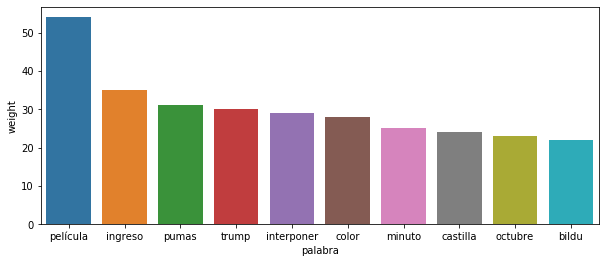

In [0]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x = "palabra", y = "weight", ax=ax, data=df_top_values_cv)

#####**Visualizacion de datos**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

Grafico de dispersion

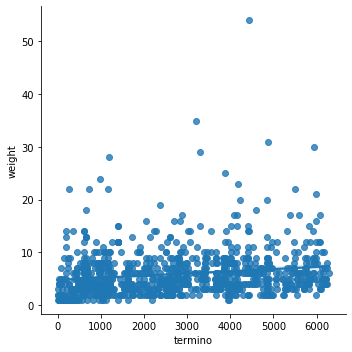

In [0]:
sb.lmplot('termino', 'weight', data=df_count_vectorize_weight, fit_reg=True)

Diagrama de densidad

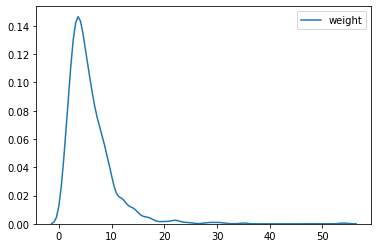

In [0]:
sb.kdeplot(df_count_vectorize_weight.weight)

Diagrama de densidad 2D

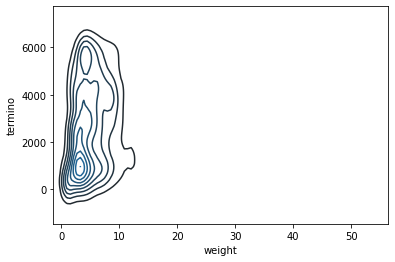

In [0]:
sb.kdeplot(df_count_vectorize_weight.weight, df_count_vectorize_weight.termino)

Histograma con densidad

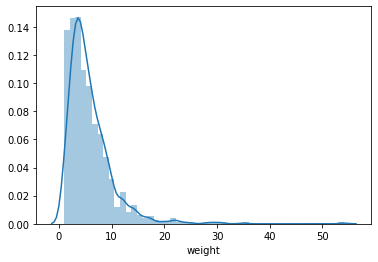

In [0]:
sb.distplot(df_count_vectorize_weight.weight)

Grafico de Caja

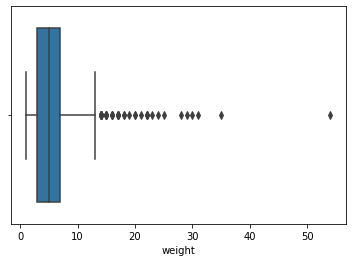

In [0]:
sb.boxplot(df_count_vectorize_weight.weight)

Grafico de violin

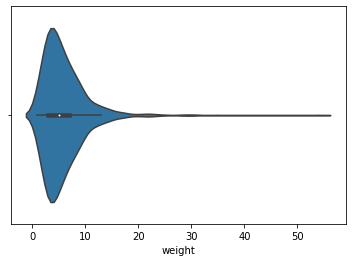

In [0]:
sb.violinplot(df_count_vectorize_weight.weight)

La transformacion, ya entra a la etapa de crear los vectores de palabra y la matriz de co-ocurrencia

#### **Vectorizacion TF-IDF**

#####**Descripcion**

Este es otro método que se basa en el método de frecuencia, pero es diferente a la vectorización de conteo en el sentido de que tiene en cuenta no solo la aparición de una palabra en un solo documento sino en todo el corpus. Entonces, ¿cuál es la razón detrás de esto? Tratemos de entenderlo.

Las palabras comunes como 'es', 'la', 'a' etc. tienden a aparecer con bastante frecuencia en comparación con las palabras que son importantes para un documento. Por ejemplo, un documento A sobre Lionel Messi contendrá más ocurrencias de la palabra "Messi" en comparación con otros documentos. Pero las palabras comunes como "el", etc., también estarán presentes con mayor frecuencia en casi todos los documentos.

Idealmente, lo que queremos es reducir las palabras comunes que aparecen en casi todos los documentos y dar más importancia a las palabras que aparecen en un subconjunto de documentos.

TF-IDF funciona penalizando estas palabras comunes al asignarles pesos más bajos y al mismo tiempo dar importancia a palabras como Messi en un documento en particular.

Entonces, ¿cómo funciona exactamente TF-IDF?

Considere la siguiente tabla de muestra que proporciona el recuento de términos (tokens / palabras) en dos documentos.

![texto alternativo](https://i.imgur.com/auZJYKx.png)

Ahora, definamos algunos términos relacionados con TF-IDF.

 

TF = (Número de veces que el término t aparece en un documento) / (Número de términos en el documento)

Entonces, TF (Este, Documento1) = 1/8

TF (Este, Documento2) = 1/5

Denota la contribución de la palabra al documento, es decir, las palabras relevantes para el documento deben ser frecuentes. Por ejemplo: un documento sobre Messi debe contener la palabra 'Messi' en gran número.

IDF = log (N / n), donde, N es el número de documentos y n es el número de documentos en los que ha aparecido un término t.

donde N es el número de documentos y n es el número de documentos en los que ha aparecido un término t.

Entonces, IDF (Esto) = log (2/2) = 0.


Entonces, ¿cómo explicamos el razonamiento detrás de las FDI? Idealmente, si una palabra ha aparecido en todo el documento, entonces probablemente esa palabra no sea relevante para un documento en particular. Pero si ha aparecido en un subconjunto de documentos, entonces probablemente la palabra tenga alguna relevancia para los documentos en los que está presente.

Calculemos IDF para la palabra 'Messi'.

IDF (Messi) = log (2/1) = 0.301.

Ahora, comparemos el TF-IDF para una palabra común 'Esto' y una palabra 'Messi' que parece ser relevante para el Documento 1.

TF-IDF (Este, Documento1) = (1/8) * (0) = 0

TF-IDF (Este, Documento2) = (1/5) * (0) = 0

TF-IDF (Messi, Documento1) = (4/8) * 0.301 = 0.15

Como puede ver en el Documento 1, el método TF-IDF penaliza fuertemente la palabra 'Esto' pero asigna un mayor peso a 'Messi'. Entonces, esto puede entenderse como 'Messi' es una palabra importante para el Documento1 desde el contexto de todo el corpus.

#####**Vectorizacion**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Ajustando parametros**

In [0]:
vectorizer_tfidf = TfidfVectorizer(
                      analyzer='word',
                      tokenizer= normalize,
                      lowercase= False,
                      stop_words=nlp.Defaults.stop_words,
                      min_df=3,
                      max_df=0.95)

**Creando Vector**

In [14]:
count_train_idf = vectorizer_tfidf.fit(df['News'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


El ajuste, realiza la normalizacion, eliminacion de palabras de parada y sin relevancia, ademas de crea el vocabulario.(Aplica los parametros establecidos)

In [0]:
bag_of_wors_idf = vectorizer_tfidf.transform(df['News'])

La transformacion, ya entra a la etapa de crear los vectores de palabra y la matriz de co-ocurrencia

#####**Palabras con pesos por documento**

In [0]:
name_doc = []
for i in range(len(df['News'])):
  name_doc.append('Doc '+str(i))

In [0]:
df_coun_vectorize_tfidf = pd.DataFrame(bag_of_wors_idf.toarray(),columns=vectorizer_tfidf.get_feature_names(),index=name_doc)

In [156]:
df_coun_vectorize_tfidf.head()

abajar  abandonar  abarcar  ...  únicamente     único  útil
Doc 0     0.0   0.000000      0.0  ...         0.0  0.000000   0.0
Doc 1     0.0   0.000000      0.0  ...         0.0  0.000000   0.0
Doc 2     0.0   0.061551      0.0  ...         0.0  0.050141   0.0
Doc 3     0.0   0.000000      0.0  ...         0.0  0.000000   0.0
Doc 4     0.0   0.000000      0.0  ...         0.0  0.000000   0.0

[5 rows x 6293 columns]

#####**Palabra y peso dominante por documento**

In [0]:
df_count_vectorize_weight_tfidf = pd.DataFrame(np.amax(df_coun_vectorize_tfidf.values,axis=1),columns=['weight'])
df_count_vectorize_weight_tfidf['termino'] = np.argmax(df_coun_vectorize_tfidf.values,axis=1)

In [158]:
df_count_vectorize_weight_tfidf

weight  termino
0    0.344176     3951
1    0.383056     3865
2    0.299589     2568
3    0.451106     5943
4    0.596869     5757
..        ...      ...
995  0.369696     4146
996  0.444110     3237
997  0.424869     3661
998  0.369128     1062
999  0.593022     1048

[1000 rows x 2 columns]

In [0]:
palabra=[]
for i in range(len(df_count_vectorize_weight_tfidf)):
  palabra.append(vectorizer_tfidf.get_feature_names()[(df_count_vectorize_weight_tfidf['termino'][i])])

In [0]:
df_count_vectorize_weight_tfidf['word']=palabra

In [161]:
df_count_vectorize_weight_tfidf.head()

weight  termino      word
0  0.344176     3951     motor
1  0.383056     3865   militar
2  0.299589     2568  festival
3  0.451106     5943     trump
4  0.596869     5757  teléfono

#####**Top N Palabras mas relevantes**

In [0]:
import matplotlib.pyplot as plt
import seaborn

In [0]:
df_top_values_tfidf = df_count_vectorize_weight_tfidf.sort_values(by='weight',ascending=False)[0:10]

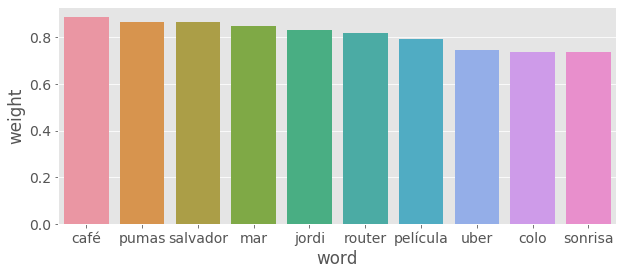

In [164]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x = "word", y = "weight", ax=ax, data=df_top_values_tfidf)

#####**Grafico de Datos**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

Grafico de dispersion

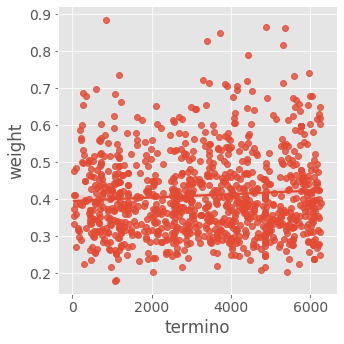

In [165]:
sb.lmplot('termino', 'weight', data=df_count_vectorize_weight_tfidf, fit_reg=True)

Diagrama de densidad

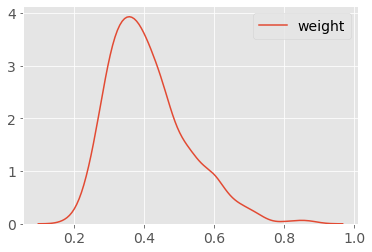

In [166]:
sb.kdeplot(df_count_vectorize_weight_tfidf.weight)

Diagrama de densidad 2D

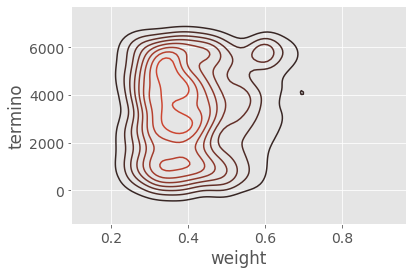

In [167]:
sb.kdeplot(df_count_vectorize_weight_tfidf.weight, df_count_vectorize_weight_tfidf.termino)

Histograma con densidad

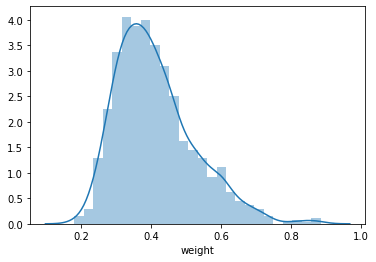

In [0]:
sb.distplot(df_count_vectorize_weight_tfidf.weight)

Boxplot

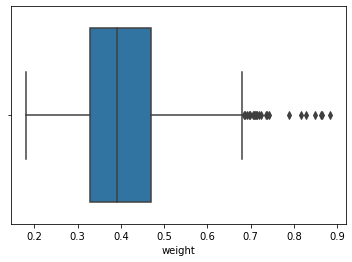

In [0]:
sb.boxplot(df_count_vectorize_weight_tfidf.weight)

Grafico de violin

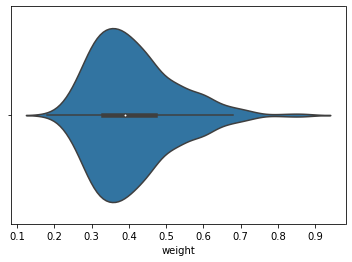

In [0]:
sb.violinplot(df_count_vectorize_weight_tfidf.weight)

#####**Visualizacion SOM**

In [17]:
!pip install somoclu

In [0]:
import somoclu

In [0]:
n_columns=630
n_rows=100
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(bag_of_wors_idf.todense())

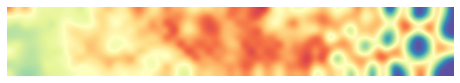

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [22]:
som.view_umatrix()

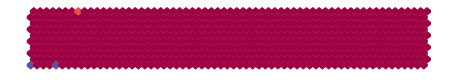

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [23]:
som = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal",
                      compactsupport=False)
som.train(bag_of_wors_idf.todense())
som.view_umatrix()

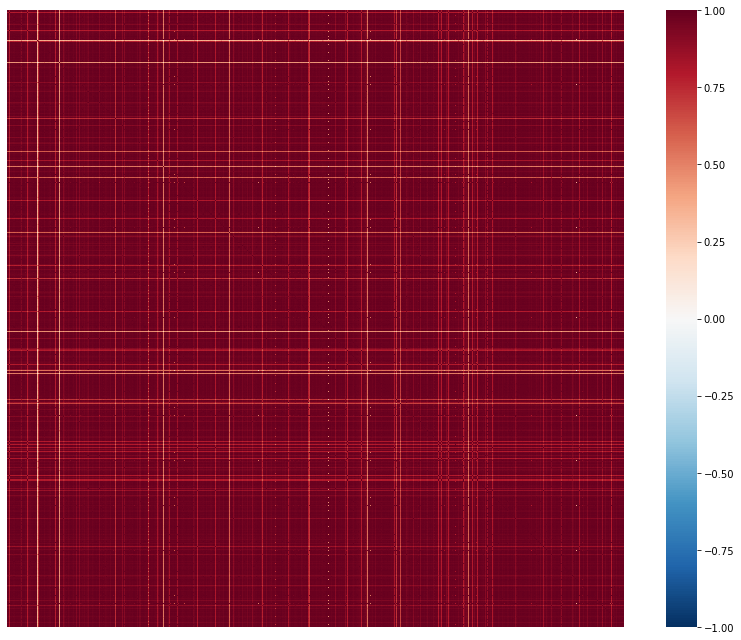

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [24]:
som.view_similarity_matrix()

#### Matriz de coincidencia con una ventana de contexto fija (generalmente se utiliza para crear vectores de palabras y realizar analisis de sentimientos entre otras cosas, Solo informacion para el conocimiento)

#####**Descripcion**

La gran idea : palabras similares tienden a aparecer juntas y tendrán un contexto similar, por ejemplo: Apple es una fruta. El mango es una fruta.
La manzana y el mango tienden a tener un contexto similar, es decir, la fruta.



Antes de profundizar en los detalles de cómo se construye una matriz de coincidencia, hay dos conceptos que deben aclararse: Co-ocurrencia y Ventana de contexto.

**Co-ocurrencia:** para un corpus dado, la coincidencia de un par de palabras que dicen w1 y w2 es la cantidad de veces que han aparecido juntas en una Ventana de contexto.

**Ventana de contexto:** la ventana de contexto se especifica mediante un número y la dirección. Entonces, ¿qué hace una ventana de contexto de 2 (alrededor) significados? Veamos un ejemplo a continuación.

![texto alternativo](https://i.imgur.com/CBMYvyE.png)

Las palabras verdes son una ventana de contexto para la palabra 'Fox' y para calcular la co-ocurrencia solo se consideraran esas palabras. Veamos la ventana de contexto para 'Over'

![texto alternativo](https://i.imgur.com/09vqN9F.png)

Ahora, tomemos un corpus de ejemplo para calcular una matriz de coincidencia.

Corpus = No es perezoso. Él es inteligente. El es inteligente.

![texto alternativo](https://i.imgur.com/SSzOAhN.png)

Comprendamos esta matriz de coincidencia al ver dos ejemplos en la tabla anterior. Caja roja y azul.

Cuadro rojo: es la cantidad de veces que 'Él' y 'es' han aparecido en la ventana de contexto 2 y se puede ver que el recuento resulta ser 4. La siguiente tabla lo ayudará a visualizar el recuento.

![texto alternativo](https://i.imgur.com/7Hof4Cn.png)

mientras que la palabra 'vago' nunca ha aparecido con 'inteligente' en la ventana de contexto y, por lo tanto, se le ha asignado 0 en el cuadro azul.

#####**Vectorizacion**

In [0]:
import itertools
from scipy.sparse import csc_matrix

In [0]:
def create_co_occurences_matrix(allowed_words, documents):
    #print(f"allowed_words:\n{allowed_words}")
    #print(f"documents:\n{documents}")
    word_to_id = dict(zip(allowed_words, range(len(allowed_words))))
    documents_as_ids = [np.sort([word_to_id[w] for w in doc if w in word_to_id]).astype('uint32') for doc in documents]
    row_ind, col_ind = zip(*itertools.chain(*[[(i, w) for w in doc] for i, doc in enumerate(documents_as_ids)]))
    data = np.ones(len(row_ind), dtype='uint32')  # use unsigned int for better memory utilization
    max_word_id = max(itertools.chain(*documents_as_ids)) + 1
    docs_words_matrix = csr_matrix((data, (row_ind, col_ind)), shape=(len(documents_as_ids), max_word_id))  # efficient arithmetic operations with CSR * CSR
    words_cooc_matrix = docs_words_matrix.T * docs_words_matrix  # multiplying docs_words_matrix with its transpose matrix would generate the co-occurences matrix
    words_cooc_matrix.setdiag(0)
    #print(f"words_cooc_matrix:\n{words_cooc_matrix.todense()}")
    return words_cooc_matrix, word_to_id 

In [0]:
from scipy.sparse import csr_matrix
(bag_of_wors_co,voc) = create_co_occurences_matrix(vectorizer.get_feature_names(),df['text'])

In [0]:
bag_of_wors_co.shape

(6293, 6293)

#####**Relacion de palabras**

In [0]:
name_doc = []
for i in range(len(df['News'])):
  name_doc.append('Doc '+str(i))

In [0]:
df_coun_vectorize_co = pd.DataFrame(bag_of_wors_co.toarray(),columns=vectorizer.get_feature_names(),index=vectorizer.get_feature_names())

In [0]:
df_coun_vectorize_co.head()

abajar  abandonar  abarcar  ...  únicamente  único  útil
abajar          0          0        0  ...           0      4     0
abandonar       0          0        0  ...           2      8     0
abarcar         0          0        0  ...           0      0     0
abatible        0          0        0  ...           0      0     0
abatir          0          1        0  ...           0      0     0

[5 rows x 6293 columns]

#####**Palabras mas relacionadas**

In [0]:
#Variable para almacenar valores
correlacion = []
for n, col in enumerate(df_coun_vectorize_co.T):
  #Guarda palabra,numero de la palabra, la mejor relacion, numero de la mejor relacion, peso de relacion
  correlacion.append([col,n,df_coun_vectorize_co.T[col].nlargest(1).index.tolist()[0],voc.get(df_coun_vectorize_co.T[col].nlargest(1).index.tolist()[0]),df_coun_vectorize_co.T[col].nlargest(1).values[0]])

In [0]:
#Transforma la variable relacion a dataframe
df_coun_vectorize_co_relation = pd.DataFrame(correlacion,columns=['Word','Number_word','bests_relation','number_best_relation','weight'])

In [0]:
df_coun_vectorize_co_relation.head()

Word  Number_word bests_relation  number_best_relation  weight
0     abajar            0          casar                   966      23
1  abandonar            1            año                   621      77
2    abarcar            2          libre                  3548      14
3   abatible            3        control                  1436      10
4     abatir            4            año                   621       9

In [0]:
#Variable para almacentar terminos relacionados
relation = []
#Unir los terminos relacionados
for i in range(len(df_coun_vectorize_co)):
  #print(df_top_values_co.iloc[i:, [2]].values)
  relation.append(str([df_coun_vectorize_co_relation.iloc[i, [0]].values[0],df_coun_vectorize_co_relation.iloc[i, [2]].values[0]]))

In [0]:
df_coun_vectorize_co_relation['relation']=relation

#####**Top N Palabras mas relacionadas**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df_top_values_co = df_coun_vectorize_co_relation.sort_values(by='weight',ascending=False)[0:10]

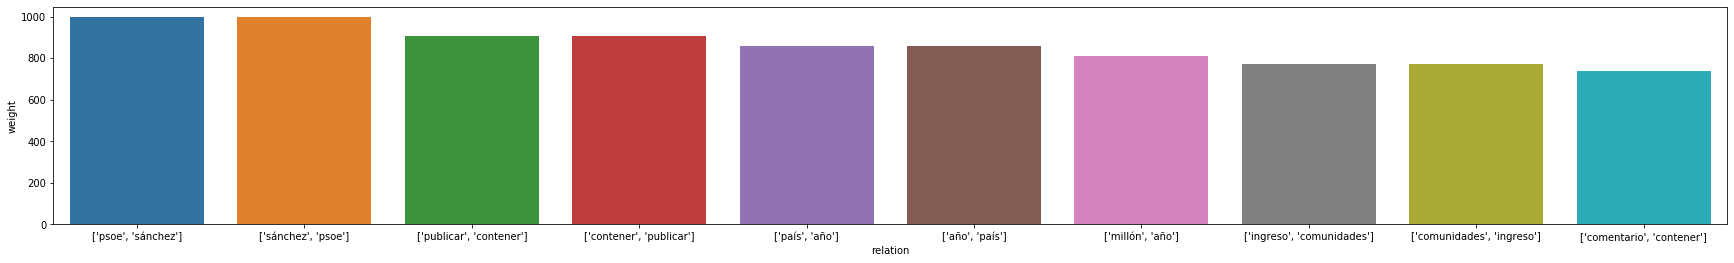

In [0]:
fig_dims = (30, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x = "relation", y = "weight", ax=ax, data=df_top_values_co)

#####**Visualiacion de datos en 3D**

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

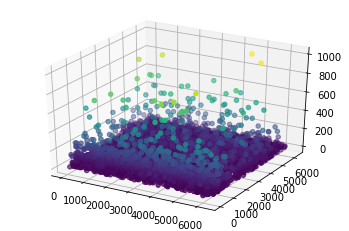

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_coun_vectorize_co_relation.Number_word, df_coun_vectorize_co_relation.number_best_relation, df_coun_vectorize_co_relation.weight, c=df_coun_vectorize_co_relation.weight, marker='o')

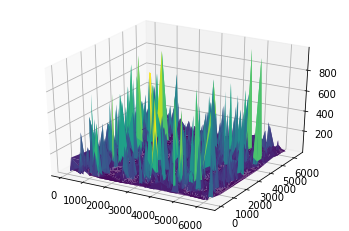

In [0]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df_coun_vectorize_co_relation.number_best_relation, df_coun_vectorize_co_relation.Number_word, df_coun_vectorize_co_relation.weight, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()



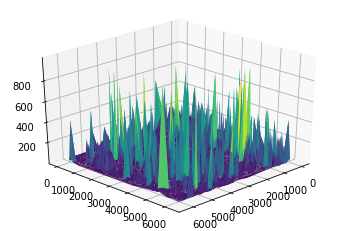

In [0]:
# Rotate it
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df_coun_vectorize_co_relation.number_best_relation, df_coun_vectorize_co_relation.Number_word, df_coun_vectorize_co_relation.weight, cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30, 45)
plt.show()

####**Variaciones de la matriz de concurrencia**

Digamos que hay V palabras únicas en el corpus. Tamaño del vocabulario = V. Las columnas de la matriz de Co-ocurrencia forman la palabra de contexto s. Las diferentes variaciones de la Matriz de Co-ocurrencia son:

1. Una matriz de coincidencia de tamaño VX V. Ahora, incluso para un corpus decente V se vuelve muy grande y difícil de manejar. En general, esta arquitectura nunca se prefiere en la práctica.
2. Una matriz de co-ocurrencia de tamaño VXN donde N es un subconjunto de V y se puede obtener eliminando palabras irrelevantes como palabras vacías, etc., por ejemplo. Esto todavía es muy grande y presenta dificultades computacionales.

Pero recuerde que esta matriz de coincidencia no es la representación vectorial de palabras que generalmente se usa. En cambio, esta matriz de Co-ocurrencia se descompone usando técnicas como PCA, SVD, etc. en factores y la combinación de estos factores forma la representación vectorial de palabras.

Permítanme ilustrar esto más claramente. Por ejemplo, realiza PCA en la matriz anterior de tamaño VXV. Obtendrá V componentes principales. Puede elegir k componentes de estos componentes V. Entonces, la nueva matriz tendrá la forma VX k.

Y, una sola palabra, en lugar de ser representada en dimensiones V, será representada en k dimensiones mientras aún captura casi el mismo significado semántico. k es generalmente del orden de cientos.

Entonces, lo que PCA hace en la parte posterior es descomponer la matriz de Co-ocurrencia en tres matrices, U, S y V, donde U y V son ambas matrices ortogonales. Lo importante es que el producto de puntos de U y S le da a la palabra representación de vector y V le da a la palabra representación de contexto.

![texto alternativo](https://i.imgur.com/4r5PJXf.png)

**Ventajas de la matriz de concurrencia**

1. Conserva la relación semántica entre palabras. es decir, el hombre y la mujer tienden a estar más cerca que el hombre y la manzana.
2. Utiliza SVD en su núcleo, que produce representaciones de vectores de palabras más precisas que los métodos existentes.
3. Utiliza la factorización, que es un problema bien definido y puede resolverse de manera eficiente.
4. Tiene que calcularse una vez y puede usarse en cualquier momento una vez calculada. En este sentido, es más rápido en comparación con otros.

**Desventajas de la matriz de coincidencia**

1. Se requiere una gran memoria para almacenar la matriz de coincidencia.
Sin embargo, este problema puede evitarse factorizando la matriz fuera del sistema, por ejemplo, en clústeres de Hadoop, etc., y puede guardarse.

#####Visualizacion SOM Vectores

In [0]:
!pip install somoclu
import somoclu

In [0]:
n_columns=7
n_rows=7
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(bag_of_wors.todense())

CPU times: user 8.61 s, sys: 31 ms, total: 8.64 s
Wall time: 8.72 s


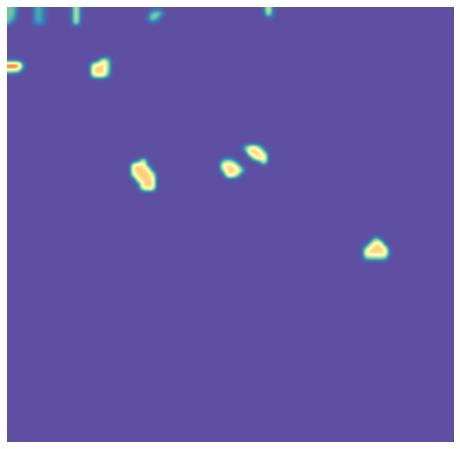

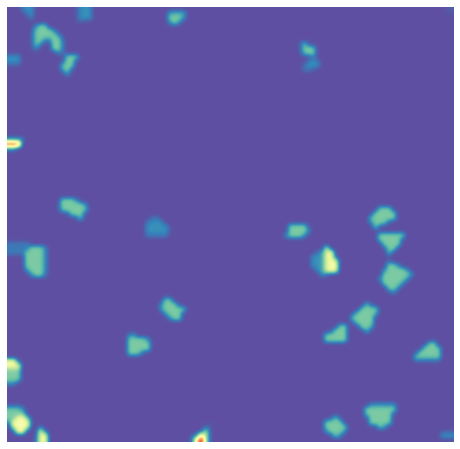

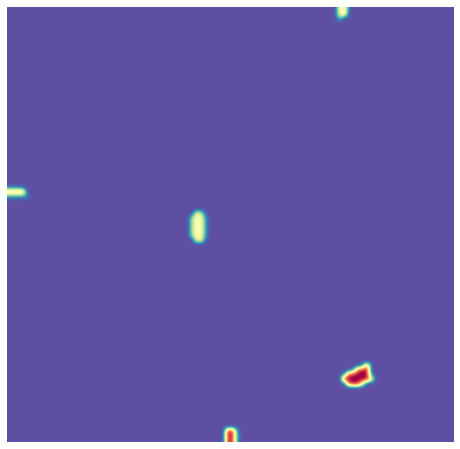

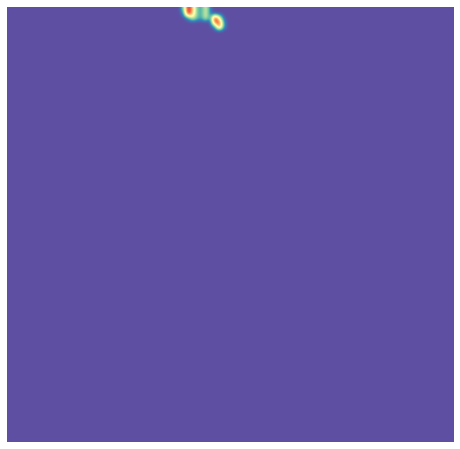

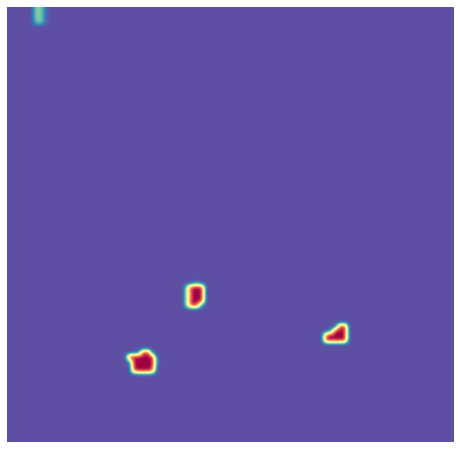

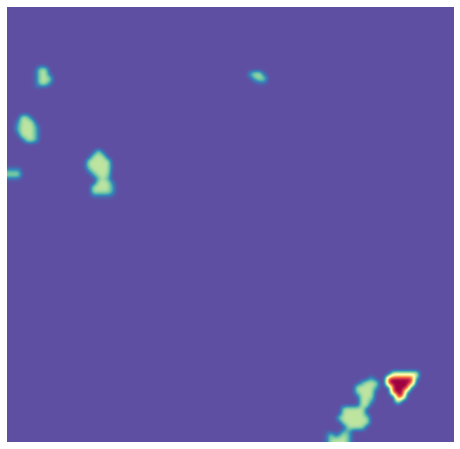

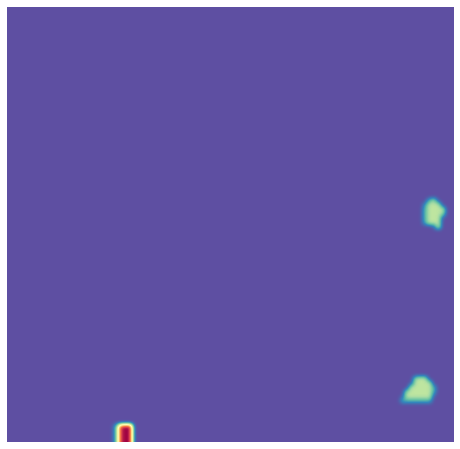

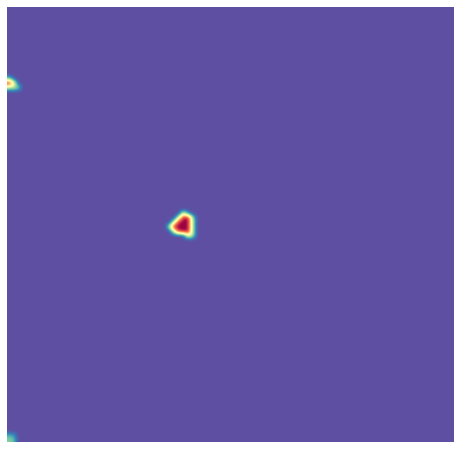

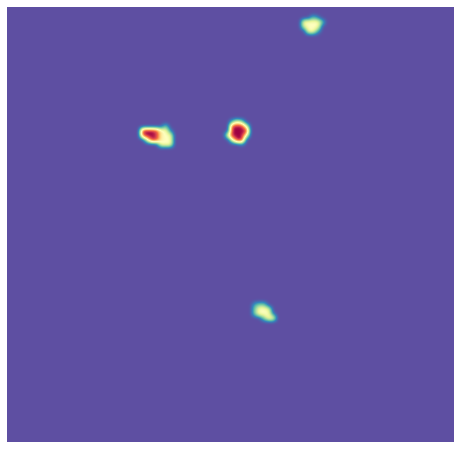

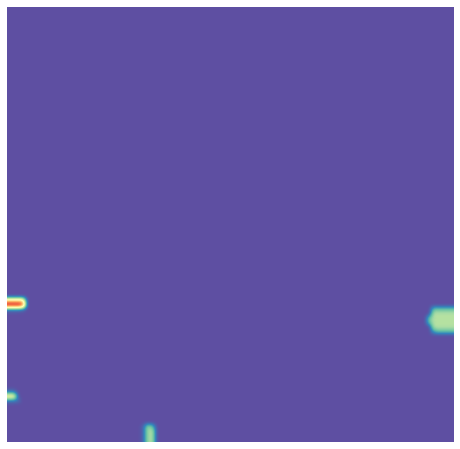

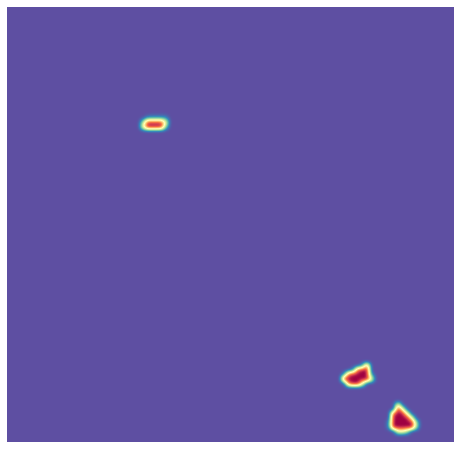

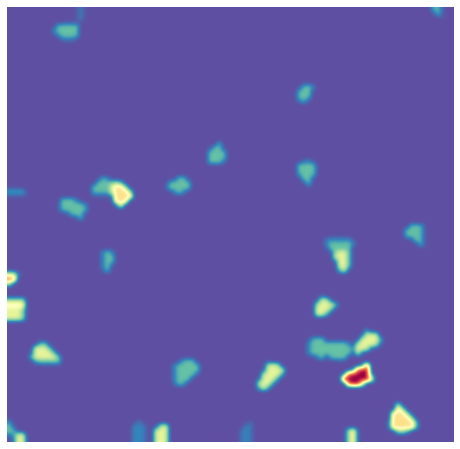

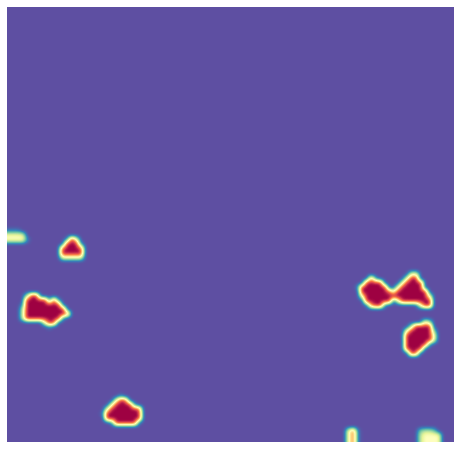

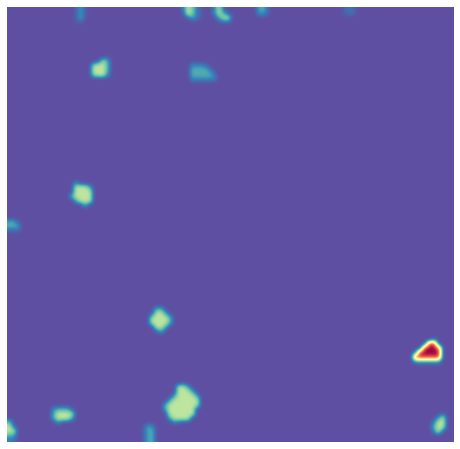

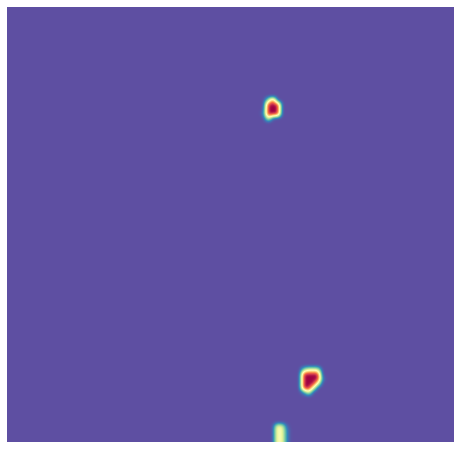

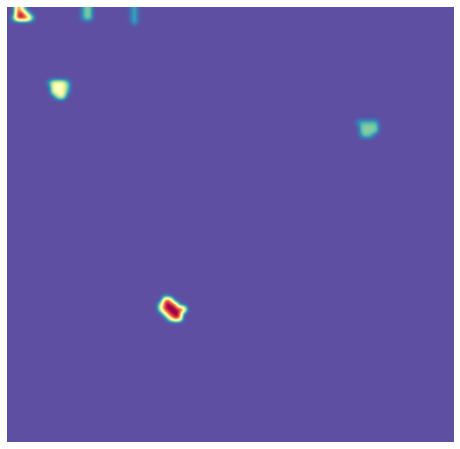

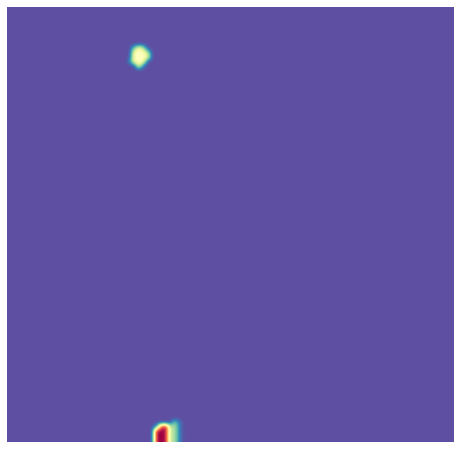

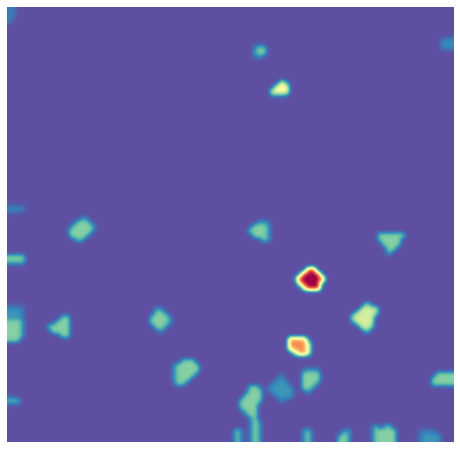

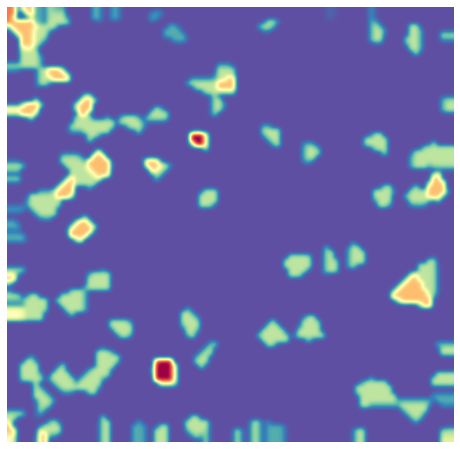

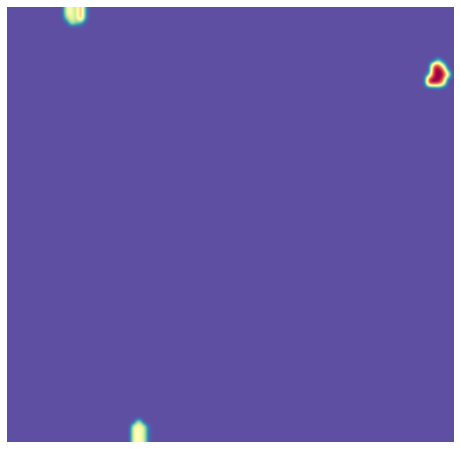

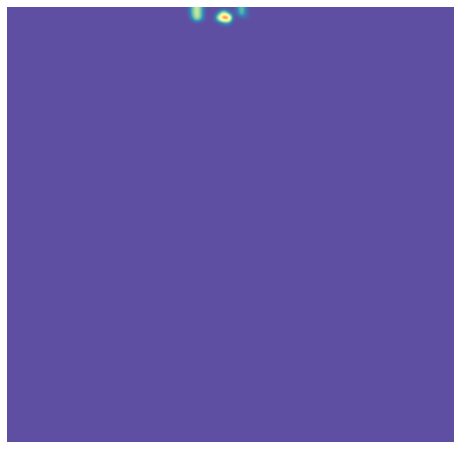

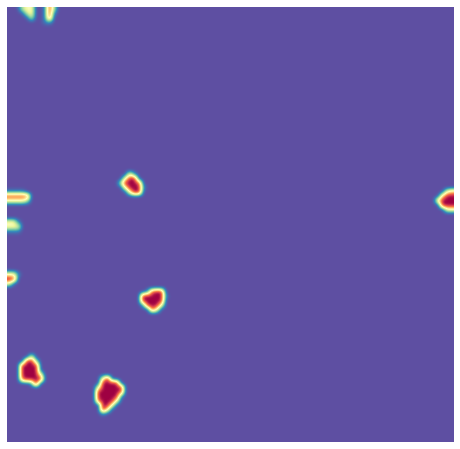

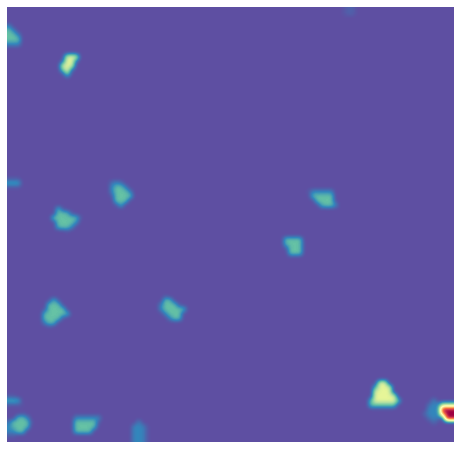

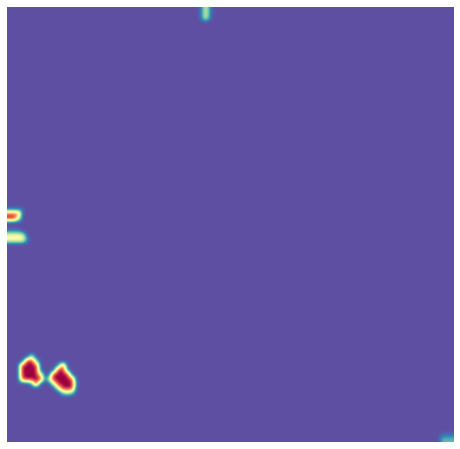

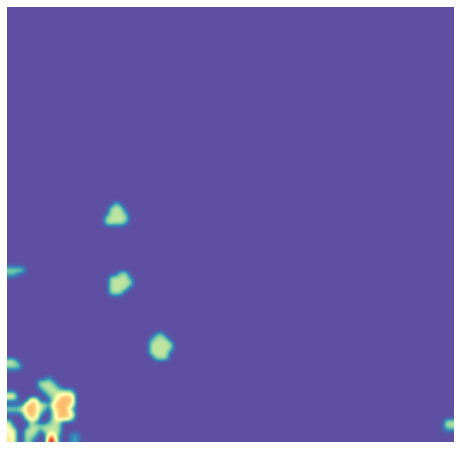

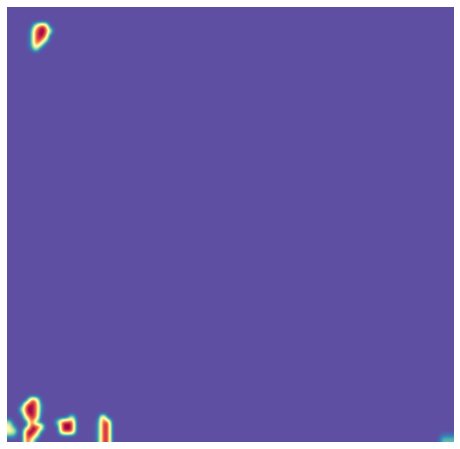

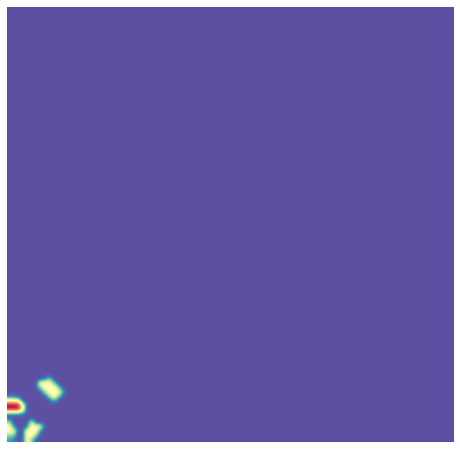

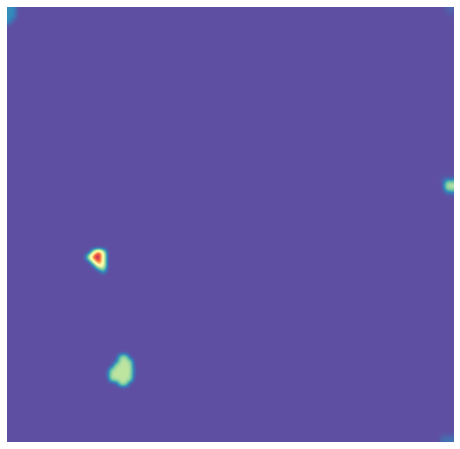

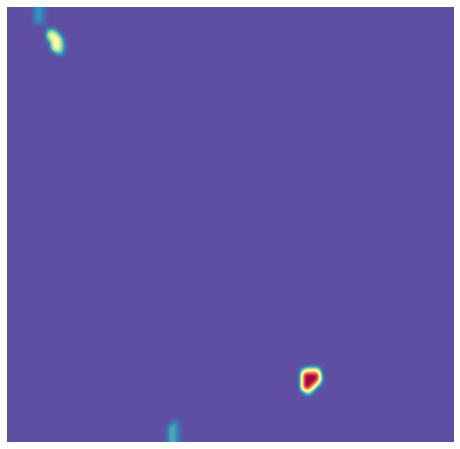

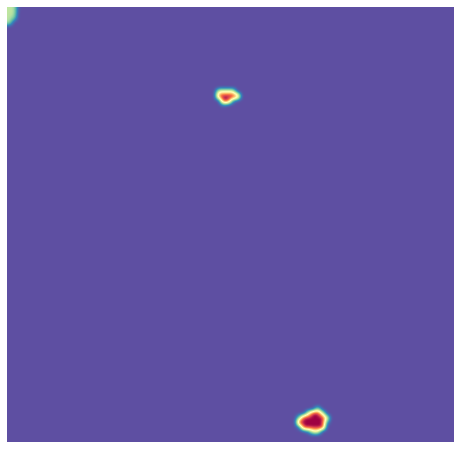

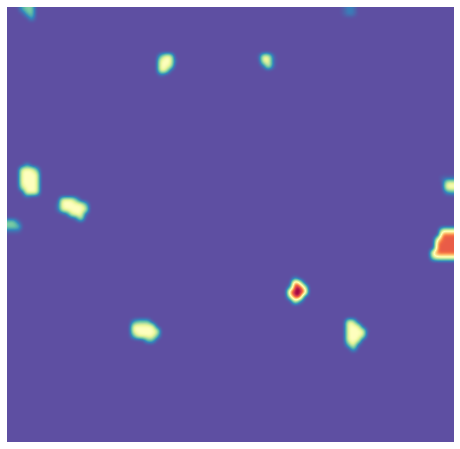

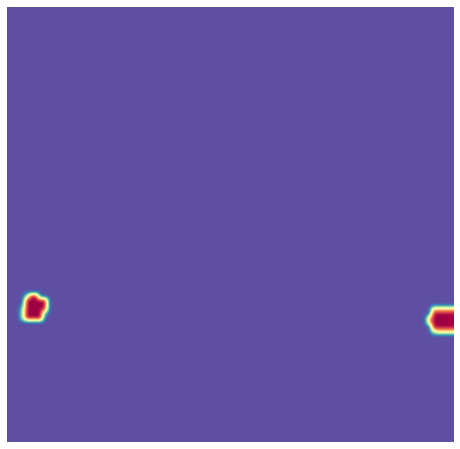

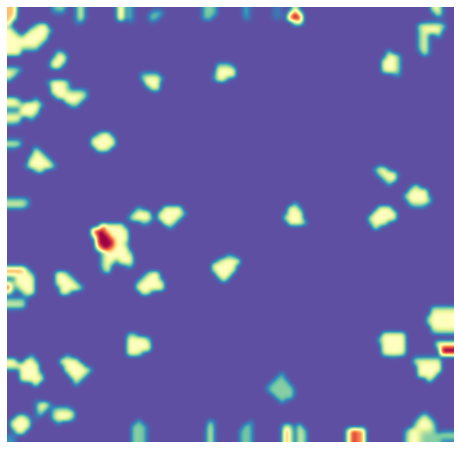

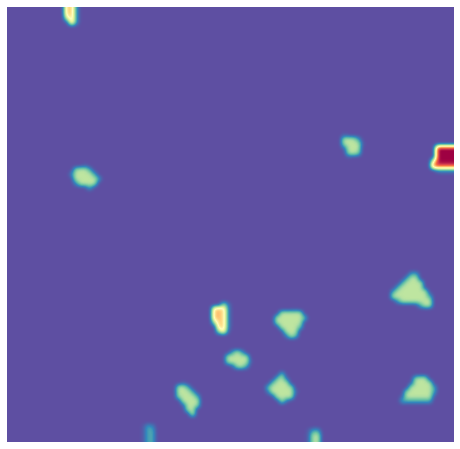

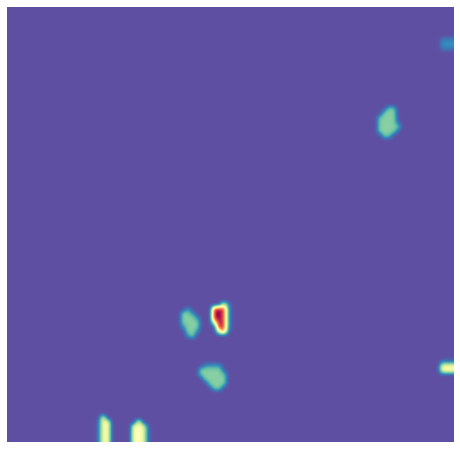

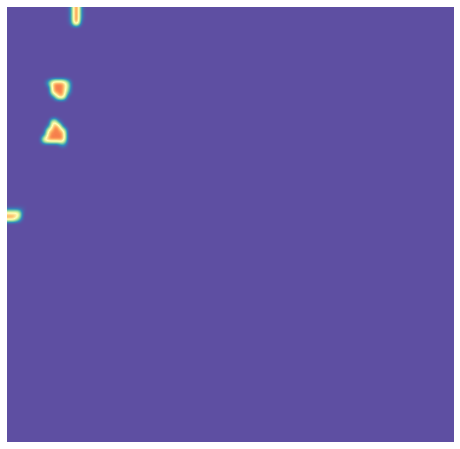

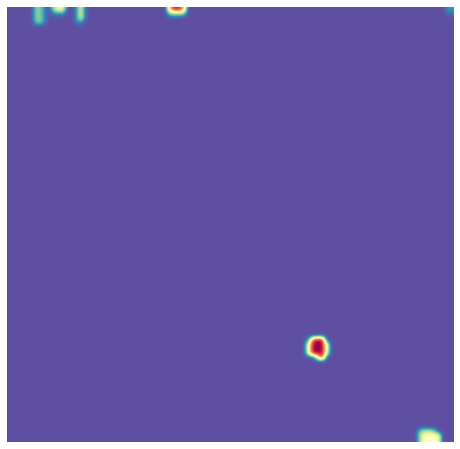

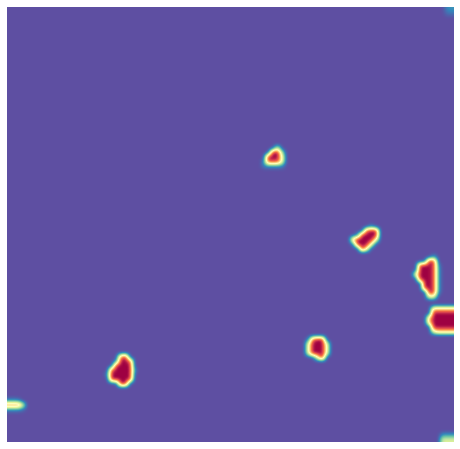

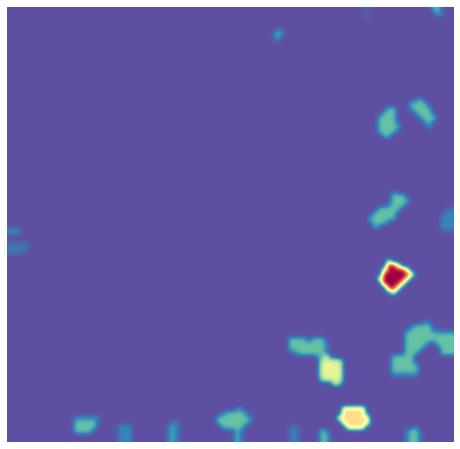

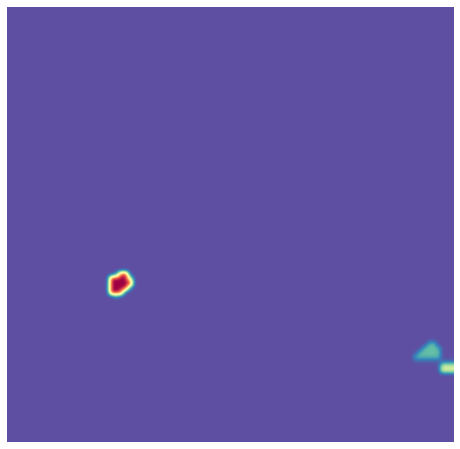

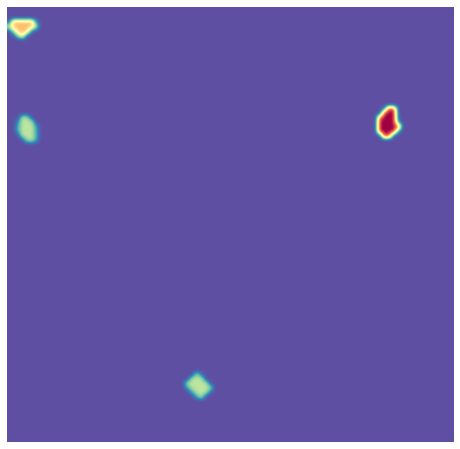

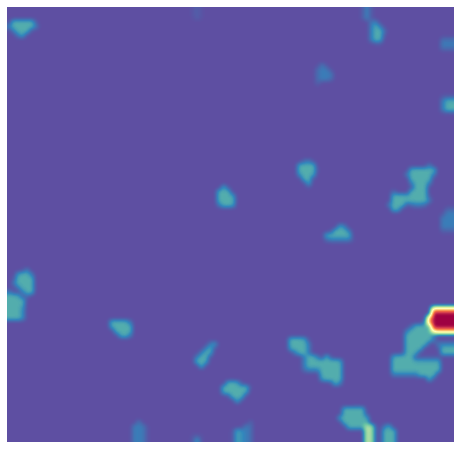

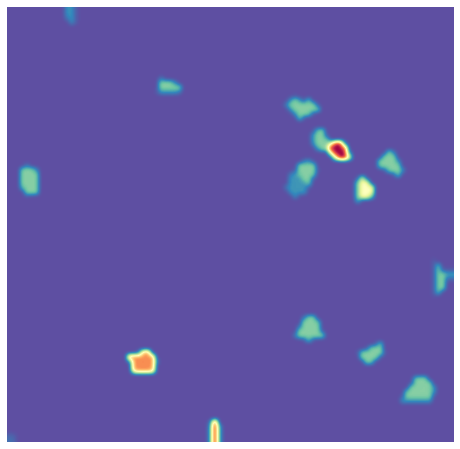

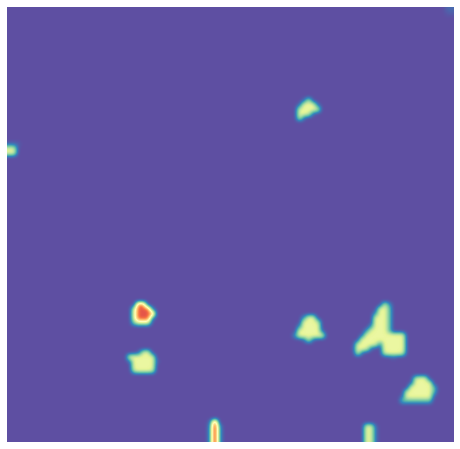

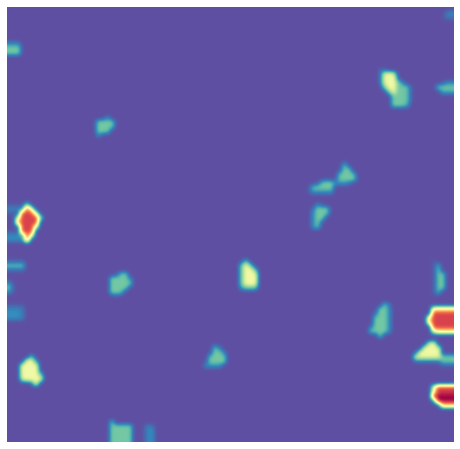

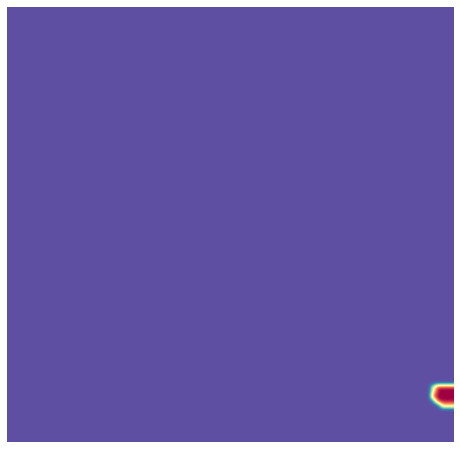

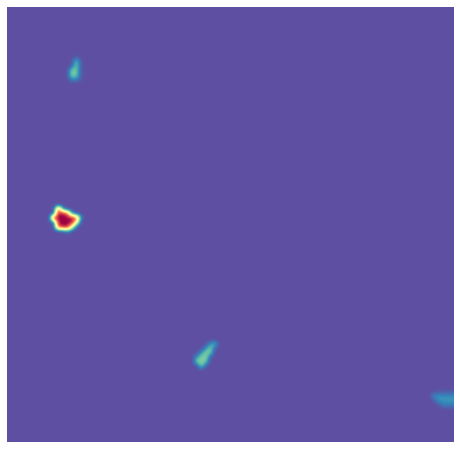

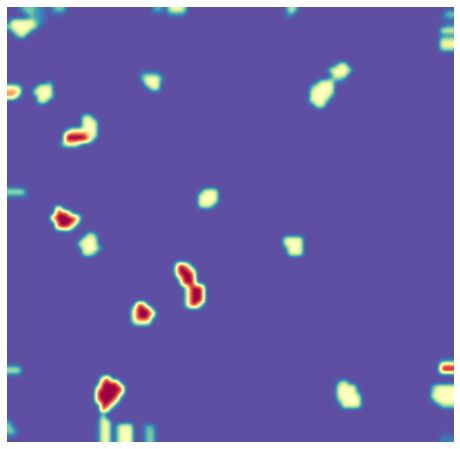

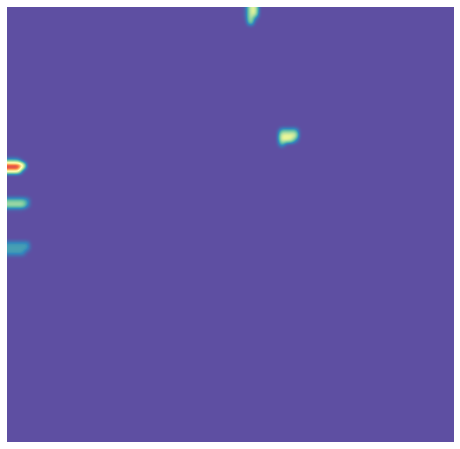

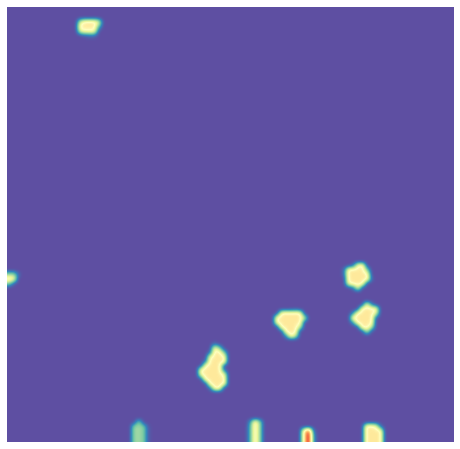

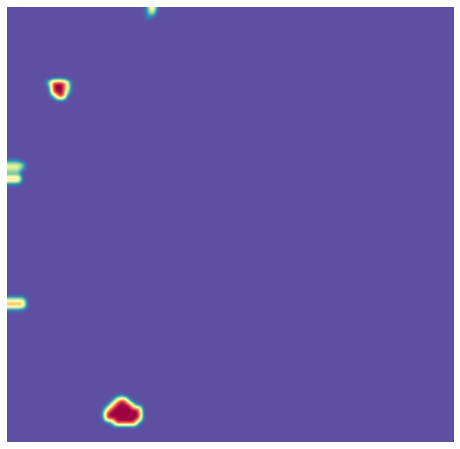

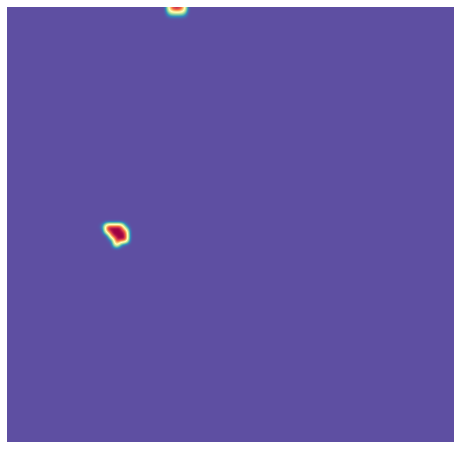

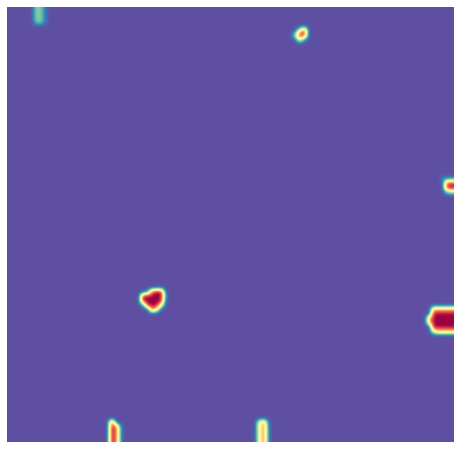

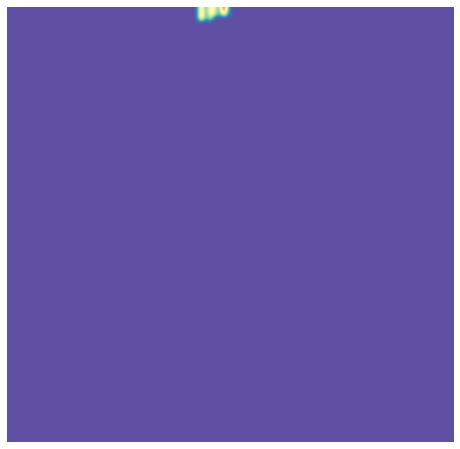

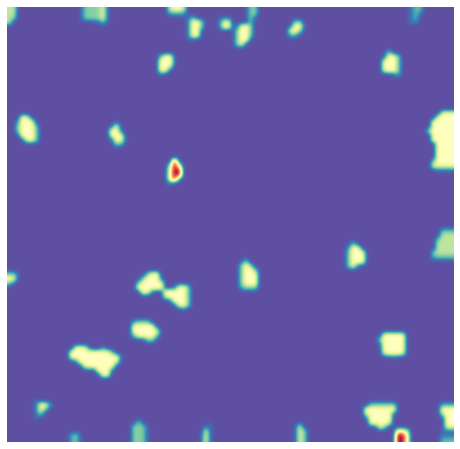

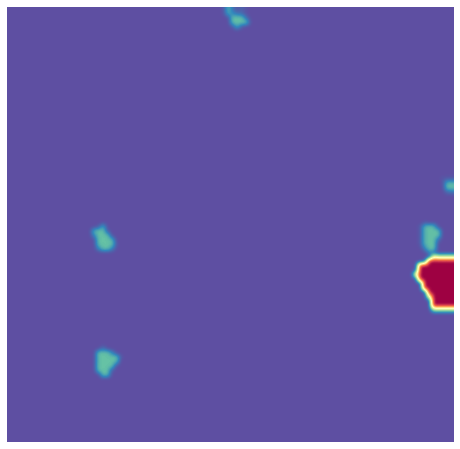

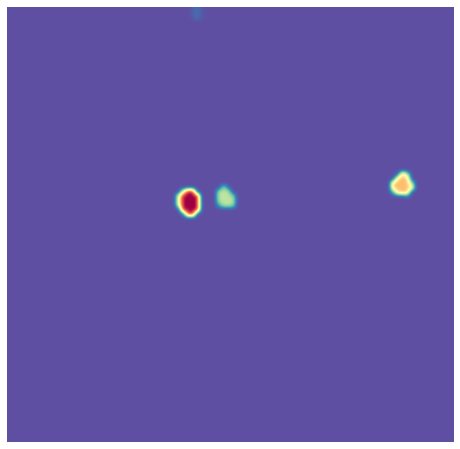

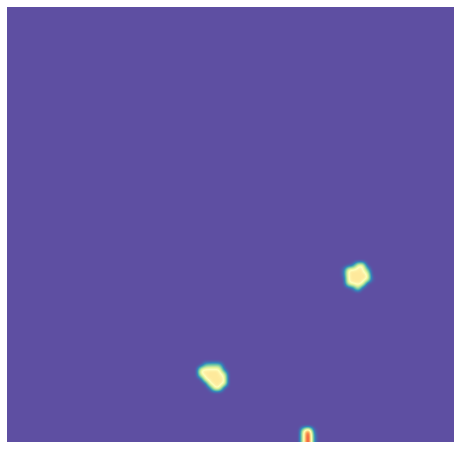

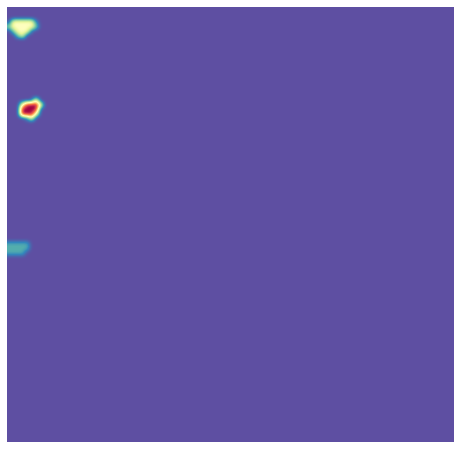

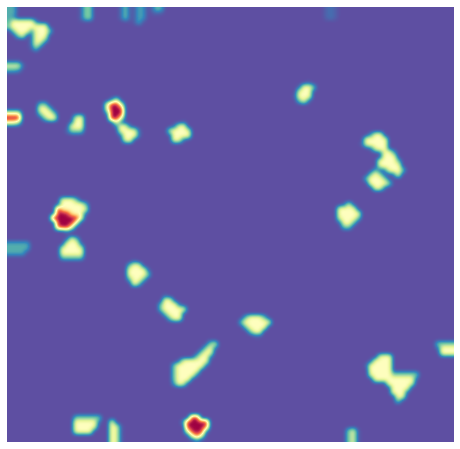

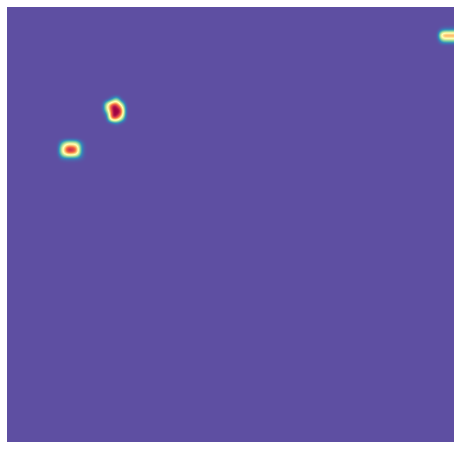

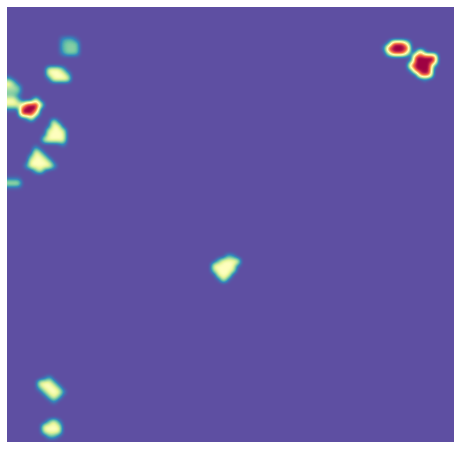

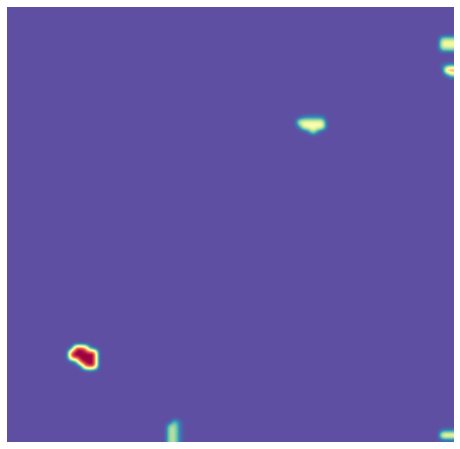

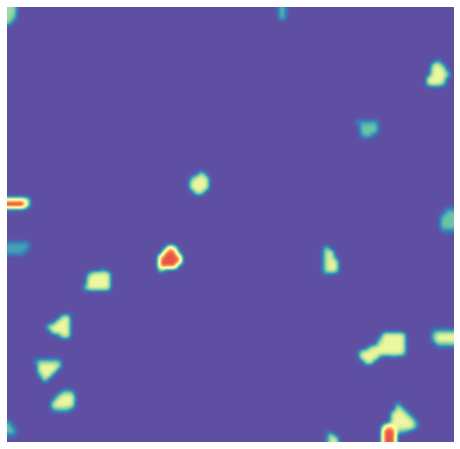

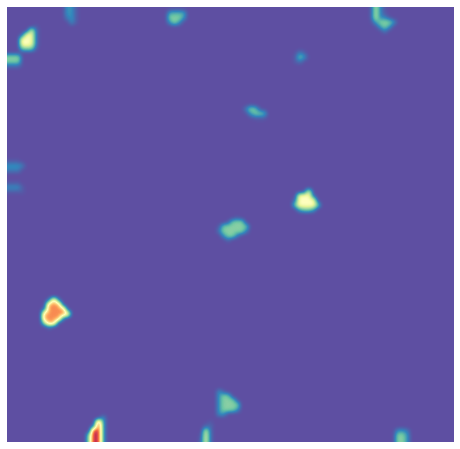

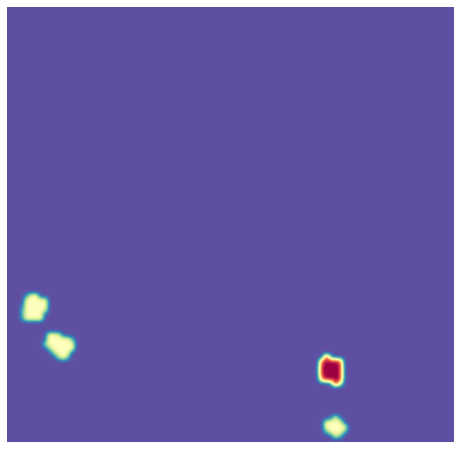

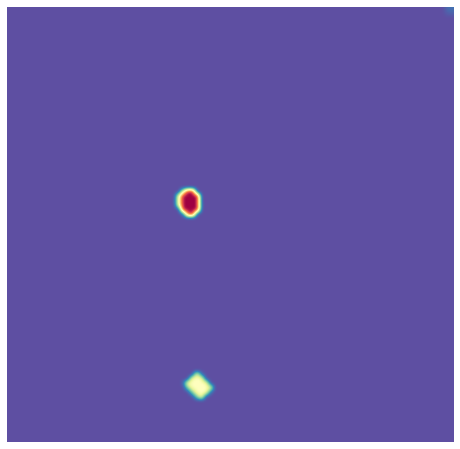

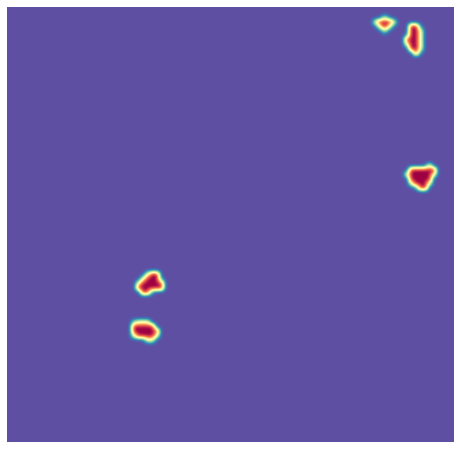

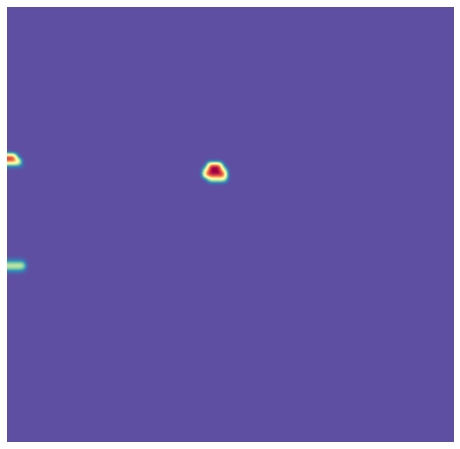

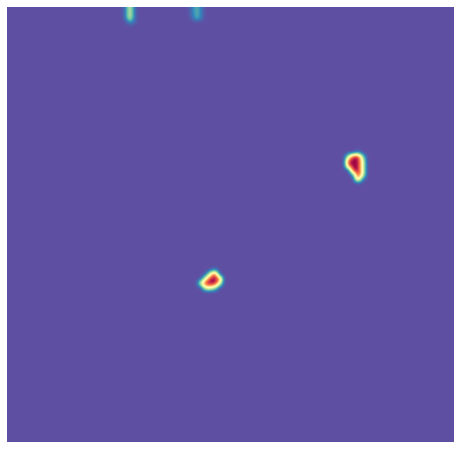

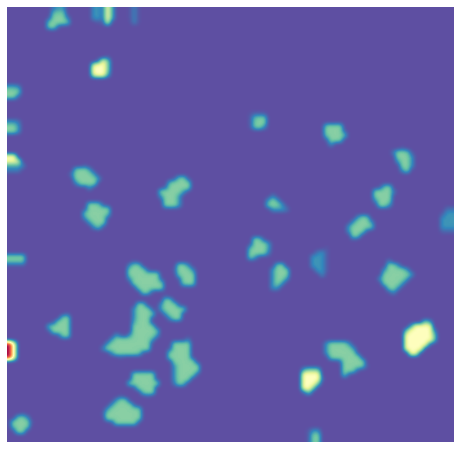

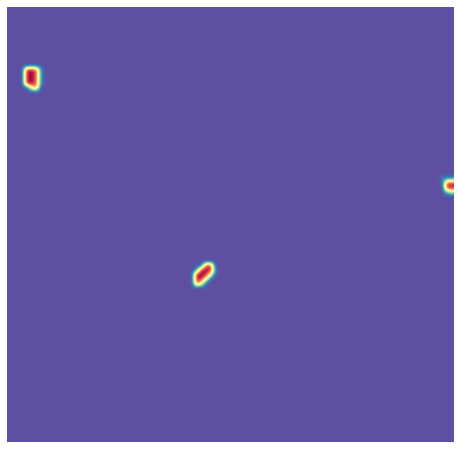

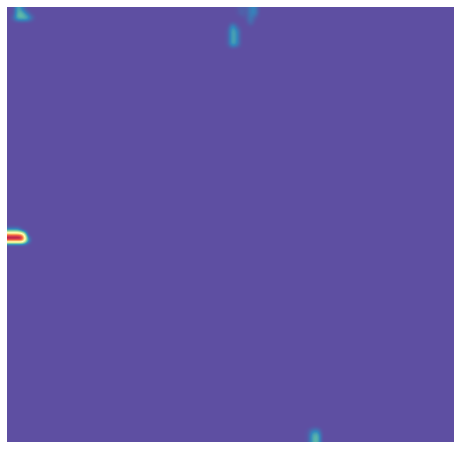

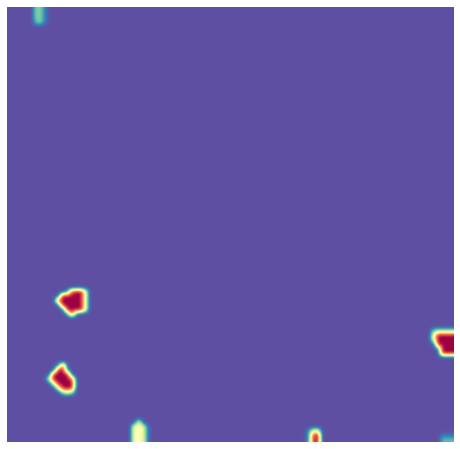

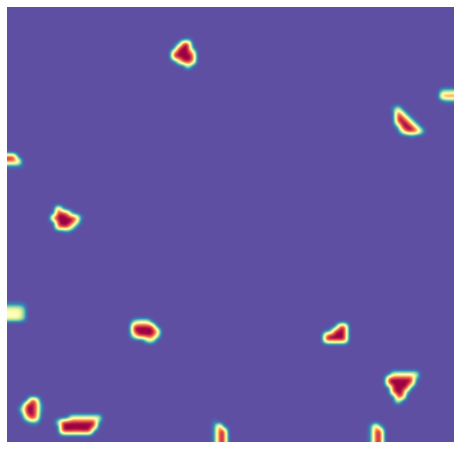

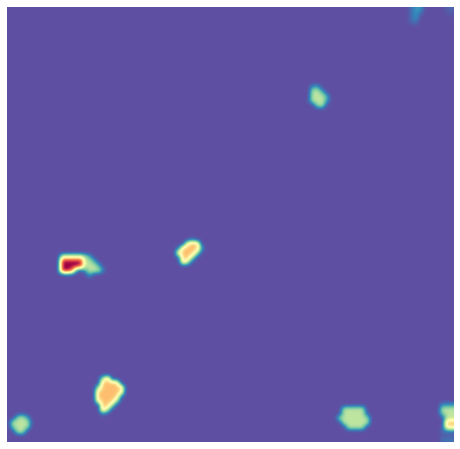

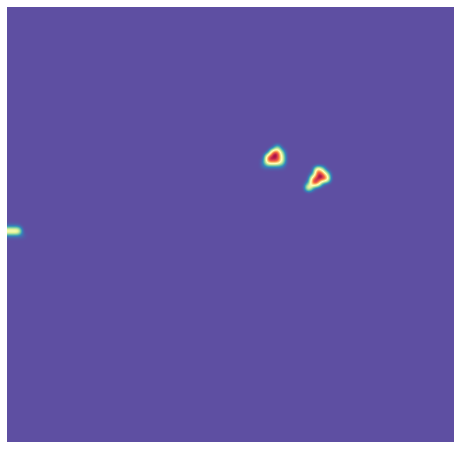

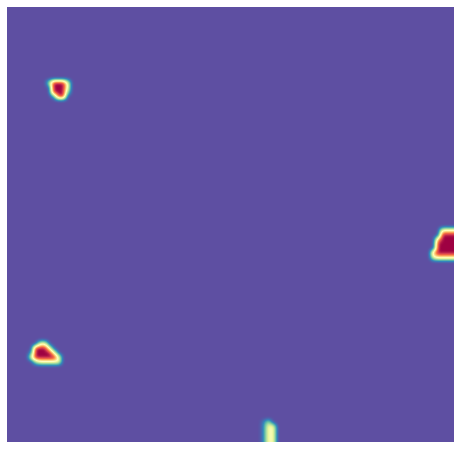

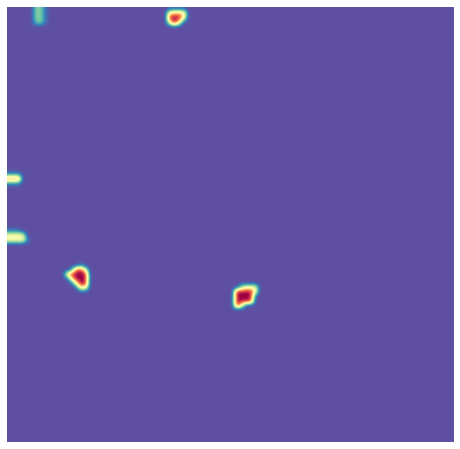

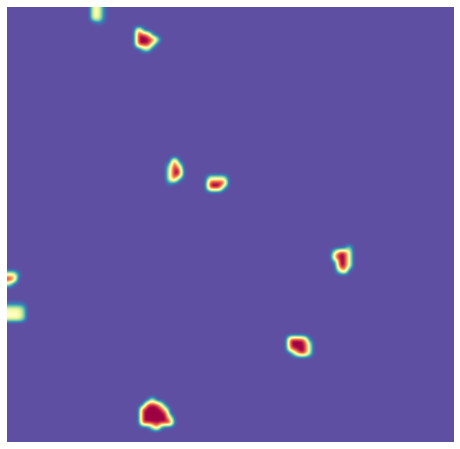

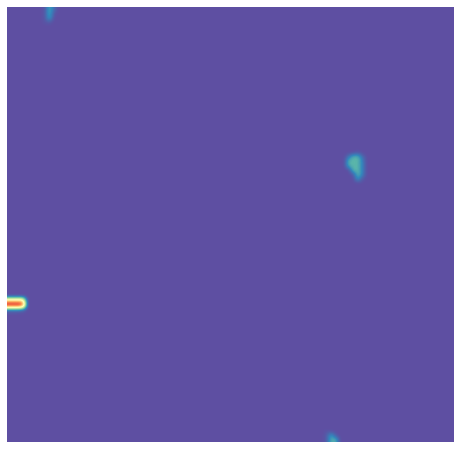

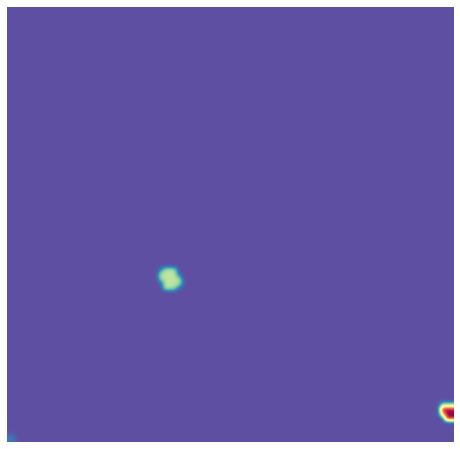

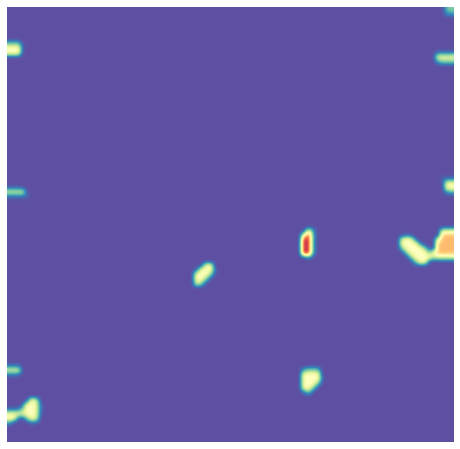

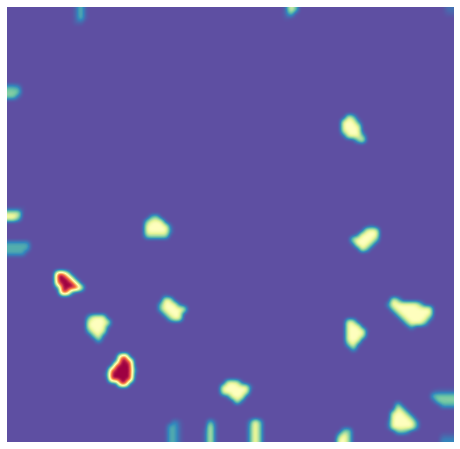

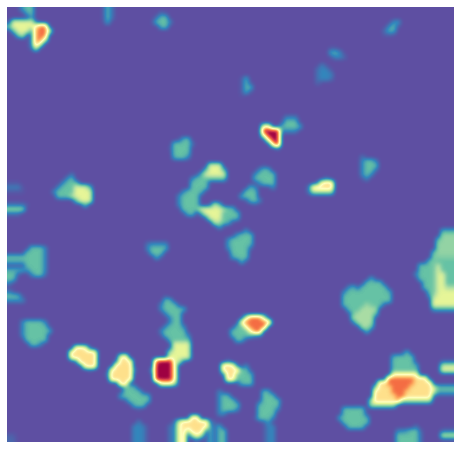

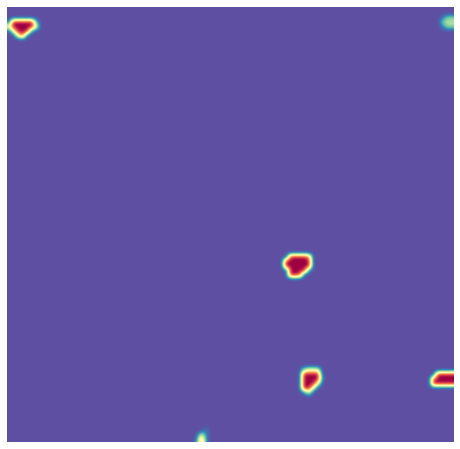

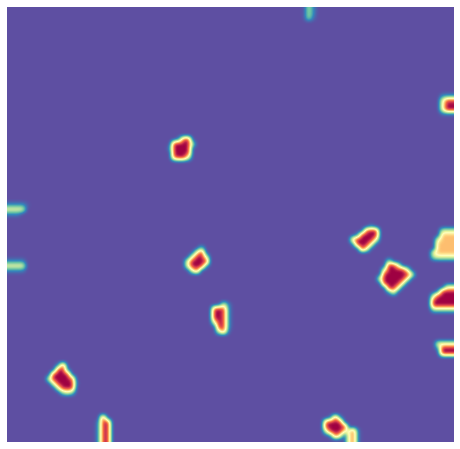

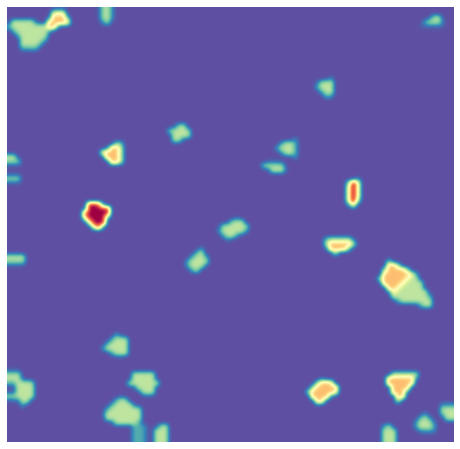

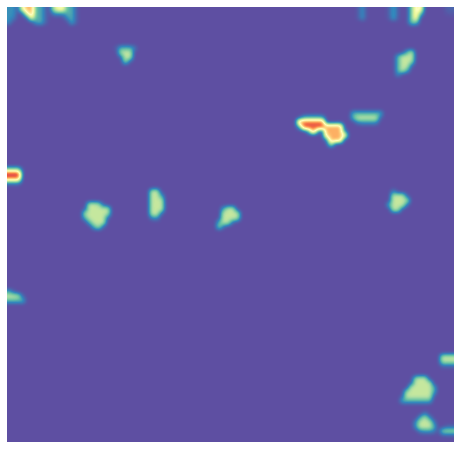

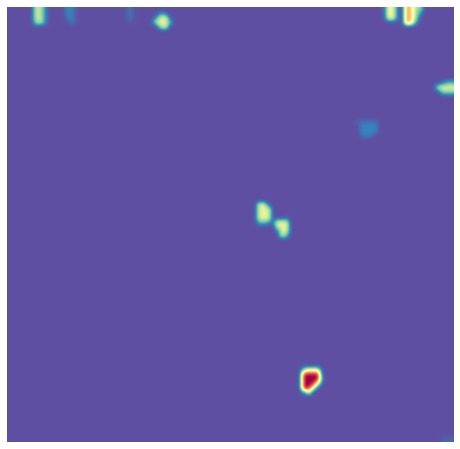

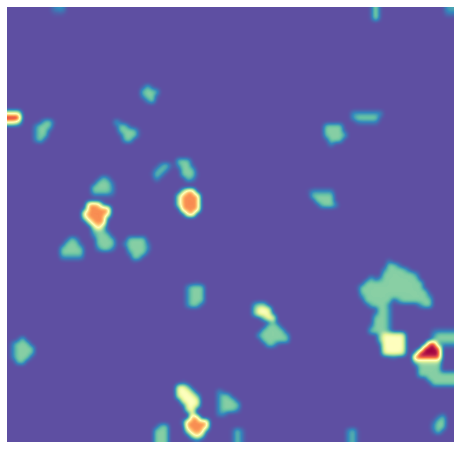

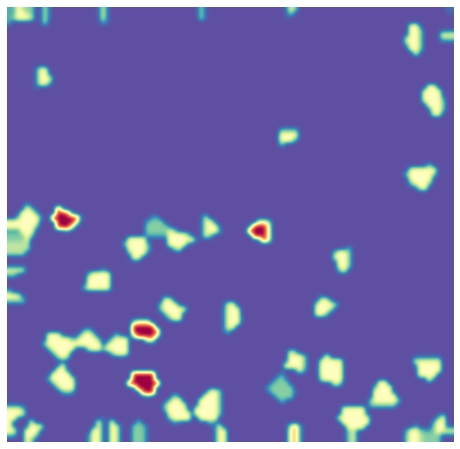

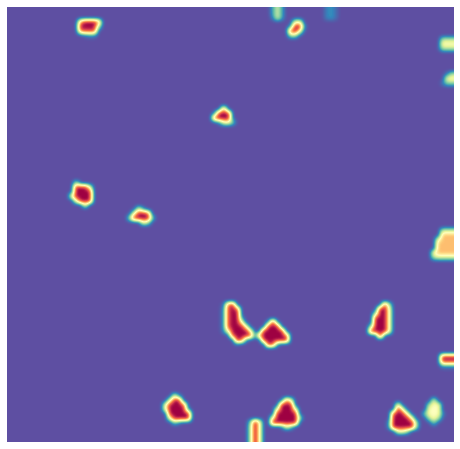

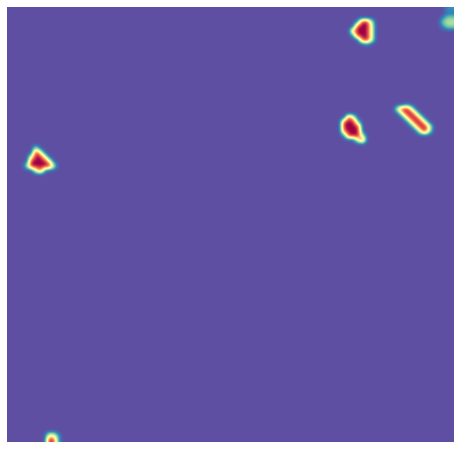

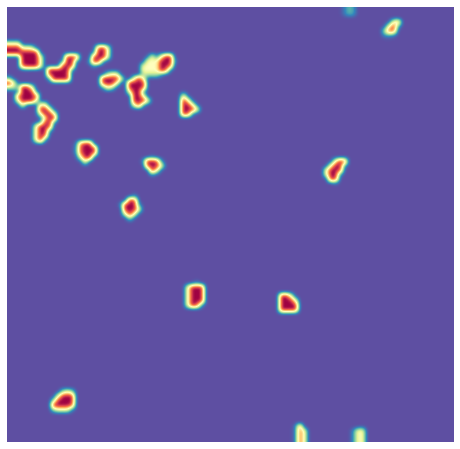

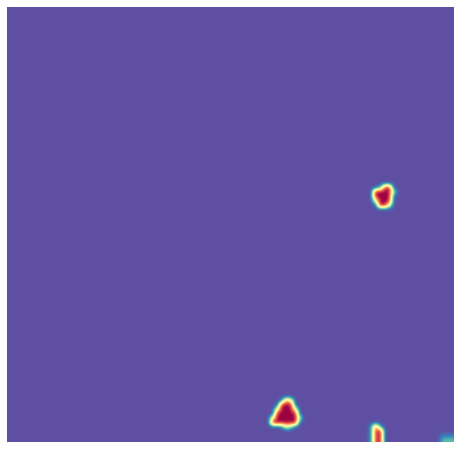

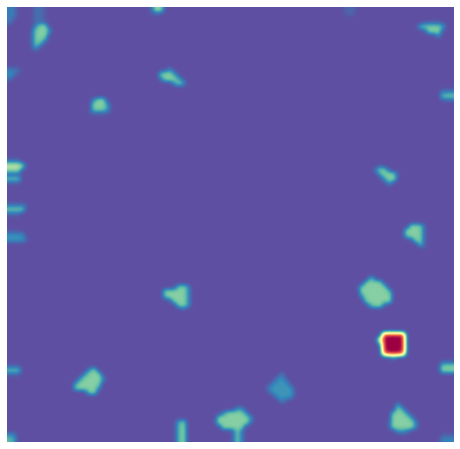

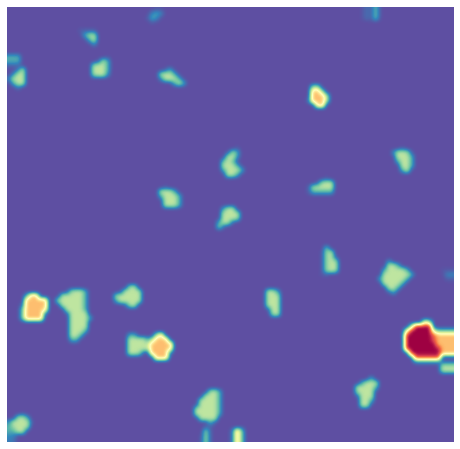

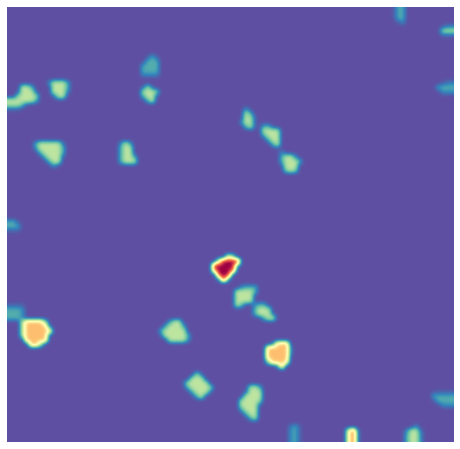

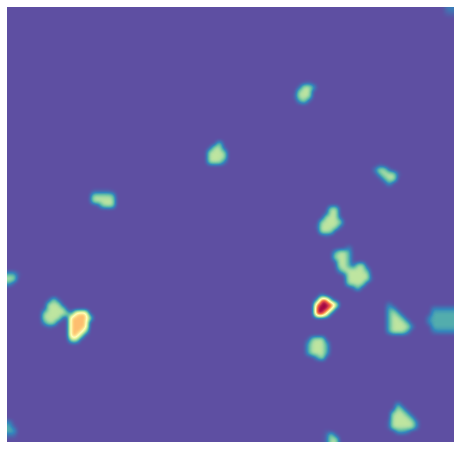

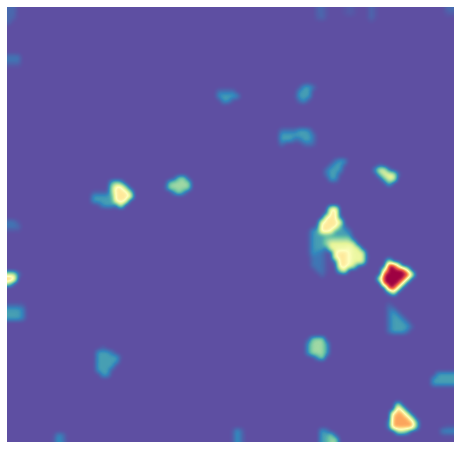

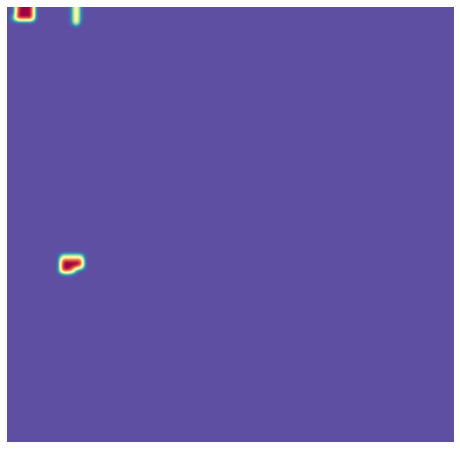

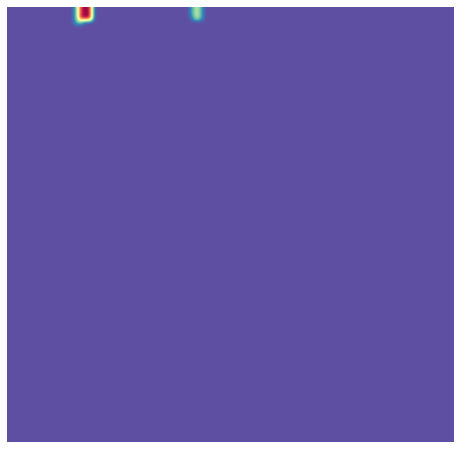

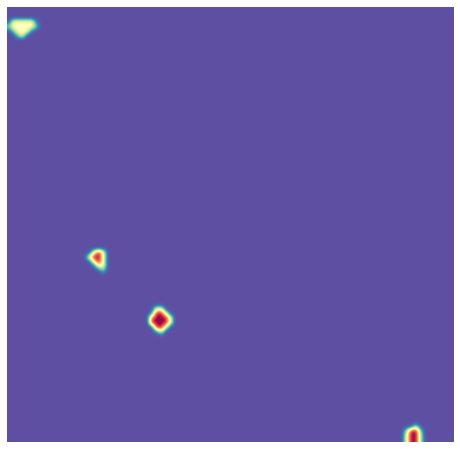

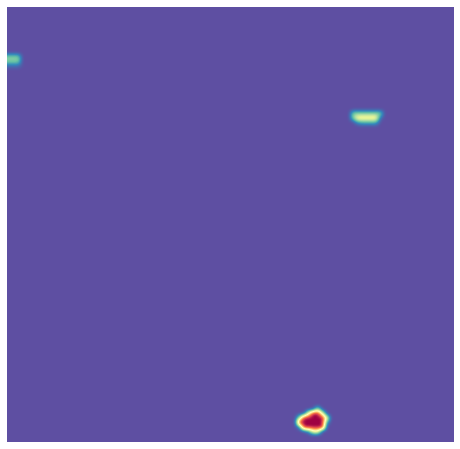

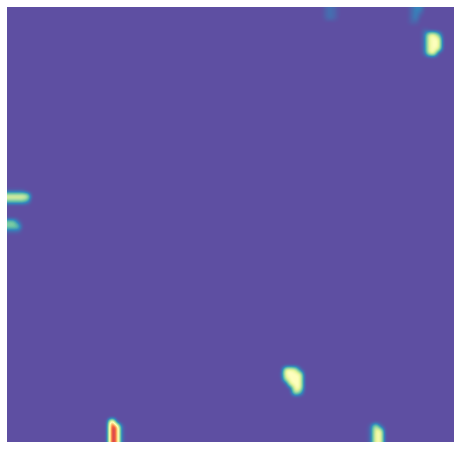

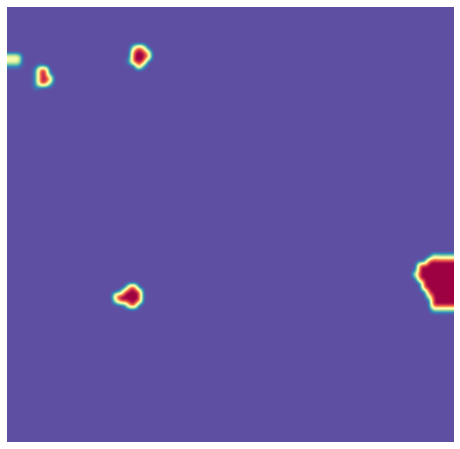

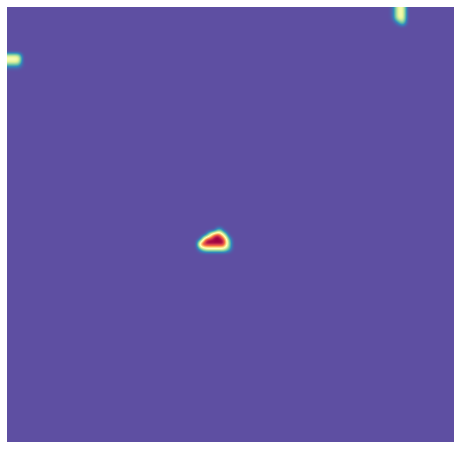

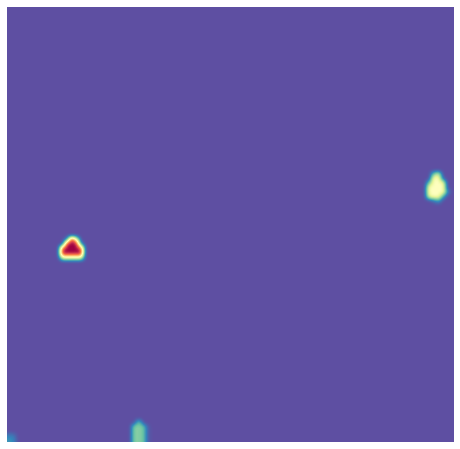

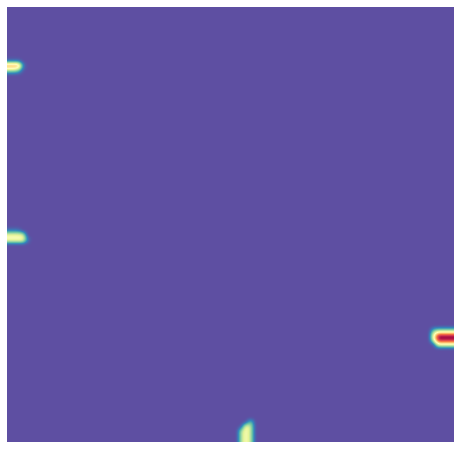

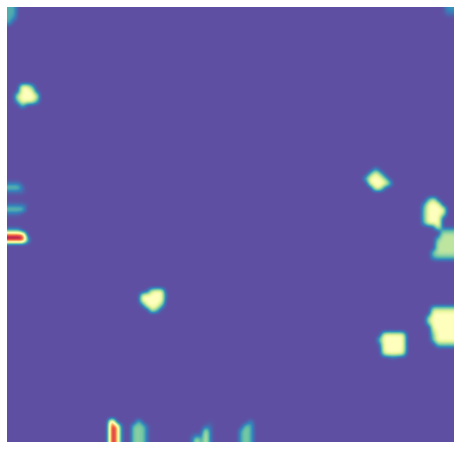

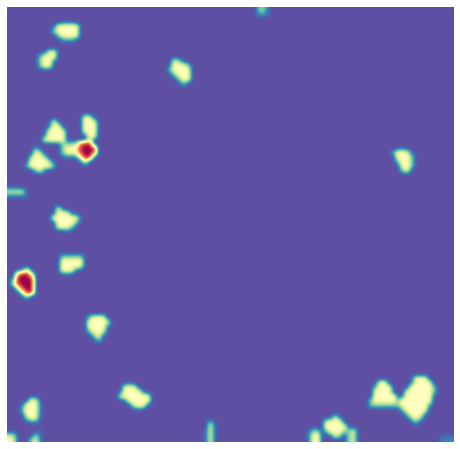

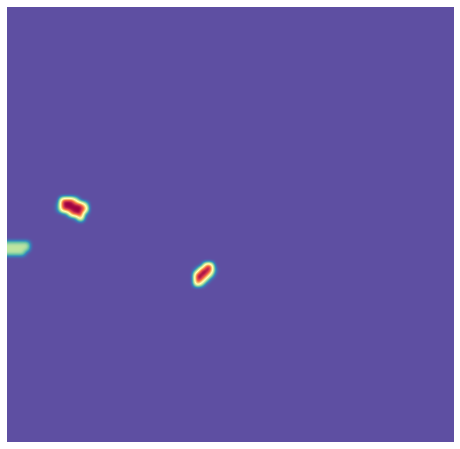

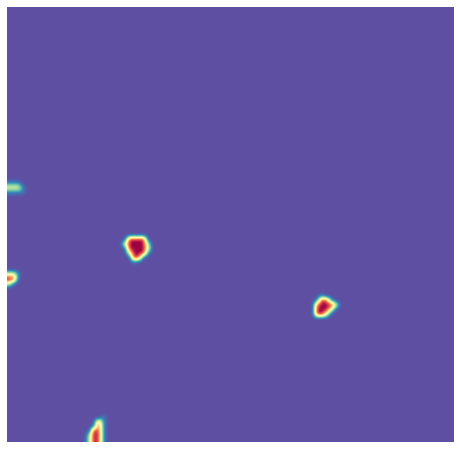

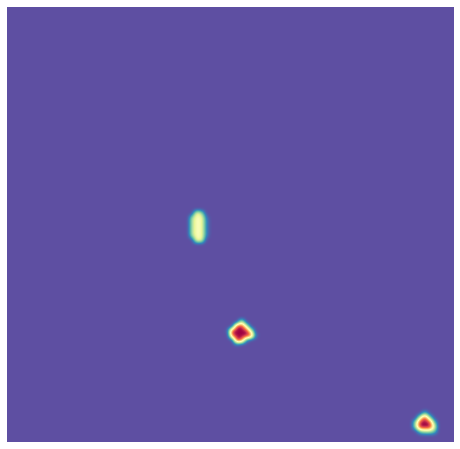

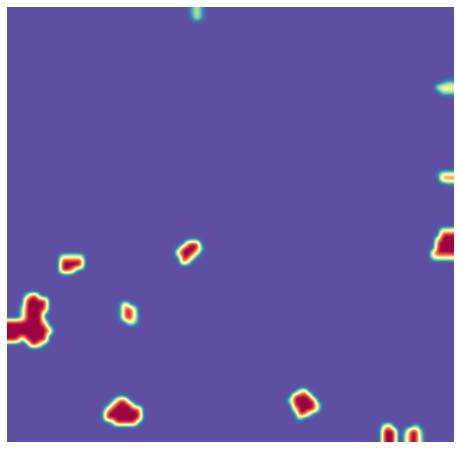

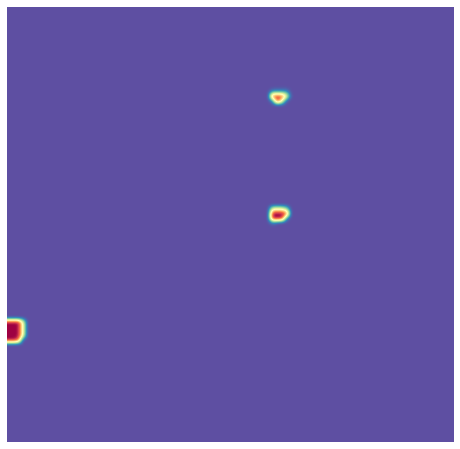

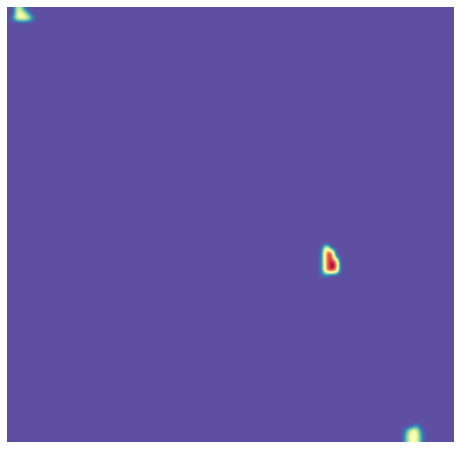

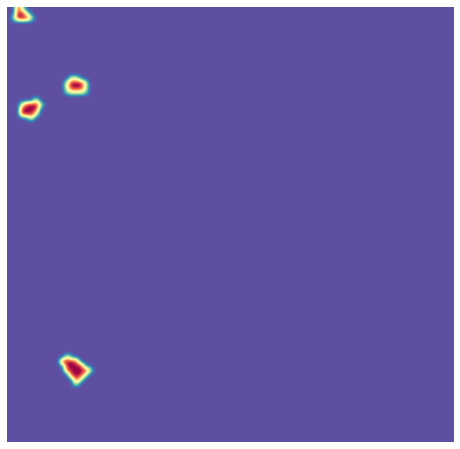

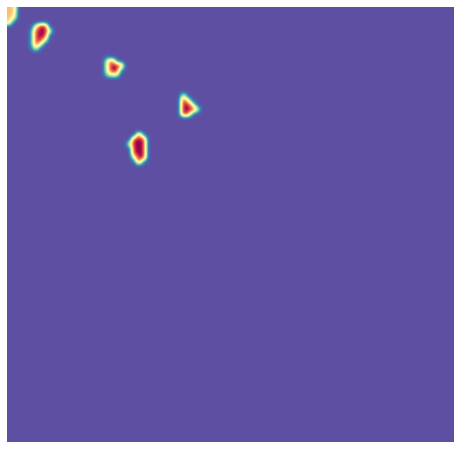

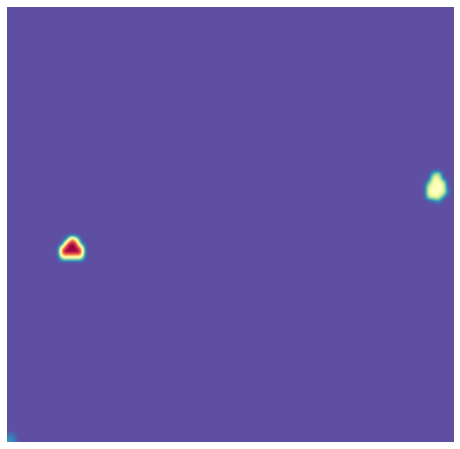

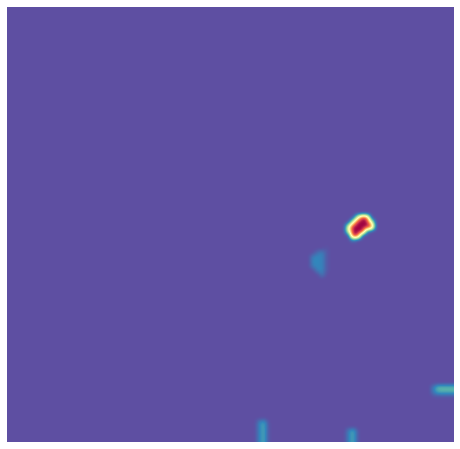

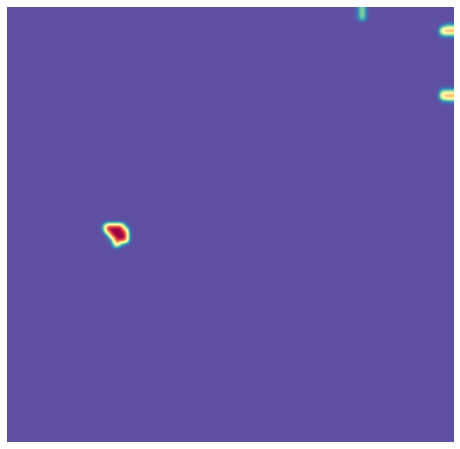

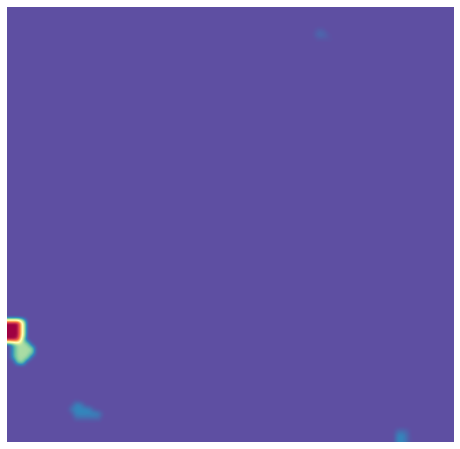

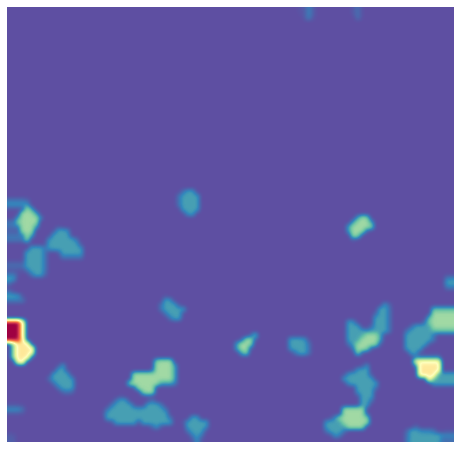

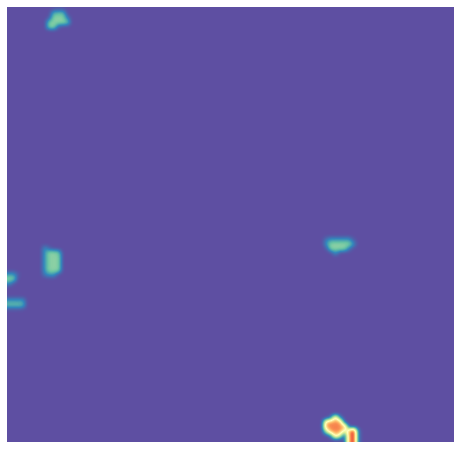

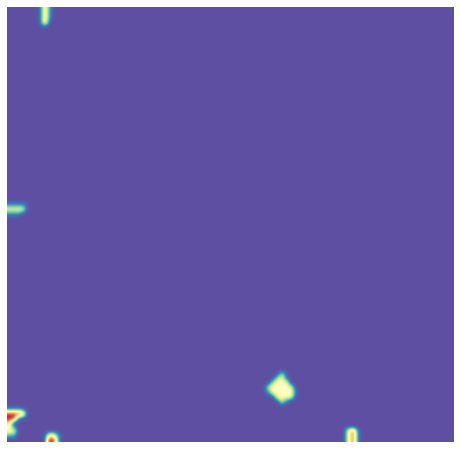

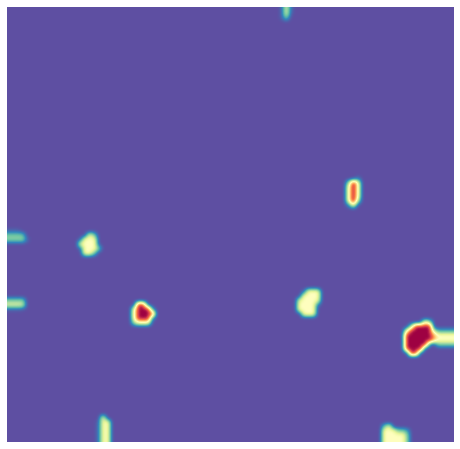

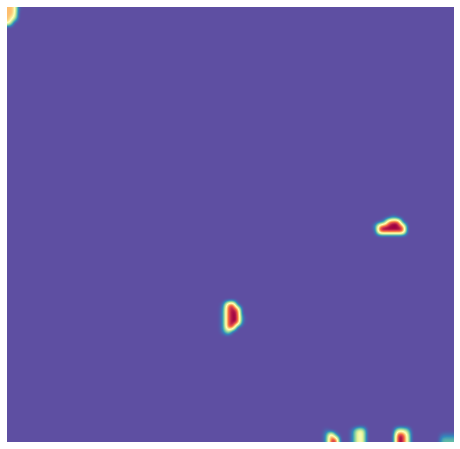

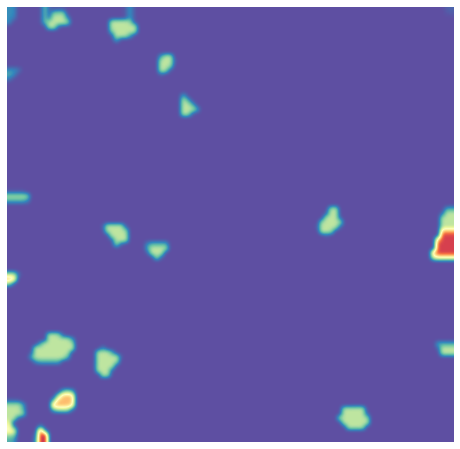

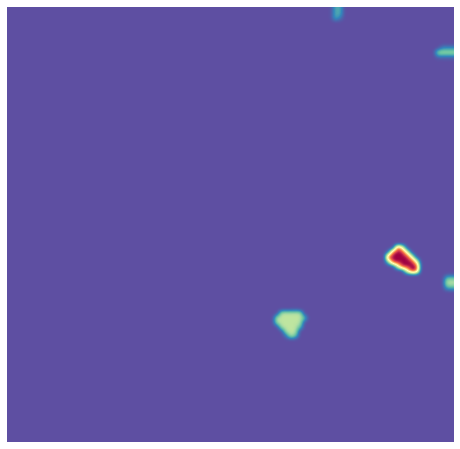

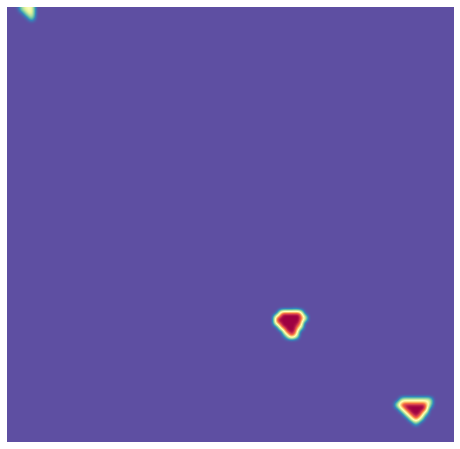

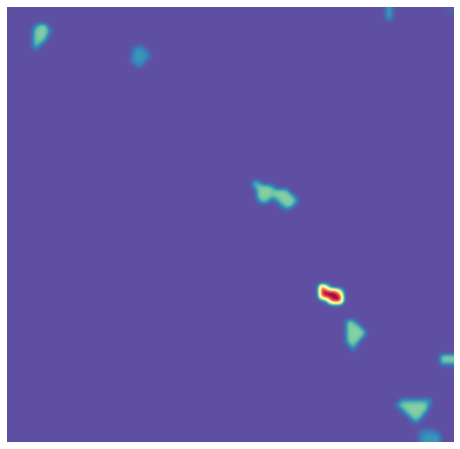

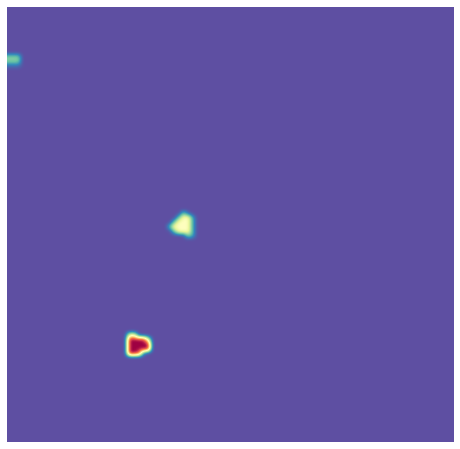

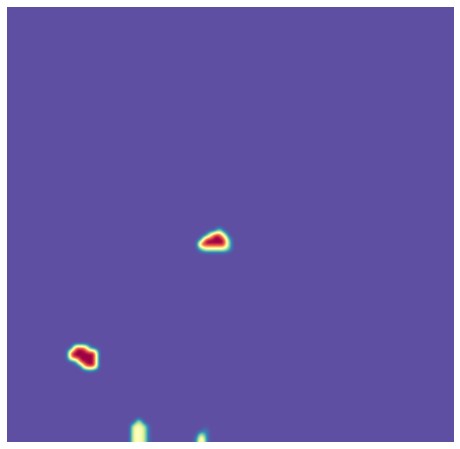

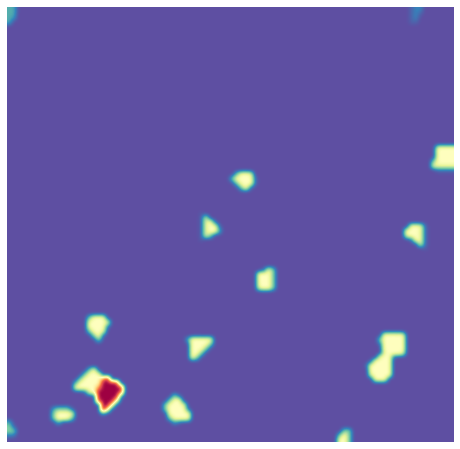

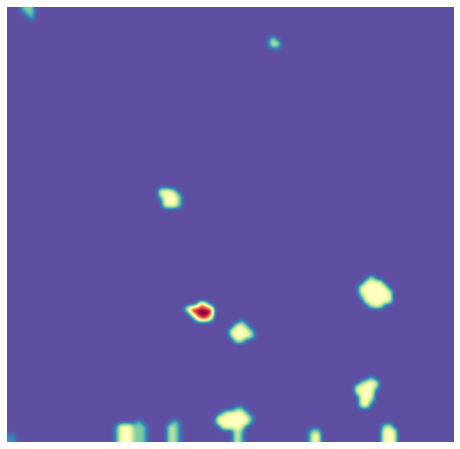

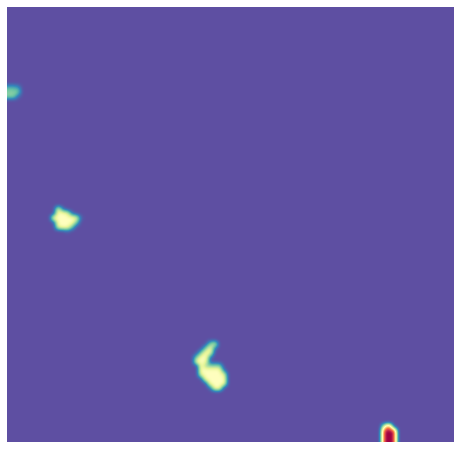

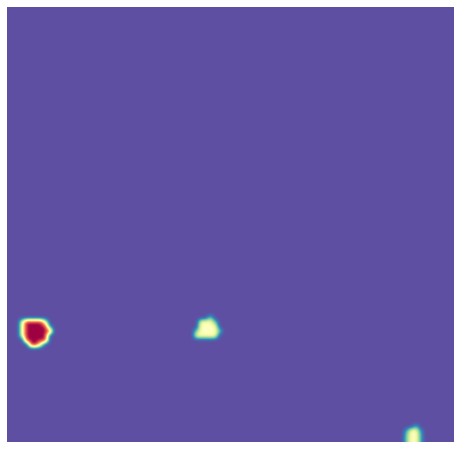

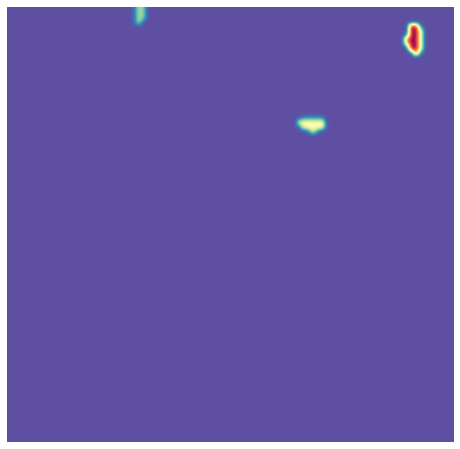

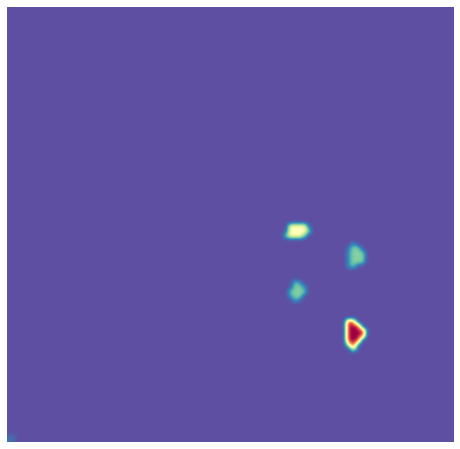

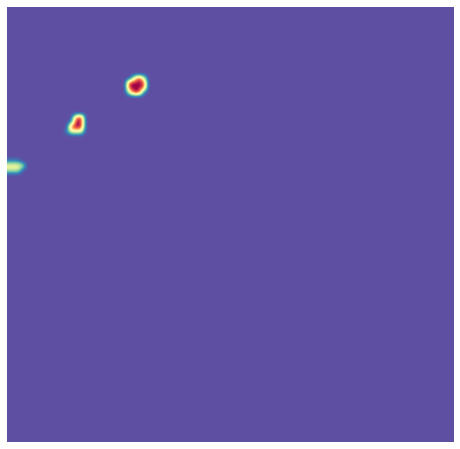

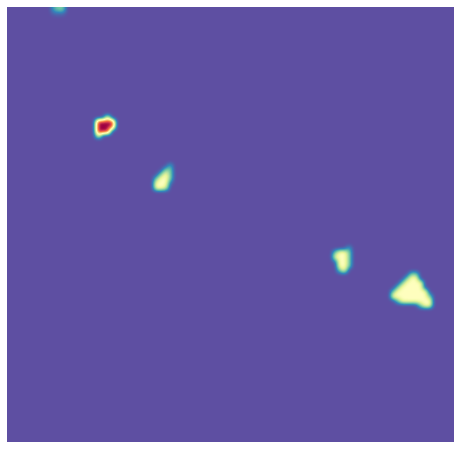

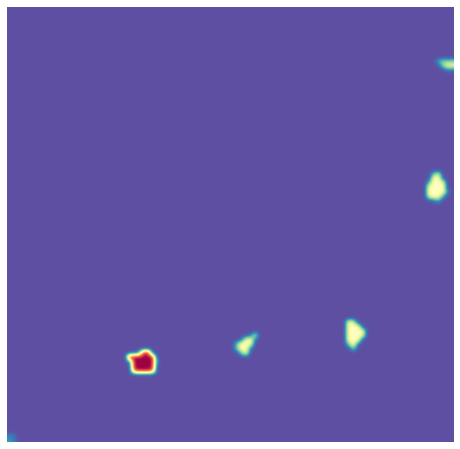

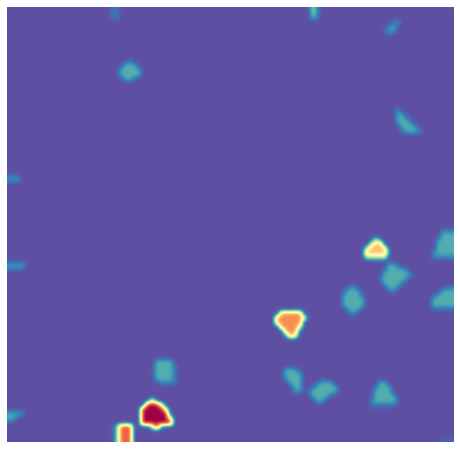

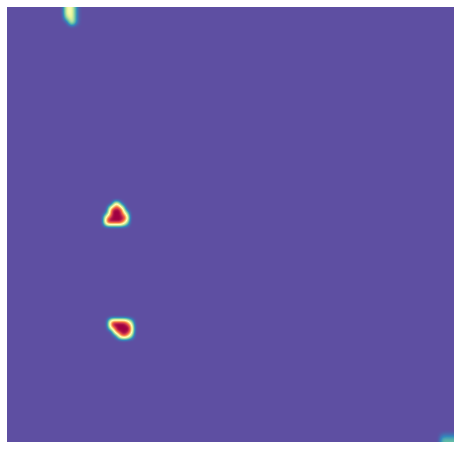

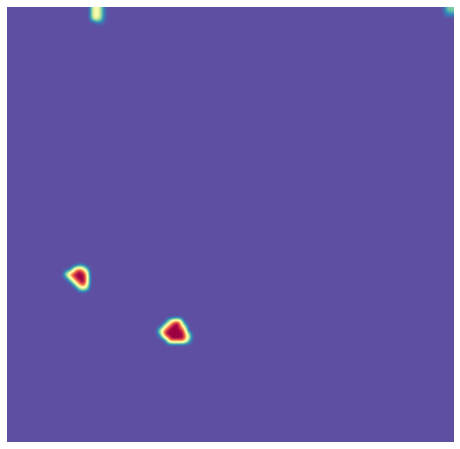

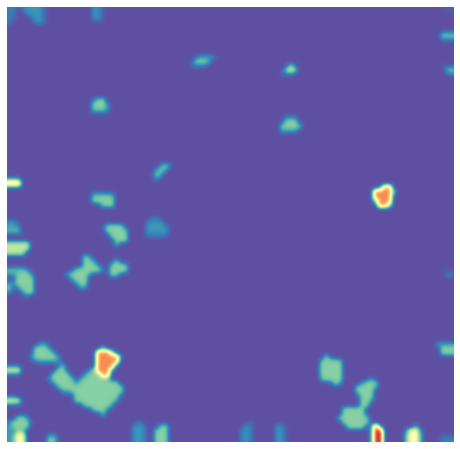

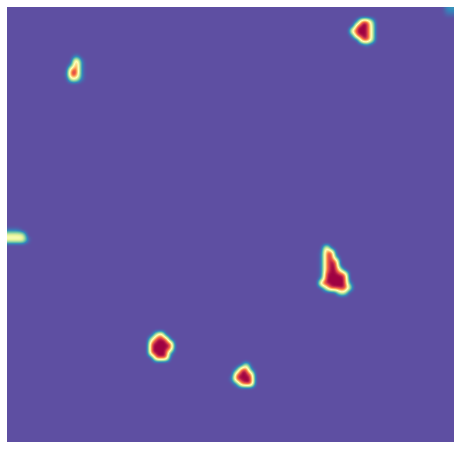

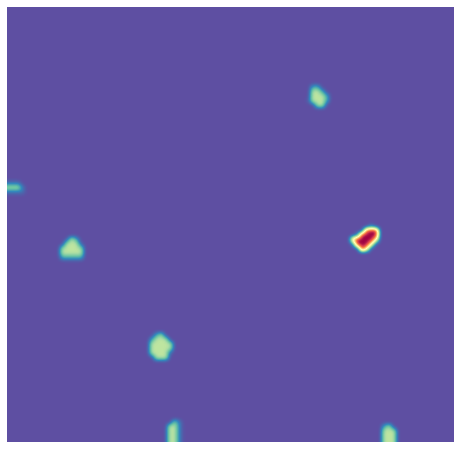

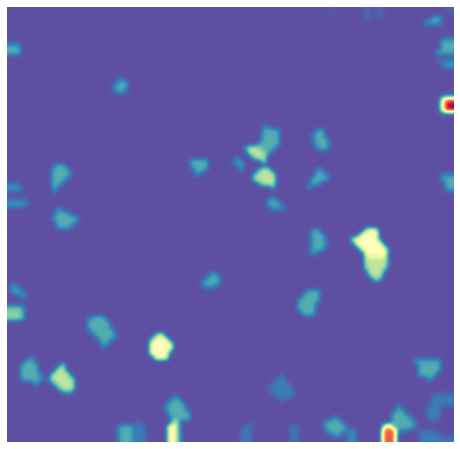

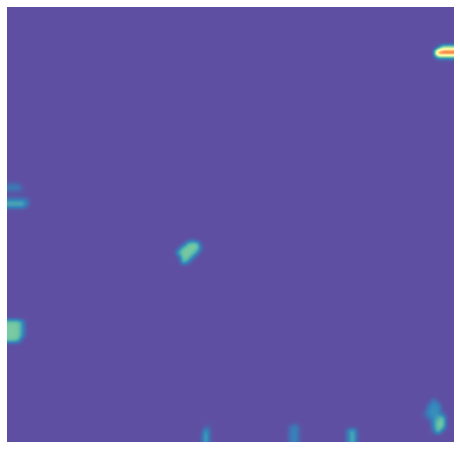

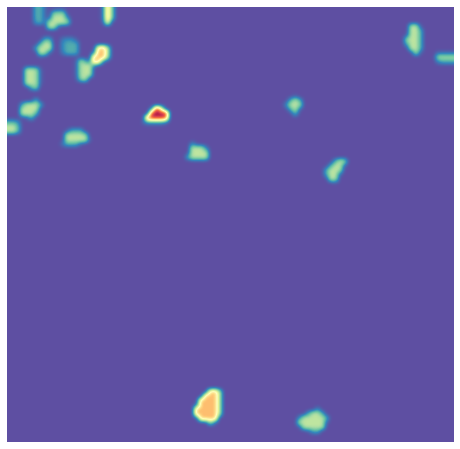

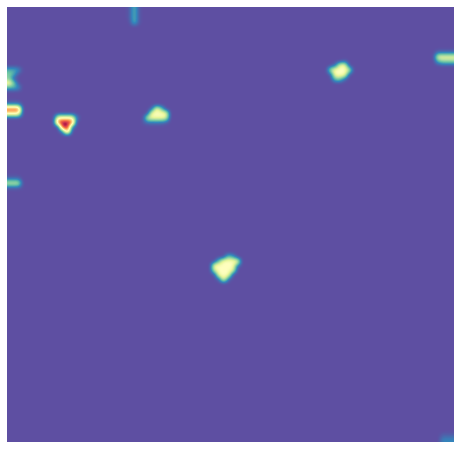

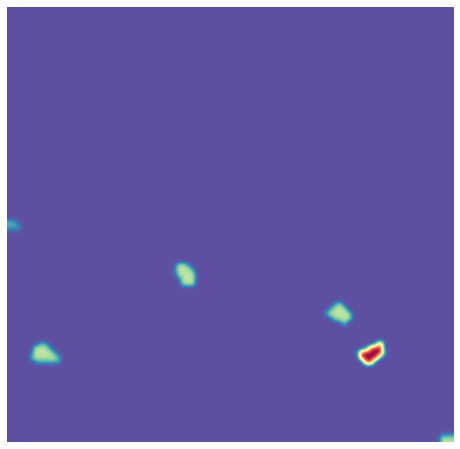

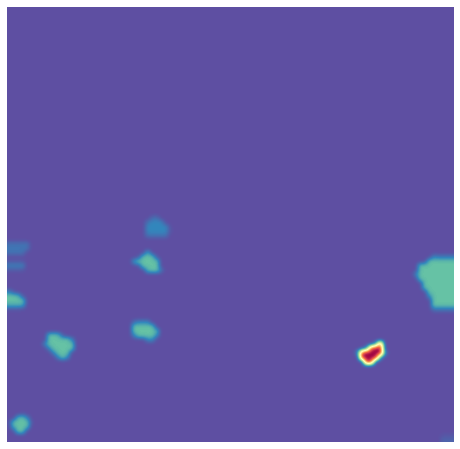

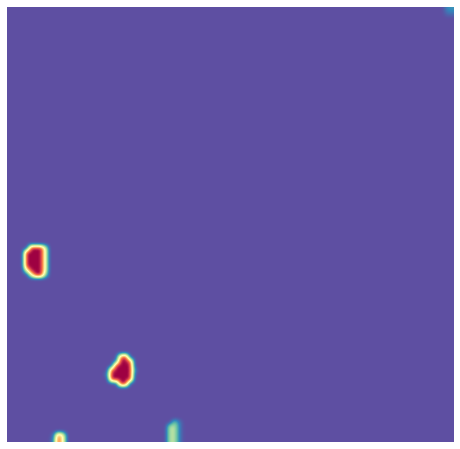

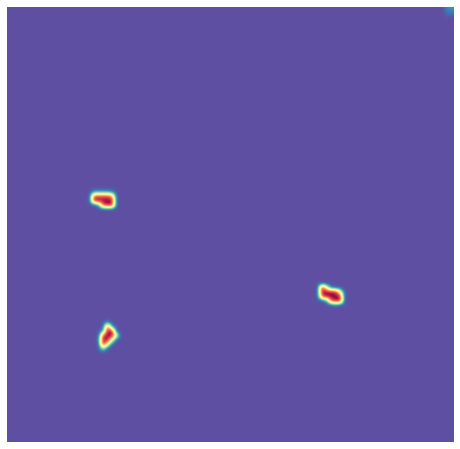

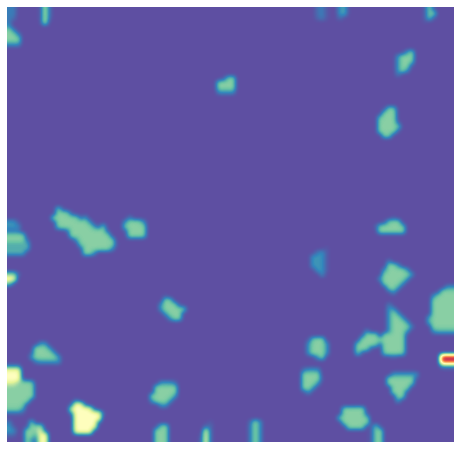

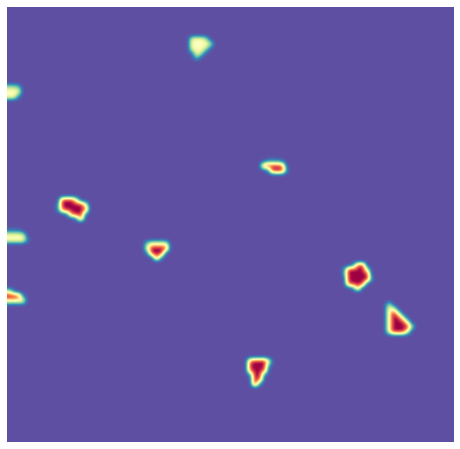

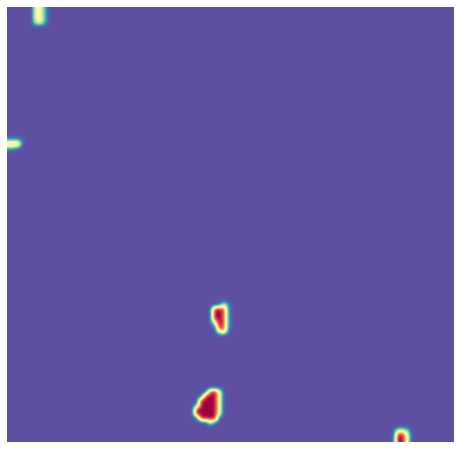

KeyboardInterrupt: ignored

In [0]:
som.view_component_planes()

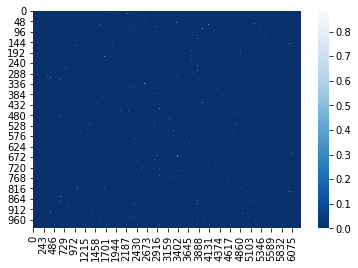

In [0]:
m = pd.DataFrame(bag_of_wors_idf.todense())
import seaborn as sb
sb.heatmap(m,cmap='Blues_r')

### Vector basado en predicciones (Utilizado para Evaluar la coherencia de los modelos)
**Referencias:**
1. https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

####**Descripcion**

**Nota** La extracción de características es muy diferente de la selección de características : la primera consiste en transformar datos arbitrarios, como texto o imágenes, en características numéricas utilizables para el aprendizaje automático. Esta última es una técnica de aprendizaje automático aplicada en estas características.

Hasta ahora hemos utilizado la aparición de palabras específicas y patrones de palabras para realizar clasificaciones de prueba. En esta sección, llevaremos el aprendizaje automático aún más lejos e intentaremos extraer los significados previstos de frases complejas. Algunos ejemplos simples incluyen:
Python es relativamente fácil de aprender.
Esa fue la peor película que he visto.
Sin embargo, las cosas se ponen más difíciles con frases como:
No me disgustan los huevos verdes y el jamón. (requiere manejo de negación)
La forma en que se hace esto es a través de complejos algoritmos de aprendizaje automático como word2vec. La idea es crear matrices numéricas, o incrustaciones de palabras para cada palabra en un corpus grande. A cada palabra se le asigna su propio vector de tal manera que las palabras que aparecen frecuentemente juntas en el mismo contexto reciben vectores cercanos. El resultado es un modelo que puede no saber que un "león" es un animal, pero sí sabe que "león" está más cerca en contexto al "gato" que al "diente de león".
Es importante tener en cuenta que la creación de modelos útiles lleva mucho tiempo (horas o días para entrenar un corpus grande) y que para nuestros propósitos es mejor importar un modelo existente en lugar de tomarse el tiempo para entrenar el nuestro.

Estos metodos son usados para la representacion de palabras

Hasta ahora, hemos visto métodos deterministas para determinar vectores de palabras. Pero estos métodos demostraron ser limitados en sus representaciones de palabras hasta que Mitolov, etc., introdujo word2vec en la comunidad de PNL. Estos métodos se basaban en la predicción en el sentido de que proporcionaban probabilidades a las palabras y demostraban ser avanzadas para tareas como analogías de palabras y similitudes de palabras. También pudieron realizar tareas como King -man + woman = Queen, lo que se consideró un resultado casi mágico. Así que echemos un vistazo al modelo de word2vec utilizado hasta hoy para generar vectores de palabras.

Word2vec no es un algoritmo único, sino una combinación de dos técnicas: CBOW (bolsa continua de palabras) y modelo Skip-gram. Ambas son redes neuronales poco profundas que asignan palabras a la variable objetivo, que también es una palabra (s). Ambas técnicas aprenden pesos que actúan como representaciones de vectores de palabras. Discutamos ambos métodos por separado y obtengamos intuición en su funcionamiento.

####**CBOW (Bolsa continua de palabras)**

La forma en que funciona CBOW es que tiende a predecir la probabilidad de una palabra dado un contexto. Un contexto puede ser una sola palabra o un grupo de palabras. Pero por simplicidad, tomaré una sola palabra de contexto e intentaré predecir una sola palabra objetivo.

Supongamos que tenemos un corpus C = "Oye, este es un corpus de muestra que usa solo una palabra de contexto". y hemos definido una ventana de contexto de 1. Este corpus puede convertirse en un conjunto de entrenamiento para un modelo CBOW de la siguiente manera. La entrada se muestra a continuación. La matriz a la derecha en la imagen de abajo contiene el codificado en caliente de la entrada a la izquierda.

![texto alternativo](https://i.imgur.com/9gN8Gn0.png)

El objetivo para un único punto de datos, por ejemplo, el Punto de datos 4 se muestra a continuación

![texto alternativo](https://i.imgur.com/Z7ZKzou.png)

Esta matriz que se muestra en la imagen de arriba se envía a una red neuronal poco profunda con tres capas: una capa de entrada, una capa oculta y una capa de salida. La capa de salida es una capa softmax que se usa para sumar las probabilidades obtenidas en la capa de salida a 1. Ahora veamos cómo funcionará la propagación directa para calcular la activación de la capa oculta.

Veamos primero una representación esquemática del modelo CBOW.

![texto alternativo](https://i.imgur.com/Z2PUkyz.png)

La representación matricial de la imagen de arriba para un único punto de datos está debajo.

![texto alternativo](https://i.imgur.com/uveHIa9.png)

El flujo es el siguiente:

1. La capa de entrada y el objetivo, ambos están codificados en caliente de tamaño [1 XV]. Aquí V = 10 en el ejemplo anterior.
2. Hay dos juegos de pesas. uno está entre la entrada y la capa oculta y el segundo entre la capa oculta y la salida.
3. Tamaño de matriz de capa de entrada oculta = [VXN], tamaño de matriz de capa de salida oculta = [NXV]: donde N es el número de dimensiones que elegimos para representar nuestra palabra. Es arbitrario y un hiperparámetro para una red neuronal. Además, N es el número de neuronas en la capa oculta. Aquí, N = 4.
4. No hay una función de activación entre las capas. (Más específicamente, me refiero a la activación lineal)
5. La entrada se multiplica por los pesos ocultos de entrada y se llama activación oculta. Es simplemente la fila correspondiente en la matriz oculta de entrada copiada.
6. La entrada oculta se multiplica por los pesos de salida oculta y se calcula la salida.
7. El error entre la salida y el objetivo se calcula y se propaga de nuevo para reajustar los pesos.
8. El peso entre la capa oculta y la capa de salida se toma como la representación vectorial de la palabra.

Vimos los pasos anteriores para una sola palabra de contexto. Ahora, ¿qué pasa si tenemos múltiples palabras de contexto? La imagen a continuación describe la arquitectura para múltiples palabras de contexto.

![texto alternativo](https://i.imgur.com/ha5PQ0P.png)

A continuación se muestra una representación matricial de la arquitectura anterior para una fácil comprensión.

![texto alternativo](https://i.imgur.com/cR1uVkk.png)

La imagen de arriba toma 3 palabras de contexto y predice la probabilidad de una palabra objetivo. Se puede suponer que la entrada toma tres vectores codificados en caliente en la capa de entrada como se muestra arriba en rojo, azul y verde.

Entonces, la capa de entrada tendrá 3 [1 XV] Vectores en la entrada como se muestra arriba y 1 [1 XV] en la capa de salida. El resto de la arquitectura es la misma que para un CBOW de 1 contexto.

Los pasos siguen siendo los mismos, solo cambia el cálculo de la activación oculta. En lugar de simplemente copiar las filas correspondientes de la matriz de peso oculto de entrada a la capa oculta, se toma un promedio sobre todas las filas correspondientes de la matriz. Podemos entender esto con la figura anterior. El vector promedio calculado se convierte en la activación oculta. Entonces, si tenemos tres palabras de contexto para una sola palabra objetivo, tendremos tres activaciones ocultas iniciales que luego se promedian por elementos para obtener la activación final.

Tanto en una sola palabra de contexto como en varias palabras de contexto, he mostrado las imágenes hasta el cálculo de las activaciones ocultas, ya que esta es la parte en la que CBOW difiere de una simple red MLP. Los pasos después del cálculo de la capa oculta son los mismos que los del MLP como se menciona en este artículo: Comprensión y codificación de redes neuronales desde cero .

Las diferencias entre MLP y CBOW se mencionan a continuación para aclaración:

1. La función objetivo en MLP es un MSE (error cuadrático medio) mientras que en CBOW es la probabilidad de registro negativa de una palabra dado un conjunto de contexto, es decir, -log (p (wo / wi)), donde se da p (wo / wi) como:

![texto alternativo](https://i.imgur.com/EKmiett.png)

wo: palabra de salida

wi: palabras de contexto


2. El gradiente de error con respecto a los pesos ocultos de salida y los pesos ocultos de entrada son diferentes ya que MLP tiene activaciones sigmoideas (generalmente) pero CBOW tiene activaciones lineales. Sin embargo, el método para calcular el gradiente es el mismo que un MLP.

**Ventajas de CBOW:**

1. Ser probabilístico es la naturaleza, se supone que es superior a los métodos deterministas (en general).
2. Tiene poca memoria. No necesita tener grandes requisitos de RAM como el de la matriz de coincidencia donde necesita almacenar tres grandes matrices.

**Desventajas de CBOW:**

1. CBOW toma el promedio del contexto de una palabra (como se ve arriba en el cálculo de la activación oculta). Por ejemplo, Apple puede ser tanto una fruta como una compañía, pero CBOW toma un promedio de ambos contextos y lo coloca entre un grupo de frutas y compañías.
2. Entrenar un CBOW desde cero puede llevar una eternidad si no se optimiza adecuadamente.

####**Modelo Skip-Gram**

Skip - gram sigue la misma topología que CBOW. Simplemente le da la vuelta a la arquitectura de CBOW. El objetivo de skip-gram es predecir el contexto dado una palabra. Tomemos el mismo corpus en el que construimos nuestro modelo CBOW. C = "Oye, este es un corpus de muestra que usa solo una palabra de contexto". Construyamos los datos de entrenamiento.

![texto alternativo](https://i.imgur.com/ZZGNXcE.png)

El vector de entrada para skip-gram será similar a un modelo CBOW de 1 contexto. Además, los cálculos hasta las activaciones de capa oculta serán los mismos. La diferencia estará en la variable objetivo. Como hemos definido una ventana de contexto de 1 en ambos lados, habrá " dos" variables objetivo codificadas en caliente y " dos" salidas correspondientes, como se puede ver en la sección azul de la imagen.

Se calculan dos errores separados con respecto a las dos variables objetivo y los dos vectores de error obtenidos se agregan en forma de elementos para obtener un vector de error final que se propaga de nuevo para actualizar los pesos.

Los pesos entre la entrada y la capa oculta se toman como la representación vectorial de palabras después del entrenamiento. La función de pérdida o el objetivo es del mismo tipo que el modelo CBOW.

La arquitectura de salto de gramo se muestra a continuación.

![texto alternativo](https://i.imgur.com/alfOntV.png)

Para una mejor comprensión, a continuación se muestra la estructura de estilo de matriz con cálculo.

![texto alternativo](https://i.imgur.com/MfCVK0c.png)

Analicemos la imagen de arriba.

Tamaño de capa de entrada - [1 XV], Tamaño de matriz de peso oculto de entrada - [VXN], Número de neuronas en capa oculta - N, Tamaño de matriz de peso de salida oculta - [NXV], Tamaño de capa de salida - C [1 XV]

En el ejemplo anterior, C es el número de palabras de contexto = 2, V = 10, N = 4

1. La fila en rojo es la activación oculta correspondiente al vector codificado en caliente de entrada. Básicamente es la fila correspondiente de la matriz oculta de entrada copiada.
2. La matriz amarilla es el peso entre la capa oculta y la capa de salida.
3. La matriz azul se obtiene mediante la multiplicación matricial de la activación oculta y los pesos de salida ocultos. Habrá dos filas calculadas para dos palabras de destino (contexto).
4. Cada fila de la matriz azul se convierte en sus probabilidades softmax individualmente como se muestra en el cuadro verde.
5. La matriz gris contiene los vectores codificados en caliente de las dos palabras de contexto (objetivo).
6. El error se calcula restando la primera fila de la matriz gris (objetivo) de la primera fila de la matriz verde (salida) en forma de elemento. Esto se repite para la siguiente fila. Por lo tanto, para n  palabras de contexto objetivo, tendremos n vectores de error.
7. La suma de elementos sabios se toma sobre todos los vectores de error para obtener un vector de error final.
8. Este vector de error se propaga de nuevo para actualizar los pesos.

**Ventajas del modelo Skip-Gram**
1. El modelo Skip-gram puede capturar dos semánticas para una sola palabra. es decir, tendrá dos representaciones vectoriales de Apple. Uno para la empresa y otro para la fruta.
2. Skip-gram con submuestreo negativo supera a todos los demás métodos en general.

####**Las incrustaciones de palabras utilizan escenarios de casos**

Dado que las incrustaciones de palabras o los vectores de palabras son representaciones numéricas de similitudes contextuales entre palabras, pueden manipularse y realizarse para realizar tareas asombrosas como:

1. Encontrar el grado de similitud entre dos palabras.

  model.similarity('Mujer','Hombre')
  
  0.73723527

2. Encontrar uno extraño.

  model.doesnt_match('desayuno cereal cena almuerzo';.split())
  
  'cereal'

3. Cosas increíbles como mujer + rey-hombre = reina
  
  model.most_similar(positive=['Mujer','Rey'],negative=['Hombre'],topn=1)
  
  Reina: 0.508

4. Probabilidad de un texto bajo el modelo.

  model.score(['El zorro saltó sobre el perro perezoso.'.split()])
  
  0.21

  A continuación se muestra una interesante visualización de word2vec.

  ![texto alternativo](https://i.imgur.com/mripfdn.png)

  La imagen de arriba es una representación t-SNE de vectores de palabras en 2 dimensiones y puede ver que se han capturado dos contextos de manzana. Una es una fruta y la otra compañía.

5. Se puede utilizar para realizar la traducción automática.

  ![texto alternativo](https://i.imgur.com/F0tPid4.png)

  El gráfico anterior es una incrustación bilingüe con chino en verde e inglés en amarillo. Si conocemos las palabras que tienen significados similares en chino e inglés, la incrustación bilingüe anterior se puede usar para traducir un idioma al otro.

####**Usando vectores de palabras pre-entrenados**

Vamos a utilizar el modelo pre-entrenado de google. Contiene vectores de palabras para un vocabulario de 3 millones de palabras formadas en alrededor de 100 mil millones de palabras del conjunto de datos de Google News. El enlace de descarga para el modelo es este(https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)(Cuidado, es una descarga de 1,5 GB.) .

In [0]:
from gensim.models import Word2Vec

#Cargando el modelo descargado
model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, norm_only=True)

El modelo esta cargado. Se puede usar para realizar todas las tareas mencionadas anteriormente.

In [0]:
# Obteniendo vectores de palabras para una palabra
dog = model['dog']

In [0]:
#Realizando Rey Reyna Magia
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

In [0]:
#Escogiendo uno extraño
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

In [0]:
#Imprimiendo indice de similaridad
print(model.similarity('woman', 'man'))

####**Entrenando tus propios vectores de palabras**

Referencias:
* https://github.com/derekgreene/topic-model-tutorial/blob/master/1%20-%20Text%20Preprocessing.ipynb
* https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

Entrenaremos nuestro propio word2vec en un corpus personalizado. Para entrenar el modelo usaremos gensim y los pasos se ilustran a continuación.

word2Vec requiere un formato de lista de listas para capacitación donde cada documento está contenido en una lista y cada lista contiene una lista de tokens de esos documentos. No voy a cubrir la parte de preprocesamiento aquí. Así que tomemos una lista de ejemplo de lista para entrenar nuestro modelo word2vec.

In [0]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = normalize_w2v

    def __iter__( self ):
        print("Building Word2Vec model ...")
        #Recorriendo documentos
        for doc in self.documents:
          #Variable pra almacenar tokens
          tokens=[]
          #Recorriendo token
          for tok in self.tokenizer( doc ):
            #Agregando token a variable
            tokens.append( tok )
            yield tokens  

In [0]:
docgen = TokenGenerator(df['News'], nlp.Defaults.stop_words )

In [18]:
import gensim

#Entrenando modelo word 2 vect
%time w2v_model = gensim.models.Word2Vec(docgen, size=300, min_count=3, sg=0,)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
CPU times: user 32min 57s, sys: 13.1 s, total: 33min 10s
Wall time: 14min 33s


In [19]:
print( "Model has %d terms" % len(w2v_model.wv.vocab) )

Model has 21088 terms


In [23]:
w2v_model.similarity(str('rey') ,str('hombre'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.03121991

#####**Parametros**

* **sentences**  ( iterables de iterables , opcionales ): las oraciones iterables pueden ser simplemente una lista de listas de tokens, pero para corpus más grandes, considere un iterable que transmita las oraciones directamente desde el disco / red. Ver BrownCorpus, Text8Corpus o LineSentenceen el word2vecmódulo para tales ejemplos. Consulte también el tutorial sobre transmisión de datos en Python . Si no proporciona oraciones , el modelo se deja sin inicializar; úselo si planea inicializarlo de alguna otra manera.

* **corpus_file** ( str , opcional ): ruta a un archivo corpus en LineSentenceformato. Puede usar este argumento en lugar de oraciones para aumentar el rendimiento. Solo se necesita pasar una de las oraciones o argumentos de corpus_file (o ninguno de ellos, en ese caso, el modelo se deja sin inicializar).

* **size** ( int , opcional ) - Dimensionalidad de los vectores de palabras.

* **windows** ( int , opcional ) - Distancia máxima entre la palabra actual y la predicha dentro de una oración.

* **min_count** ( int , opcional ): ignora todas las palabras con una frecuencia total inferior a esta.

* **workers** ( int , opcional ): use estos hilos de trabajo para entrenar el modelo (= entrenamiento más rápido con máquinas multinúcleo).

* **sg** ( {0 , 1} , opcional ) - Algoritmo de entrenamiento: 1 para skip-gram; de lo contrario CBOW.

* **hs** ( {0 , 1} , opcional ): si es 1, se utilizará softmax jerárquico para el entrenamiento del modelo. Si 0 y negativo es distinto de cero, se utilizará un muestreo negativo.

* **negative** ( int , opcional ): si> 0, se utilizará un muestreo negativo, el int para negativo especifica cuántas "palabras de ruido" se deben dibujar (generalmente entre 5-20). Si se establece en 0, no se utiliza muestreo negativo.

* **ns_exponent** ( flotante , opcional ): el exponente utilizado para dar forma a la distribución de muestreo negativa. Un valor de 1.0 muestra exactamente en proporción a las frecuencias, 0.0 muestra todas las palabras por igual, mientras que un valor negativo muestra más palabras de baja frecuencia que palabras de alta frecuencia. El popular valor predeterminado de 0,75 fue elegido por el documento original de Word2Vec. Más recientemente, en https://arxiv.org/abs/1804.04212 , Caselles-Dupré, Lesaint y Royo-Letelier sugieren que otros valores pueden funcionar mejor para las aplicaciones de recomendación.

* **cbow_mean** ( {0 , 1} , opcional ): si es 0, use la suma de los vectores de palabras de contexto. Si 1, use la media, solo se aplica cuando se usa cbow.

* **alfa** ( flotante , opcional ): la tasa de aprendizaje inicial.

* **min_alpha** ( flotante , opcional ): la tasa de aprendizaje se reducirá linealmente a min_alpha a medida que avanza el entrenamiento.

* **seed** ( int , opcional ): semilla para el generador de números aleatorios. Los vectores iniciales para cada palabra se siembran con un hash de la concatenación de palabra + str (semilla) . Tenga en cuenta que para una ejecución totalmente determinista y reproducible, también debe limitar el modelo a un único subproceso de trabajo ( trabajadores = 1 ), para eliminar la fluctuación de orden de la programación de subprocesos del sistema operativo. (En Python 3, la reproducibilidad entre los lanzamientos de intérpretes también requiere el uso de la variable de entorno PYTHONHASHSEED para controlar la aleatorización de hash).

* **max_vocab_size** ( int , opcional ): limita la RAM durante la creación de vocabulario; Si hay más palabras únicas que esta, pode las poco frecuentes. Cada 10 millones de tipos de palabras necesitan aproximadamente 1 GB de RAM. Establezca en Ninguno sin límite.

* **max_final_vocab** ( int , opcional ): limita el vocabulario a un tamaño de vocabulario de destino seleccionando automáticamente un min_count coincidente. Si la cuenta_min especificada es mayor que la cuenta_min calculada, se usará la cuenta_min especificada. Establezca en Ninguno si no es necesario.

* **sample** ( float , opcional ): el umbral para configurar qué palabras de mayor frecuencia se muestrean aleatoriamente, el rango útil es (0, 1e-5).

* **hashfxn** ( función , opcional ): función de hash que se utiliza para inicializar pesas al azar, para aumentar la reproducibilidad del entrenamiento.

* **iter** ( int , opcional ): número de iteraciones (épocas) sobre el corpus.

* **trim_rule** ( función , opcional ) -

  La regla de recorte de vocabulario, especifica si ciertas palabras deben permanecer en el vocabulario, recortarse o manejarse utilizando el valor predeterminado (descartar si el recuento de palabras <min_count>). Puede ser None (se usará min_count, mirar keep_vocab_item()) o un invocable que acepte parámetros (word, count, min_count) y devuelva ya sea gensim.utils.RULE_DISCARD, gensim.utils.RULE_KEEPo gensim.utils.RULE_DEFAULT. La regla, si se da, solo se usa para podar vocabulario durante build_vocab () y no se almacena como parte del modelo.

  Los parámetros de entrada son de los siguientes tipos:
  * word (str) - la palabra que estamos examinando

  * count (int) - el conteo de frecuencia de la palabra en el corpus

  * min_count (int): el umbral de recuento mínimo.

* **sorted_vocab** ( {0 , 1} , opcional ): si es 1, clasifique el vocabulario por frecuencia descendente antes de asignar índices de palabras. Ver sort_vocab().

* **batch_words** ( int , opcional ): tamaño de destino (en palabras) para lotes de ejemplos pasados ​​a subprocesos de trabajo (y, por lo tanto, rutinas de cython). ese máximo.)

* **compute_loss** ( bool , opcional ): si es True, calcula y almacena el valor de pérdida que se puede recuperar usando get_latest_training_loss().

* **callbacks** de llamada (iterables CallbackAny2Vec, opcionales): secuencia de devoluciones de llamada que se ejecutarán en etapas específicas durante el entrenamiento.

#####**Vector de palabras**

oración = [['' Neeraj ',' Niño '], [' Sarwan ',' es '], [' bueno ',' niño ']]

In [0]:
#training word2vec on 3 sentences
#model = gensim.models.Word2Vec(df['text'], min_count=3,size=300,workers=4)
w2v_model = gensim.models.Word2Vec(df['text'], size=500, min_count=3, sg=0,sample=0.95)

Tratemos de comprender los parámetros de este modelo.

* oración - lista de la lista de nuestro corpus

* min_count = 1 -el valor umbral para las palabras. Las palabras con una frecuencia mayor que esta solo se incluirán en el modelo.

* size = 300 - el número de dimensiones en las que deseamos representar nuestra palabra. Este es el tamaño de la palabra vector.

* trabajadores = 4 - usado para paralelización

In [0]:
#Usando el modelo
#El nuevo modelo entrenado se puede usar de manera similar a los pre-entrenados.

#Imprimiendo índice de similitud
print(model.similarity('woman', 'man')

#### **Vectoresde palabras con Spacy** 

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
nlp(u'un leon estaba enfermo').vector

array([-0.77060324, -0.42275724, -0.28313774, -0.6041137 , -0.00616151,
       -0.3604655 , -0.252932  , -0.03772102, -0.057355  ,  1.7702136 ,
       -0.64731675,  0.42092472, -0.5746412 , -0.751471  ,  1.2701099 ,
        0.26700875,  0.8126525 ,  0.38709   , -0.15622325,  0.45525125,
        1.1952195 , -0.13775025, -0.5218028 , -0.338747  ,  0.41483852,
       -0.03690675, -0.71675223,  1.3583415 ,  0.39703423, -0.43191248,
        1.5927122 ,  0.30658326, -1.4102194 , -0.27563298,  0.14511275,
        0.9607797 ,  0.464392  ,  0.0607775 ,  0.44654626,  0.503201  ,
       -0.34975922,  0.0160975 , -0.09703724, -0.45799172, -0.2233965 ,
       -0.11877227, -0.54133576, -1.5588989 , -0.21994877, -0.45916277],
      dtype=float32)

In [0]:
# Create a three-token Doc object:
if(tokens.vector_norm):
  tokens = nlp('allianz')
  similar_word = nlp('penalti')
  if (similar_word):
    if(tokens):
      print(similar_word,tokens)
      print(similar_word.similarity(tokens))
similar_word.vector_norm
  # Iterate through token combinations:
#for token1 in tokens:
 #   for token2 in tokens:
  #      print(token1.text, token2.text, token1.similarity(token2))

5.475593366028111

####**Proyectos**

1. Problema de práctica: [identificar los sentimientos](https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/?utm_source=word-embeddings-count-word2veec&utm_medium=blog) - Identificar el sentimiento de los tweets 

2. Problema de práctica: [Análisis de sentimientos de Twitter](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/?utm_source=word-embeddings-count-word2veec&utm_medium=blog) - Para detectar el discurso de odio en tweets

## Modelado de temas (https://monkeylearn.com/topic-analysis/)

El modelado de temas resuelve el siguiente tipo de problema: tiene un conjunto de documentos de texto (como correos electrónicos, respuestas a encuestas, tickets de soporte, revisiones de productos, etc.) y desea conocer los diferentes temas que cubren y agruparlos por temas

La forma en que funcionan estos algoritmos es asumiendo que cada documento está compuesto por una mezcla de temas, y luego tratando de descubrir qué tan fuerte es la presencia de cada tema en un documento dado. Esto se realiza agrupando los documentos en función de las palabras que contienen y observando las correlaciones entre ellos.

### Asignación de Dirichlet Latente (LDA) (https://scikit-learn.org/stable/modules/decomposition.html#nmf)



#### **Descripcion**

La asignación de Dirichlet latente es un modelo probabilístico generativo para colecciones de conjuntos de datos discretos, como corpus de texto. También es un modelo de tema que se utiliza para descubrir temas abstractos de una colección de documentos.

El modelo gráfico de LDA es un modelo generativo de tres niveles:

![texto alternativo](https://scikit-learn.org/stable/_images/lda_model_graph.png)

**Nota** sobre las notaciones presentadas en el modelo gráfico anterior, que se puede encontrar en Hoffman et al. (2013):

*   El corpus es una colección de D documentos.
*   Un documento es una secuencia de N palabras.
*   Existen K temas en el corpus.
*   Los cuadros representan muestras repetidas.

En el modelo gráfico, cada nodo es una variable aleatoria y tiene un papel en el proceso generativo. Un nodo sombreado indica una variable observada y un nodo no sombreado indica una variable oculta (latente). En este caso, las palabras en el corpus son los únicos datos que observamos. Las variables latentes determinan la mezcla aleatoria de temas en el corpus y la distribución de palabras en los documentos. El objetivo de LDA es usar las palabras observadas para inferir la estructura oculta del tema.

Al modelar corpus de texto, el modelo asume el siguiente proceso generativo para un corpus con D documentos y K temas, con K correspondiente a n_components en la API:

![texto alternativo](https://i.imgur.com/WdGRiM3.png)

Para la estimación de parámetros, la distribución posterior es:

![texto alternativo](https://i.imgur.com/CtzqcG7.png)

![texto alternativo](https://i.imgur.com/undkRCG.png)

LatentDirichletAllocation implementa el algoritmo Bayes variacional en línea y admite métodos de actualización en línea y por lotes. Mientras que el método por lotes actualiza las variables variacionales después de cada pase completo a través de los datos, el método en línea actualiza las variables variacionales desde los puntos de datos de mini lotes.

**Nota:** Aunque se garantiza que el método en línea converge a un punto óptimo local, la calidad del punto óptimo y la velocidad de convergencia pueden depender del tamaño del mini lote y los atributos relacionados con la configuración de la tasa de aprendizaje.

Cuando LatentDirichletAllocation se aplica en una matriz "documento-término", la matriz se descompondrá en una matriz "tema-término" y una matriz "documento-tema". Si bien la matriz "tema-término" se almacena como components_en el modelo, la matriz "tema-documento" se puede calcular a partir del transformmétodo.

LatentDirichletAllocation También implementa el partial_fitmétodo. Esto se usa cuando los datos se pueden recuperar secuencialmente.

**Generar modelo**

**Parametros**


*   n_components (numero de temas)
*   doc_topic_prior (Distribución previa del tema del documento)
*   topic_word_prior (Prioridad del tema de distribución de palabras)
*   learning_metod (Método utilizado para actualizar _component. Solo se usa en el fitmétodo. En general, si el tamaño de los datos es grande, la actualización en línea será mucho más rápida que la actualización por lotes.) - ('batch': Batch variational Bayes method. Use all training data in each EM update.
  Old `components_` will be overwritten in each iteration.
'online': Online variational Bayes method. In each EM update, use
  mini-batch of training data to update the components_
  variable incrementally. The learning rate is controlled by the
  learning_decay and the learning_offset parameters.)
*   learning_decay (Es un parámetro que controla la tasa de aprendizaje en el método de aprendizaje en línea. El valor debe establecerse entre (0.5, 1.0] para garantizar la convergencia asintótica. Cuando el valor es 0.0 y el tamaño del lote es n_samples, el método de actualización es el mismo que el aprendizaje por lotes.)
*   learning_offset (Un parámetro (positivo) que contrarresta las primeras iteraciones en el aprendizaje en línea. Debería ser mayor que 1.0. En la literatura, esto se llama tau_0.)
*   max_iter (El número máximo de iteraciones)
*   batch_size (Número de documentos a utilizar en cada iteración EM. Solo se utiliza en el aprendizaje en línea.)
*   evaluate_every (Con qué frecuencia evaluar la perplejidad. Solo se usa en el fitmétodo. configúrelo en 0 o número negativo para no evaluar la perplejidad en el entrenamiento en absoluto. Evaluar la perplejidad puede ayudarlo a verificar la convergencia en el proceso de capacitación, pero también aumentará el tiempo total de capacitación. Evaluar la perplejidad en cada iteración podría aumentar el tiempo de entrenamiento hasta dos veces.
*   total_samples (Número total de documentos. Solo se usa en el partial_fitmétodo.)
*   perp_tol (Tolerancia de perplejidad en el aprendizaje por lotes. Solo se usa cuando evaluate_everyes mayor que 0.)
*   mean_change_tol (Detener la tolerancia para actualizar la distribución de temas de documentos en E-step.)
*   max_doc_update_iter (Número máximo de iteraciones para actualizar la distribución de temas del documento en el E-step.)
*   n_jobs (El número de trabajos a usar en el E-step. Nonesignifica 1 a menos que esté en un joblib.parallel_backendcontexto. -1significa usar todos los procesadores. Ver Glosario para más detalles.)
*   verbose (Nivel de verbosidad.)
*   random_state (Si int, random_state es la semilla utilizada por el generador de números aleatorios; Si es una instancia RandomState, random_state es el generador de números aleatorios; Si ninguno, el generador de números aleatorios es la instancia RandomState utilizada por np.random.)



####**Parametros**

####**Modelo**

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
kmin, kmax = 3, 15

In [32]:
topic_models = []
# Probando modelo lda con distintos parametros
for k in range(kmin,kmax+1):
    print("Aplicando lda para k=%d ..." % k )
    # Ejecutando modelo LDA
    % time model = LatentDirichletAllocation( n_components=k,random_state=0,n_jobs=-1,evaluate_every=10 ) 
    # Almacenando resultado del modelo
    W = model.fit_transform( bag_of_wors_idf )
    # Almacenando componentes
    H = model.components_    
    # Almacenar resultados para su posterior uso
    topic_models.append( (k,W,H) )

Aplicando lda para k=3 ...
CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 22.4 µs
Aplicando lda para k=4 ...
CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.5 µs
Aplicando lda para k=5 ...
CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 16.9 µs
Aplicando lda para k=6 ...
CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 19.6 µs
Aplicando lda para k=7 ...
CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 30.5 µs
Aplicando lda para k=8 ...
CPU times: user 27 µs, sys: 1 µs, total: 28 µs
Wall time: 30.3 µs
Aplicando lda para k=9 ...
CPU times: user 85 µs, sys: 1 µs, total: 86 µs
Wall time: 89.4 µs
Aplicando lda para k=10 ...
CPU times: user 87 µs, sys: 1 µs, total: 88 µs
Wall time: 91.3 µs
Aplicando lda para k=11 ...
CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 55.1 µs
Aplicando lda para k=12 ...
CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 44.8 µs
Aplicando lda para k=13 ...
CPU times: user 35 µs, sys: 1 µs, total

###Non MatrixFactorizacion (NMF)

####**Parametros**

* **n_components:** int o None

  Número de componentes, si n_components no está configurado, se conservan todas las características.

* **init: None | 'random' | 'nndsvd' | 'nndsvda' | 'nndsvdar' | 'custom'**

  Método utilizado para inicializar el procedimiento. Predeterminado: Ninguno. Opciones válidas:

  * Ninguno: 'nndsvd' si n_components <= min (n_samples, n_features),
de lo contrario al azar.

  * 'random': matrices aleatorias no negativas, escaladas con:
sqrt (X.mean () / n_components)

  * 'nndsvd': Descomposición de valor singular doble no negativo (NNDSVD)
inicialización (mejor para la escasez)

  * 'nndsvda': NNDSVD con ceros llenos con el promedio de X
(mejor cuando no se desea la dispersión)

  * nndsvdar': NNDSVD con ceros llenos de pequeños valores aleatorios
(generalmente una alternativa menos rápida y menos precisa al NNDSVDa para cuando no se desea la escasez)

  * 'personalizado': use matrices personalizadas W y H

* **solver:** 'cd' | 'mu'

  Solucionador numérico a utilizar: 'cd' es un solucionador de descenso coordinado. 'mu' es un solucionador de actualizaciones multiplicativas.

  Nuevo en la versión 0.17: Coordinate Descent solver.

  Nuevo en la versión 0.19: solucionador de actualizaciones multiplicativas.

* **beta_loss:** float o string, por defecto 'frobenius'

  La cadena debe estar en {'frobenius', 'kullback-leibler', 'itakura-saito'}. Se minimiza la divergencia beta, midiendo la distancia entre X y el producto punto WH. Tenga en cuenta que los valores diferentes de 'frobenius' (o 2) y 'kullback-leibler' (o 1) conducen a ajustes significativamente más lentos. Tenga en cuenta que para beta_loss <= 0 (o 'itakura-saito'), la matriz de entrada X no puede contener ceros. Se usa solo en el solucionador 'mu'.

  Nuevo en la versión 0.19.

* **Tol:** flotante, predeterminado: 1e-4

  Tolerancia de la condición de parada.

* **max_iter:** entero, predeterminado: 200

  Número máximo de iteraciones antes del tiempo de espera.

* **random_state:** int, instancia RandomState o None, opcional, predeterminado: Ninguno

  Si int, random_state es la semilla utilizada por el generador de números aleatorios; Si es una instancia RandomState, random_state es el generador de números aleatorios; Si ninguno, el generador de números aleatorios es la instancia RandomState utilizada por np.random.

* **alpha:** doble, predeterminado: 0.

  Constante que multiplica los términos de regularización. Póngalo a cero para no tener regularización.

  Nuevo en la versión 0.17: alfa utilizado en el solucionador de descenso de coordenadas.

* **l1_ratio:** double, por defecto: 0.

  El parámetro de mezcla de regularización, con 0 <= l1_ratio <= 1. Para l1_ratio = 0, la penalización es una penalización L2 por elementos (también conocida como Norma Frobenius). Para l1_ratio = 1 es una penalización L1 por elementos. Para 0 <l1_ratio> <1>, la penalización es una combinación de L1 y L2.

  Nuevo en la versión 0.17: parámetro de regularización l1_ratio utilizado en el solucionador de descenso de coordenadas.

* **verbose:** bool detallado, predeterminado = falso

  Ya sea para ser detallado.

* **shuffle:** boolean, predeterminado: False

  Si es verdadero, aleatorice el orden de las coordenadas en el solucionador de CD.

  Nuevo en la versión 0.17: parámetro aleatorio utilizado en el solucionador de Descenso de coordenadas.

####**Descripcion**

Aunque existen multiples variaciones de este metodo

#####**NMF con la norma Frobenius**

NMF (Referencia: “Learning the parts of objects by non-negative matrix factorization” D. Lee, S. Seung, 1999) es un enfoque alternativo a la descomposición que supone que los datos y los componentes no son negativos. NMF se puede utilizar en lugar de PCA o sus variantes, en los casos en que la matriz de datos no contiene valores negativos. Encuentra una descomposición de muestras X en dos matrices W y H de elementos no negativos, optimizando la distancia d Entre X y el producto matriz WH. La función de distancia más utilizada es la norma de Frobenius al cuadrado, que es una extensión obvia de la norma euclidiana a las matrices:

![texto alternativo](https://i.imgur.com/iT1TrgA.png)

A diferencia PCA, la representación de un vector se obtiene de forma aditiva, superponiendo los componentes, sin restar. Tales modelos aditivos son eficientes para representar imágenes y texto.

Se ha observado en (Referencia: “Non-negative Matrix Factorization with Sparseness Constraints” P. Hoyer, 2004) que, cuando se restringe cuidadosamente, NMF puede producir una representación basada en partes del conjunto de datos, lo que resulta en modelos interpretables. El siguiente ejemplo muestra 16 componentes dispersos encontrados por NMF las imágenes en el conjunto de datos de caras de Olivetti, en comparación con las caras propias de PCA.

![texto alternativo](https://i.imgur.com/hqbJYIm.png)

El initatributo determina el método de inicialización aplicado, lo que tiene un gran impacto en el rendimiento del método. NMFimplementa el método de descomposición de valor singular doble no negativo. NNDSVD (Referencia: “SVD based initialization: A head start for nonnegative matrix factorization” C. Boutsidis, E. Gallopoulos, 2008) se basa en dos procesos SVD, uno que se aproxima a la matriz de datos, el otro que se aproxima a secciones positivas de los factores SVD parciales resultantes utilizando una propiedad algebraica de matrices de rango unitario. El algoritmo básico NNDSVD es más adecuado para la factorización dispersa. Sus variantes NNDSVDa (en el que todos los ceros se establecen igual a la media de todos los elementos de los datos), y NNDSVDar (en el que los ceros se establecen en perturbaciones aleatorias menores que la media de los datos divididos por 100) se recomiendan en el denso caso.

Tenga en cuenta que el solucionador de Actualización Multiplicativa ('mu') no puede actualizar los ceros presentes en la inicialización, por lo que conduce a resultados más pobres cuando se usa conjuntamente con el algoritmo NNDSVD básico que introduce muchos ceros; en este caso, se debe preferir NNDSVDa o NNDSVDar.

NMFtambién se puede inicializar con matrices aleatorias no negativas escaladas correctamente mediante la configuración init="random". RandomStateTambién se puede pasar una semilla entera o a random_statepara controlar la reproducibilidad.

En NMF, los anteriores L1 y L2 se pueden agregar a la función de pérdida para regularizar el modelo. El L2 anterior usa la norma Frobenius, mientras que el L1 anterior usa una norma L1 por elementos. Como en ElasticNet, controlamos la combinación de L1 y L2 con el l1_ratio(p), y la intensidad de la regularización con el alpha (a) parámetro. Entonces los términos anteriores son:

![texto alternativo](https://i.imgur.com/sLiRRsQ.png)

y la función objetivo regularizada es:

![texto alternativo](https://i.imgur.com/04tlQSC.png)

NMFregulariza tanto W como H. La función pública non_negative_factorization permite un control más fino a través de la regularizacion atributo, y puede regularizar solo W, solo H o ambos.

#####**NMF con una beta-divergencia**

Como se describió anteriormente, la función de distancia más utilizada es la norma de Frobenius al cuadrado, que es una extensión obvia de la norma euclidiana a las matrices:

![texto alternativo](https://i.imgur.com/S1eM6je.png)

Se pueden utilizar otras funciones de distancia en NMF como, por ejemplo, la divergencia Kullback-Leibler (KL) (generalizada), también denominada divergencia I:

![texto alternativo](https://i.imgur.com/jtaFbfP.png)

O, la divergencia Itakura-Saito (IS):

![texto alternativo](https://i.imgur.com/K59tHCw.png)

Estas tres distancias son casos especiales de la familia beta-divergencia, con B=2,1,0 respectivamente (Referencia: 
“Algorithms for nonnegative matrix factorization with the beta-divergence” C. Fevotte, J. Idier, 2011) . La divergencia beta se define por:

![texto alternativo](https://i.imgur.com/YBmaScU.png)

![texto alternativo](https://i.imgur.com/zB5cwtq.png)

Tenga en cuenta que esta definición no es válida si B pertenece (0;1), sin embargo, puede extenderse continuamente a las definiciones de dKL y dIS respectivamente.

NMFimplementa dos solucionadores, utilizando Descenso de coordenadas ('cd') (Referencia:“Fast local algorithms for large scale nonnegative matrix and tensor factorizations.” A. Cichocki, A. Phan, 2009) y Actualización multiplicativa ('mu') (Referencia:“Algorithms for nonnegative matrix factorization with the beta-divergence” C. Fevotte, J. Idier, 2011) . El solucionador 'mu' puede optimizar cada divergencia beta, incluida, por supuesto, la norma Frobenius (B=2), la divergencia (generalizada) de Kullback-Leibler (B=1) y la divergencia Itakura-Saito (B=0) Tenga en cuenta que para B perteneciente (1;2) el solucionador 'mu' es significativamente más rápido que para otros valores de B. Tenga en cuenta también que con un negativo (o 0, es decir, 'itakura-saito'),B la matriz de entrada no puede contener valores cero.

El solucionador 'cd' solo puede optimizar la norma Frobenius. Debido a la no convexidad subyacente de NMF, los diferentes solucionadores pueden converger a mínimos diferentes, incluso cuando se optimiza la misma función de distancia.

NMF se utiliza mejor con el fit_transformmétodo, que devuelve la matriz W. La matriz H se almacena en el modelo ajustado en el components_atributo; el método transformdescompondrá una nueva matriz X_new basada en estos componentes almacenados

####**Modelo**

In [0]:
from sklearn.decomposition import NMF

In [0]:
kmin, kmax = 3,15

In [152]:
topic_models_nmf = []
# Probando modelo lda con distintos parametros
for k in range(kmin,kmax+1):
    print("Aplicando lda para k=%d ..." % k )
    # Ejecutando modelo LDA
    % time model = NMF( n_components=k, random_state=0, init='random')
    # Almacenando resultado del modelo
    W = model.fit_transform( bag_of_wors_idf )
    # Almacenando componentes
    H = model.components_    
    # Almacenar resultados para su posterior uso
    topic_models_nmf.append( (k,W,H) )

Aplicando lda para k=3 ...
CPU times: user 59 µs, sys: 2 µs, total: 61 µs
Wall time: 66 µs
Aplicando lda para k=4 ...
CPU times: user 38 µs, sys: 1e+03 ns, total: 39 µs
Wall time: 17.4 µs
Aplicando lda para k=5 ...
CPU times: user 0 ns, sys: 103 µs, total: 103 µs
Wall time: 31.9 µs
Aplicando lda para k=6 ...
CPU times: user 46 µs, sys: 1e+03 ns, total: 47 µs
Wall time: 14.8 µs
Aplicando lda para k=7 ...
CPU times: user 45 µs, sys: 1e+03 ns, total: 46 µs
Wall time: 14.8 µs
Aplicando lda para k=8 ...
CPU times: user 48 µs, sys: 1e+03 ns, total: 49 µs
Wall time: 16 µs
Aplicando lda para k=9 ...
CPU times: user 48 µs, sys: 1e+03 ns, total: 49 µs
Wall time: 16.5 µs
Aplicando lda para k=10 ...
CPU times: user 55 µs, sys: 1 µs, total: 56 µs
Wall time: 18.4 µs
Aplicando lda para k=11 ...
CPU times: user 0 ns, sys: 55 µs, total: 55 µs
Wall time: 17.9 µs
Aplicando lda para k=12 ...
CPU times: user 57 µs, sys: 1e+03 ns, total: 58 µs
Wall time: 18.6 µs
Aplicando lda para k=13 ...
CPU times: user 0

###**Factor Analisis (FA)**
Referencia:
* https://scikit-learn.org/stable/modules/decomposition.html#fa

####**Parametros**

* **n_components int | None**

  Dimensionalidad del espacio latente, el número de componentes Xque se obtienen después transform. Si ninguno, n_components se establece en el número de características.

* **tol: float**
  
  Detener la tolerancia al aumento de la probabilidad logarítmica.

* **copy: bool**
  
  Si se debe hacer una copia de X. Si False, la entrada X se sobrescribe durante el ajuste.

* **max_iter: int**

  Número máximo de iteraciones.

* **noise_variance_init: None | array, shape = (n_features,)**

  La suposición inicial de la variación de ruido para cada característica. Si ninguno, el valor predeterminado es np.ones (n_features)

* **svd_method: {'lapack', 'randomized'}**

  Qué método SVD usar. Si 'lapack' usa SVD estándar de scipy.linalg, si está 'aleatorizado' usa la randomized_svdfunción rápida . El valor predeterminado es "aleatorizado". Para la mayoría de las aplicaciones, 'aleatorizado' será lo suficientemente preciso y proporcionará ganancias de velocidad significativas. La precisión también se puede mejorar estableciendo valores más altos para iterated_power. Si esto no es suficiente, para obtener la máxima precisión, debe elegir 'lapack'.

* **iterated_power: int, optional**

  Número de iteraciones para el método de potencia. 3 por defecto. Solo se usa si svd_methodes igual a 'aleatorizado'

* **random_state: int, RandomState instance o None, opcional (default = 0)**

  Si int, random_state es la semilla utilizada por el generador de números aleatorios; Si es una instancia RandomState, random_state es el generador de números aleatorios; Si ninguno, el generador de números aleatorios es la instancia RandomState utilizada por np.random. Solo se usa cuando svd_methodes igual a 'aleatorizado'.

####**Descripcion**

En el aprendizaje no supervisado solo tenemos un conjunto de datos X = {x1,x2,...,xn}. ¿Cómo se puede describir matemáticamente este conjunto de datos? Un modelo muy simple para Variable latente continua X es

![texto alternativo](https://i.imgur.com/vsS752M.png)

![texto alternativo](https://i.imgur.com/B6Vrjz7.png)

![texto alternativo](https://i.imgur.com/afchd99.png)

En otras palabras, descompusimos la matriz.X.

Si hi se da, la ecuación anterior implica automáticamente la siguiente interpretación probabilística:

![texto alternativo](https://i.imgur.com/OT2mBGG.png)

Para un modelo probabilístico completo también necesitamos una distribución previa para la variable latente h. La suposición más directa (basada en las buenas propiedades de la distribución gaussiana) es h~N(0,I). Esto produce un gaussiano como la distribución marginal de x:

![texto alternativo](https://i.imgur.com/BD7H0DG.png)

Ahora, sin más suposiciones, la idea de tener una variable latente h sería superfluo x se puede modelar completamente con una media y una covarianza. Necesitamos imponer una estructura más específica en uno de estos dos parámetros. Una suposición adicional simple se refiere a la estructura de la covarianza de error:

![texto alternativo](https://i.imgur.com/VCASwJS.png)

Ambos modelos estiman esencialmente un gaussiano con una matriz de covarianza de bajo rango. Dado que ambos modelos son probabilísticos, pueden integrarse en modelos más complejos, por ejemplo, Mezcla de analizadores de factores. Se obtienen modelos muy diferentes (p FastICA. Ej. ) Si se suponen antecedentes no gaussianos en las variables latentes.

El análisis factorial puede producir componentes similares (las columnas de su matriz de carga) a PCA. Sin embargo, no se pueden hacer declaraciones generales sobre estos componentes (por ejemplo, si son ortogonales):

![texto alternativo](https://i.imgur.com/2yVbvbk.png)

La principal ventaja del análisis factorial PCAes que puede modelar la varianza en todas las direcciones del espacio de entrada de forma independiente (ruido heterocedástico):

![texto alternativo](https://i.imgur.com/e25pYGC.png)

Esto permite una mejor selección del modelo que la PCA probabilística en presencia de ruido heteroscedástico:

![texto alternativo](https://i.imgur.com/gzRVpiS.png)

####**Modelo**

In [0]:
from sklearn.decomposition import FactorAnalysis

In [0]:
kmin, kmax = 3, 15

In [63]:
topic_models_nmf = []
# Probando modelo lda con distintos parametros
for k in range(kmin,kmax+1):
    print("Aplicando lda para k=%d ..." % k )
    # Ejecutando modelo FA
    % time model = FactorAnalysis( n_components=k, random_state=0)
    # Almacenando resultado del modelo
    W = model.fit_transform( bag_of_wors_idf.todense() )
    # Almacenando componentes
    H = model.components_    
    # Almacenar resultados para su posterior uso
    topic_models_nmf.append( (k,W,H) )

Aplicando lda para k=3 ...
CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16 µs
Aplicando lda para k=4 ...
CPU times: user 0 ns, sys: 1.82 ms, total: 1.82 ms
Wall time: 461 µs
Aplicando lda para k=5 ...
CPU times: user 78 µs, sys: 1 µs, total: 79 µs
Wall time: 23.6 µs
Aplicando lda para k=6 ...
CPU times: user 0 ns, sys: 84 µs, total: 84 µs
Wall time: 25.5 µs
Aplicando lda para k=7 ...
CPU times: user 80 µs, sys: 1e+03 ns, total: 81 µs
Wall time: 24.1 µs
Aplicando lda para k=8 ...
CPU times: user 78 µs, sys: 1 µs, total: 79 µs
Wall time: 23.8 µs
Aplicando lda para k=9 ...
CPU times: user 76 µs, sys: 1 µs, total: 77 µs
Wall time: 23.1 µs
Aplicando lda para k=10 ...
CPU times: user 81 µs, sys: 1e+03 ns, total: 82 µs
Wall time: 24.3 µs
Aplicando lda para k=11 ...
CPU times: user 0 ns, sys: 1.62 ms, total: 1.62 ms
Wall time: 411 µs
Aplicando lda para k=12 ...
CPU times: user 79 µs, sys: 2 µs, total: 81 µs
Wall time: 23.8 µs
Aplicando lda para k=13 ...
CPU times: user 0 ns, sys: 

###**Evaluando modelos**

####**Coherencia** 
referencias:
* https://github.com/derekgreene/topic-model-tutorial/blob/master/1%20-%20Text%20Preprocessing.ipynb
* https://github.com/derekgreene/topic-model-tutorial/blob/master/3%20-%20Parameter%20Selection%20for%20NMF.ipynb

#####**Funciones**

######**Funcion para obtener las top 10 palabras de cada modelo utilizado**

Parametros:

* all_terms(vectorizer_tfidf.vocabulary_) - Diccionario

* H - Componentesde cada modelo por cada modelo entrenado

* topic_index - numero de modelos entrenados

* top - Numero de terminos  obtener

In [0]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
      #print(all_terms)
      #top_terms.append(busca_dic(all_terms,term_index))
      top_terms.append(all_terms[term_index])
    return top_terms

######**Funcion para calcular la coherencia w2v**

Parametros:
* w2v_model - Modelo word2vect
* term_rankings - Top de palabras con distintos modelos(Funcion anterior)

In [0]:
def calculate_coherence( w2v_model, term_rankings ):
  #Variable para calcular coherencia
  overall_coherence = 0.0
  #Recorriendo el top de vectores
  for topic_index in range(len(term_rankings)):
    # Variable para almacenar similaridades
    pair_scores = []
    #Viendo similaridad entre todas las combinaciones de vectores
    for pair in combinations( term_rankings[topic_index], 2 ):
      #print('Combinando: ',pair[0],pair[1])
      #Almacenando similaridad
      #print('Similaridad:' ,w2v_model.similarity(pair[0], pair[1]))
      pair_scores.append( w2v_model.similarity(pair[0], pair[1]))
    # Calculando el promedio de los puntajes
    topic_score = sum(pair_scores) / len(pair_scores)
    #Sumando coherencia
    overall_coherence += topic_score
  #Calculando coherencia
  overall_coherence=overall_coherence/len(term_rankings)
  # Retornando coherencia
  return overall_coherence

######**Funcion para calcular la coherencia spacy**

In [38]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
def calculate_coherence_sp( term_rankings ):
  #Variable para calculo de puntajes
  overall_coherence = 0.0
  #Recorriendo el ranking de terminos
  for topic_index in range(len(term_rankings)):
    #Variable para almacenar los puntajes de similaridad
    pair_scores = []
    #Realizar las combinaciones posibles entre el top de los terminos mas relevantes
    for pair in combinations( term_rankings[topic_index], 2 ):
      #print('Combinando: ',pair[0],pair[1])
      #aplicando modelo spacy a las palabras
      tokens = nlp(pair[0])
      similar_word = nlp(pair[1])
      #En el caso de que existan las palabras buscar relacion
      if similar_word.vector_norm and tokens.vector_norm:
        #print('similaridad: ',similar_word.similarity(tokens))
        #Calculando similaridad
        pair_scores.append( similar_word.similarity(tokens))
      #En el caso de no existir la palabra en el vocabulario de spacy - relacion 0
      else:
        #print('similaridad: ',0)
        pair_scores.append(0)
    # Obtener promedio de puntajes
    topic_score = sum(pair_scores) / len(pair_scores)
    #Calculando coherencia
    overall_coherence += topic_score
  overall_coherence=overall_coherence/len(term_rankings)
    # get the mean score across all topics
  return overall_coherence

######**Funcion para buscar en diccionario**

In [0]:
def busca_dic(dic,value):
  #Recorrer diccionario
  for x in dic:
    #Comprobando valor en diccionario
    if dic.get(x) == value:
      #Retornando nombre
      return x
#vectorizer_tfidf.vocabulary_.values()

#####**Word2Vect coherencia LDA**

In [48]:
from itertools import combinations
import ast 
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Variable para almacenar el top de terminos
    term_rankings = []
    #Recorriendo los topics en busqueda del top de terminos
    for topic_index in range(k):
      #Almacenando los terminos
      term_rankings.append( get_descriptor( vectorizer_tfidf.get_feature_names() , H, topic_index, 10 ) )
    #Almacenando el modelo que se esta usando
    k_values.append( k )
    #Calculando las cohrencias con word 2 vect
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


K=03: Coherence=0.1152
K=04: Coherence=0.0491
K=05: Coherence=0.0959
K=06: Coherence=0.0822
K=07: Coherence=0.0694
K=08: Coherence=0.0767
K=09: Coherence=0.0637
K=10: Coherence=0.0743
K=11: Coherence=0.0733
K=12: Coherence=0.0524
K=13: Coherence=0.0625
K=14: Coherence=0.0801
K=15: Coherence=0.0535


######**Graficando coherencia**

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

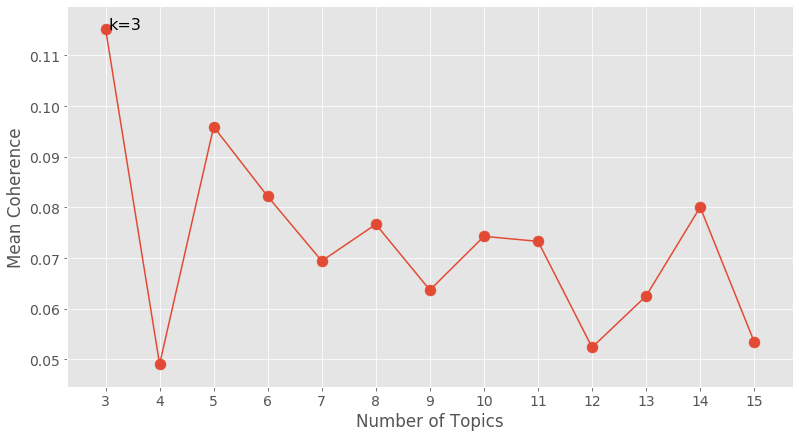

In [50]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

######**Examina el modelo final**

La gráfica anterior sugiere que el valor más apropiado para el número de temas es k = 13.

In [0]:
k = best_k
# obtener el modelo que generamos anteriormente.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2] 

Muestre los descriptores de tema para este modelo:

In [52]:
for topic_index in range(k):
  descriptor = get_descriptor( vectorizer_tfidf.get_feature_names(), H, topic_index, 10 )
  str_descriptor = ", ".join( descriptor )
  print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: teléfono, email, contener, correcto, introduce, urls, debes, pitt, formato, mail
Topic 02: año, psoe, octubre, madrid, personar, país, nacional, millón, presidente, jugar
Topic 03: garantía, anunciante, comentarios, vehículo, karma, farc, revisión, precio, concesionario, mesar


#####**Spacy coherencia LDA**

In [53]:
from itertools import combinations
#SPACY_WARNING_IGNORE="W008"
import ast 
k_values = []
coherences_sp = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( vectorizer_tfidf.get_feature_names() , H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    #print(w2v_model,term_rankings)
    coherences_sp.append( calculate_coherence_sp( term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences_sp[-1] ) )

K=03: Coherence=0.3152
K=04: Coherence=0.2493
K=05: Coherence=0.1814
K=06: Coherence=0.2324
K=07: Coherence=0.2429
K=08: Coherence=0.1963
K=09: Coherence=0.1930
K=10: Coherence=0.1929
K=11: Coherence=0.1774
K=12: Coherence=0.2092
K=13: Coherence=0.1790
K=14: Coherence=0.1897
K=15: Coherence=0.1988


######**Graficando coherencia**

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

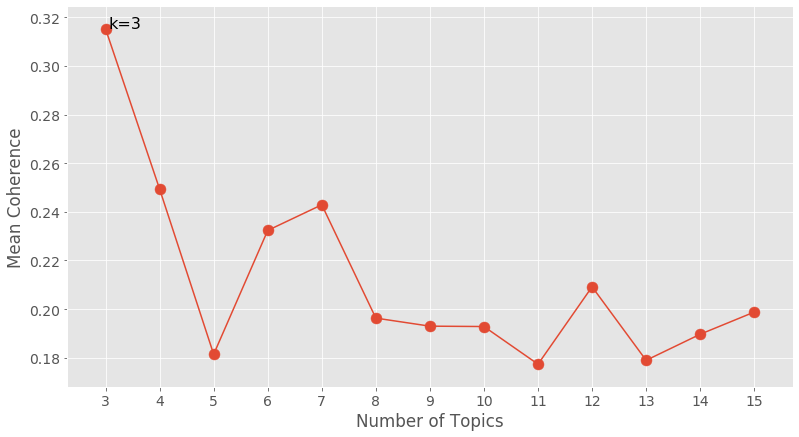

In [57]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences_sp )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences_sp, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences_sp)
xpos = coherences_sp.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

######**Examina el modelo final**


La gráfica anterior sugiere que el valor más apropiado para el número de temas es k = 9.

In [0]:
k = best_k
# obtener el modelo que generamos anteriormente.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

Muestre los descriptores de tema para este modelo:

In [59]:
for topic_index in range(k):
  descriptor = get_descriptor( vectorizer_tfidf.get_feature_names(), H, topic_index, 10 )
  str_descriptor = ", ".join( descriptor )
  print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: teléfono, email, contener, correcto, introduce, urls, debes, pitt, formato, mail
Topic 02: año, psoe, octubre, madrid, personar, país, nacional, millón, presidente, jugar
Topic 03: garantía, anunciante, comentarios, vehículo, karma, farc, revisión, precio, concesionario, mesar


#####**Word2Vect coherencia NMF**

#####**Spacy coherencia NMF**

#####**Word2Vect coherencia FA**

#####**Spacy coherencia FA**

####**Busqueda de cuadricula para encontrar el mejor mdelo y componentes**

GridSearch

In [0]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[3,4,5,6,7,10,15,20],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}

In [0]:
#INICIANDO EL MODELO
from sklearn.decomposition import LatentDirichletAllocation
ldaa= LatentDirichletAllocation()

In [0]:
from sklearn.model_selection import GridSearchCV
#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)

In [0]:
#HACER UNA BUSQUEDA DE CUADRIC
model.fit(tfidf)#bag_of_wors)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
#Mejor modelo
best_lda_model=model.best_estimator_

##### Parametros

In [0]:
Çtransform_lda

array([[0.03391356, 0.03270529, 0.03271917, 0.86795547, 0.03270651],
       [0.02167063, 0.02166995, 0.02167179, 0.91331739, 0.02167024],
       [0.02097257, 0.02100356, 0.02101198, 0.91603959, 0.0209723 ],
       ...,
       [0.02865733, 0.02865834, 0.02865716, 0.88537022, 0.02865695],
       [0.0300128 , 0.03001216, 0.03001259, 0.87994978, 0.03001266],
       [0.01503056, 0.0150586 , 0.01504025, 0.93983868, 0.0150319 ]])

Diagnosticar el rendimiento del modelo utilizando perplejidad y probabilidad de registro
**Nota:** Se prefiere un modelo con mayor probabilidad logarítmica y menor perplejidad.

In [0]:
fit_lda.perplexity(tfidf)

14230.560669422928

In [0]:
fit_lda.score(tfidf)

-68996.15925574559

##### Caracteristicas

In [0]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 3, 'n_jobs': -1}


In [0]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

Mejor puntaje de probabilidad:  -224656.09810507894


In [0]:
#Perplejidad
print("Modelo prerplejidad: ", best_lda_model.perplexity(res))

Modelo prerplejidad:  2885.2290251158224


In [0]:
best_lda_model.components_

array([[ 1.45267249, 17.7627347 ,  0.33337848, ...,  3.70795999,
        35.07058065, 12.91756151],
       [ 4.72332984, 22.53473856,  1.74441797, ...,  4.95736902,
        34.61905205,  0.41554982],
       [ 7.82399767, 15.70252673,  1.92220355, ...,  0.33467099,
        34.3103673 ,  1.66688866]])

In [0]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

[-225094.4732442678, -229327.10389854567, -233955.454418521, -238279.83217339846, -242457.3973702307, -252421.28852199978, -268685.24518733815, -281185.6493111808]


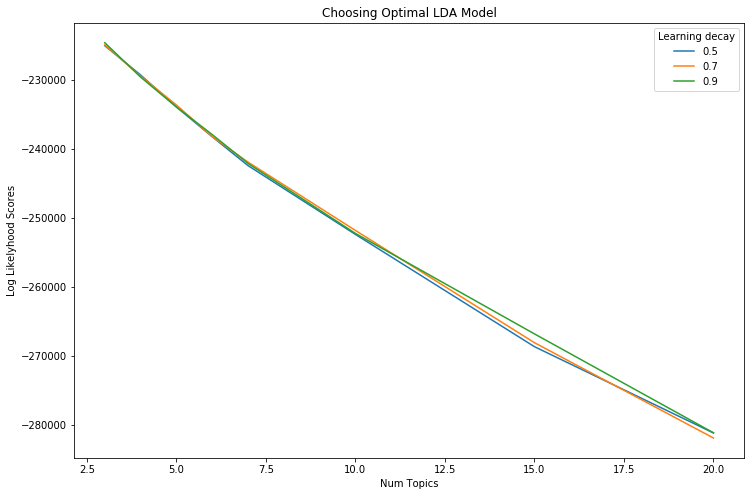

In [0]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[3,4,5,6,7,10,15,20]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


In [0]:
df_cv_results = pd.DataFrame(model.cv_results_)

In [0]:
df_cv_results.to_csv("LDAGridSearchResults.csv", header=True, index=False, encoding='utf-8')

In [0]:
import seaborn as sns

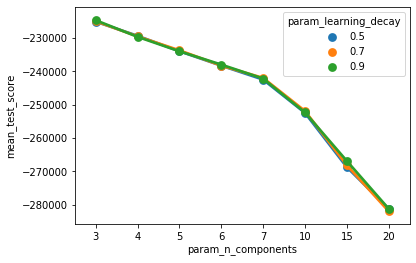

In [0]:
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results)

##### Guardar modelo

In [0]:
#Crear documentos- Matriz de temas
lda_output = best_lda_model.transform(tfidf)#bag_of_wors)#tfidf)

### **Tema dominante en el texto**

In [0]:
k = best_k
# obtener el modelo que generamos anteriormente.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2] 

In [75]:
len(H[1])

6293

In [72]:
len(W)

1000

In [0]:
#Nombre de columnas
topicnames = []
for i in range(len(H)):#best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [0]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(len(W)):
    docnames.append('Doc'+str(i))

In [0]:
import numpy as np
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(W,2),columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(transform_lda,columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(lda_output,columns=topicnames,index=docnames)

In [86]:
df_document_topic

Topic0  Topic1  Topic2
Doc0      0.06    0.06    0.88
Doc1      0.04    0.92    0.04
Doc2      0.04    0.93    0.04
Doc3      0.04    0.92    0.04
Doc4      0.84    0.08    0.08
...        ...     ...     ...
Doc995    0.04    0.92    0.04
Doc996    0.04    0.92    0.04
Doc997    0.05    0.90    0.05
Doc998    0.05    0.90    0.05
Doc999    0.03    0.94    0.03

[1000 rows x 3 columns]

In [0]:
# Obtener tema dominante para cada documento
#Guardando temas 
dominant_topic=np.argmax(df_document_topic.values,axis=1)
#Guardando probabilidad de temas
weightagt_topic=np.amax(df_document_topic.values,axis=1)
#Grabando tema dominante
df_document_topic['dominant_topic']=dominant_topic
#Guardar tema dominante en df inicial
df['dominant_topic']=dominant_topic
df['weightagt_topic']=weightagt_topic

In [88]:
df_document_topic

Topic0  Topic1  Topic2  dominant_topic
Doc0      0.06    0.06    0.88               2
Doc1      0.04    0.92    0.04               1
Doc2      0.04    0.93    0.04               1
Doc3      0.04    0.92    0.04               1
Doc4      0.84    0.08    0.08               0
...        ...     ...     ...             ...
Doc995    0.04    0.92    0.04               1
Doc996    0.04    0.92    0.04               1
Doc997    0.05    0.90    0.05               1
Doc998    0.05    0.90    0.05               1
Doc999    0.03    0.94    0.03               1

[1000 rows x 4 columns]

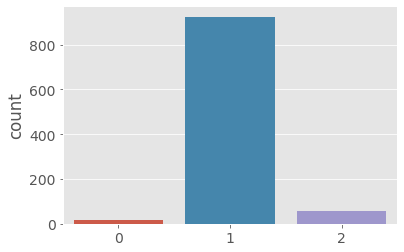

In [89]:
import seaborn as sns
sns.countplot(dominant_topic)

#### Caracteristicas

In [0]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [0]:
#Aplicando estilo
#df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
#df_document_topic=df_document_topic.style.applymap(color_green).applymap(make_bold)
df_document_topic

Topic0  Topic1  Topic2  dominant_topic
Doc0      0.06    0.89    0.06               1
Doc1      0.04    0.93    0.04               1
Doc2      0.04    0.93    0.04               1
Doc3      0.20    0.76    0.04               1
Doc4      0.08    0.08    0.83               2
...        ...     ...     ...             ...
Doc995    0.04    0.92    0.04               1
Doc996    0.04    0.92    0.04               1
Doc997    0.05    0.90    0.05               1
Doc998    0.05    0.90    0.05               1
Doc999    0.03    0.95    0.03               1

[1000 rows x 4 columns]

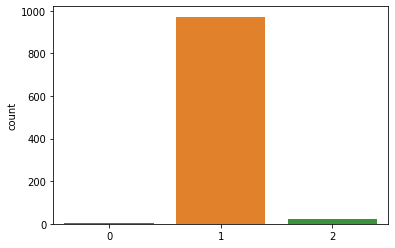

In [0]:
import seaborn as sns
sns.countplot(dominant_topic)

## Visualizacion de datos

### Obtenga las palabras clave de cada tema (Opcion)

In [90]:
H.shape

(3, 6293)

In [91]:
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(H)

# assign column and index
df_topic_keywords.columns = vectorizer_tfidf.get_feature_names()
df_topic_keywords.index = topicnames


# check the head
df_topic_keywords.iloc[:,:10]

abajar  abandonar   abarcar  ...  abiertamente   abierto    abocar
Topic0  0.335093   0.334860  0.334923  ...      0.334493  0.336348  0.334471
Topic1  1.352598   3.118071  0.691386  ...      0.525733  1.120519  0.621384
Topic2  0.338564   0.338900  0.334848  ...      0.334359  0.520453  0.334284

[3 rows x 10 columns]

15 palabrasclaves del tema

In [0]:
# Mostrat las top n palabras por topico
def show_topics(vectorizer=vectorizer_tfidf, component=H, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in component:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [0]:
topic_keywords = show_topics(vectorizer_tfidf, H, 10)

In [95]:
topic_keywords

[array(['teléfono', 'email', 'contener', 'correcto', 'introduce', 'urls',
        'debes', 'pitt', 'formato', 'mail'], dtype='<U18'),
 array(['año', 'psoe', 'octubre', 'madrid', 'personar', 'país', 'nacional',
        'millón', 'presidente', 'jugar'], dtype='<U18'),
 array(['garantía', 'anunciante', 'comentarios', 'vehículo', 'karma',
        'farc', 'revisión', 'precio', 'concesionario', 'mesar'],
       dtype='<U18')]

In [96]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0      Word 1       Word 2  ...  Word 7         Word 8 Word 9
Topic 0  teléfono       email     contener  ...    pitt        formato   mail
Topic 1       año        psoe      octubre  ...  millón     presidente  jugar
Topic 2  garantía  anunciante  comentarios  ...  precio  concesionario  mesar

[3 rows x 10 columns]

### Distribución de frecuencia de conteos de palabras en documentos
Al trabajar con una gran cantidad de documentos, desea saber qué tan grandes son los documentos en su conjunto y por tema. Tracemos la distribución de los recuentos de palabras del documento.



In [0]:
import matplotlib.pyplot as plt

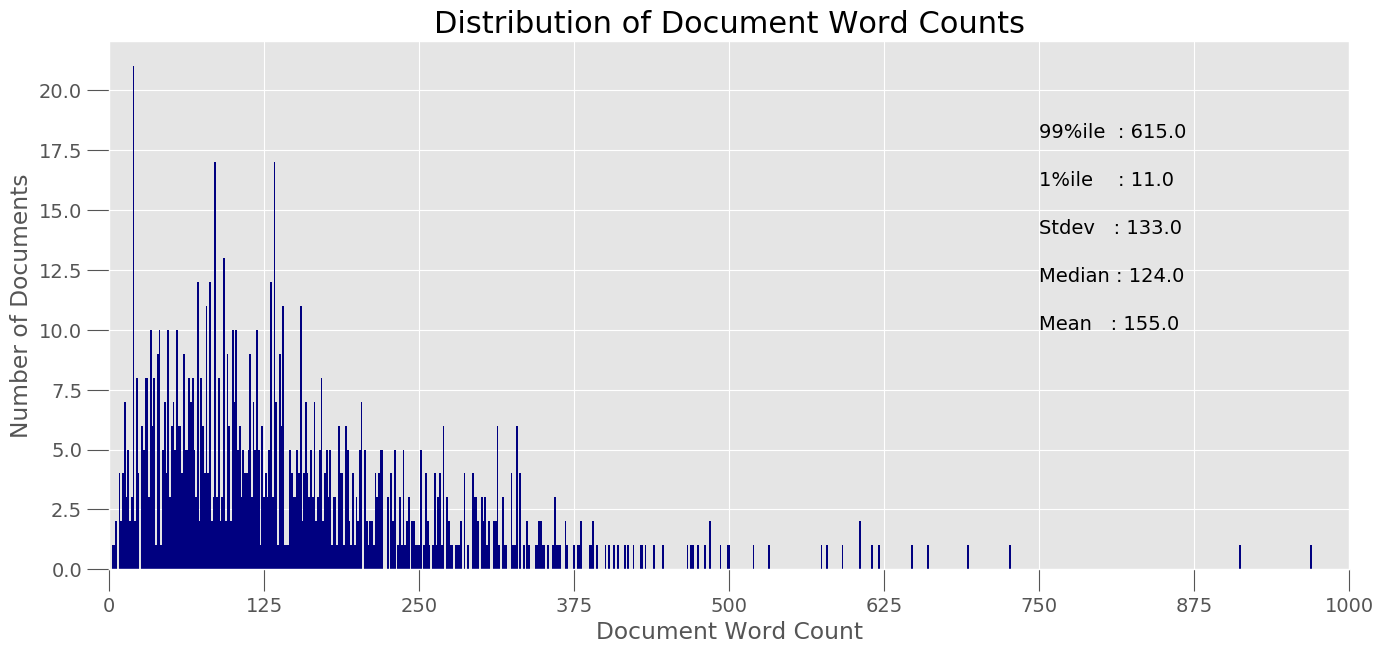

In [98]:
doc_lens = [len(d) for d in df.text]

# Plot
plt.figure(figsize=(16,7), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 10, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  12, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  14, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  16, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  18, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [99]:
df.loc[df.dominant_topic == 0, :]

News  ... weightagt_topic
4    La pregunta no puede contener URLs Tu nombre T...  ...            0.84
33   La pregunta no puede contener URLs Tu nombre T...  ...            0.84
149  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
413  és Yoshinori Ohsumi ha ganado el Premio Nobel ...  ...            0.59
518  Tweet Miembro de: \nEl uso de este sitio web i...  ...            0.54
552  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
575  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
700  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
705  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
716  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
727  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
738  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
741  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
748  Anuncio del Ayuntamiento de Mataró de formaliz...  ...            0.51
755  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
761  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
763  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
850  La pregunta no puede contener URLs Tu nombre T...  ...            0.84
986  CIENCIA Nobel de Física para tres científicos ...  ...            0.53

[19 rows x 4 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


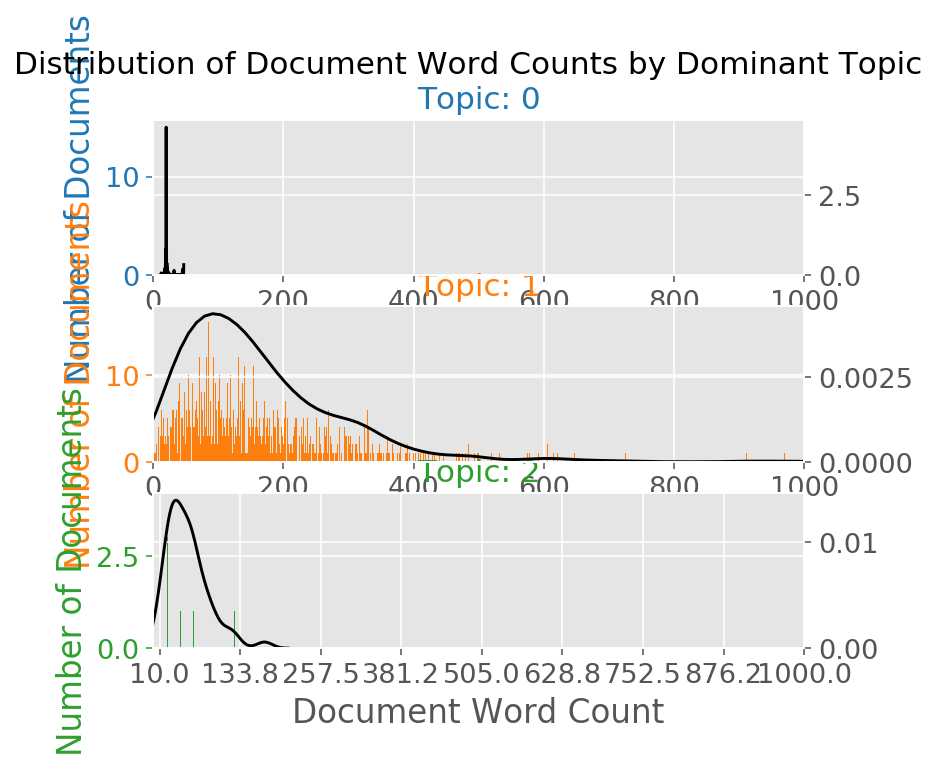

In [100]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,1,figsize=(6,5), dpi=140)

for i, ax in enumerate(axes.flatten()):   
  #Identificando palabras temas en dataset 
  df_dominant_topic_sub = df.loc[df.dominant_topic == i, :]
  #Contando datos por tema
  doc_lens = [len(d) for d in df_dominant_topic_sub.text]
  ax.hist(doc_lens, bins = 1000, color=cols[i])
  ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
  ax.set(xlim=(0, 1000), xlabel='Document Word Count')
  ax.set_ylabel('Number of Documents', color=cols[i])
  ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout(h_pad=10,w_pad=10)
#fig.subplots_adjust(hspace=10,wspace=5)
plt.xticks(np.linspace(10,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=16)
plt.show()

### Nubes de palabras de las palabras clave N principales en cada tema
Aunque ya ha visto cuáles son las palabras clave del tema en cada tema, una nube de palabras con el tamaño de las palabras proporcional al peso es una vista agradable. La coloración de los temas que he tomado aquí también se sigue en las tramas posteriores.

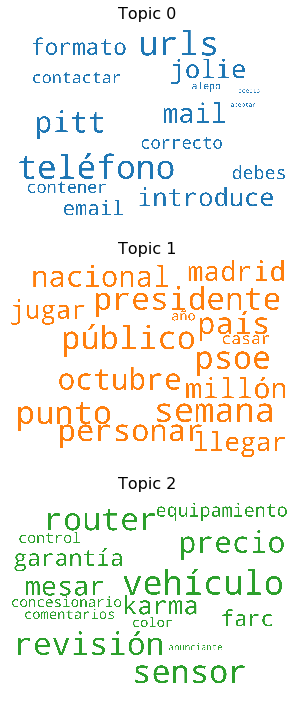

In [101]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
n_topic=15
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=nlp.Defaults.stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=n_topic,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)



fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)

#words
keywords = np.array(vectorizer_tfidf.get_feature_names())

#Palabras mas frecuentes por topico
top =[(-topic_weights).argsort()[:n_topic] for topic_weights in H]

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  #Crear diccionario con palabras frecuentes
  dictWords = {keywords.take(x):x for x in top[i]}
  #Crear diccionario de palabras
  cloud.generate_from_frequencies(dictWords, max_font_size=300,)
  #Maquetar graficos de nube
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###Recuentos de palabras de palabras clave de tema
Cuando se trata de las palabras clave en los temas, la importancia (peso) de las palabras clave es importante. Junto con eso, también es interesante observar con qué frecuencia han aparecido las palabras en los documentos.

Tracemos los recuentos de palabras y los pesos de cada palabra clave en el mismo gráfico.

Desea estar atento a las palabras que ocurren en múltiples temas y aquellas cuya frecuencia relativa es más que el peso. A menudo, tales palabras resultan ser menos importantes. El cuadro que he dibujado a continuación es el resultado de agregar varias de esas palabras a la lista de palabras de detención al principio y volver a ejecutar el proceso de capacitación.

In [0]:
#10 Palabras por topico en orden de relevancia 
top =[(-topic_weights).argsort()[:10] for topic_weights in H]
#print(top)
#Palabras en orden de relevancia
todo =[(-topic_weights).argsort() for topic_weights in H]
#print(len(todo[0]))
#words
keywords = np.array(vectorizer_tfidf.get_feature_names())
#print(keywords)

In [0]:
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(H)

# asignando columnas e indices
df_topic_keywords.columns = vectorizer_tfidf.get_feature_names()
df_topic_keywords.index = topicnames

In [104]:
from itertools import groupby

words_text = df['text']
print('help')
out = []
weight=[]


for i in range(len(top)):
  words=[x for x in top[i]]
  all_words=[x for x in todo[i]]
  #print(all_words)
  dictWords = {keywords.take(x):x for x in top[i]}
  valores =[y for y in dictWords.values()]
  for x in range(len(valores)):
    #out.append([,i,])
    #print(valores[x])
    word = list(dictWords.keys())[list(dictWords.values()).index(valores[x])]
    word_count = all_words.count(valores[x])
    #weight = df_topic_keywords[key_list[val_list.index(valores[x])]]
    weight = df_topic_keywords[list(dictWords.keys())[list(dictWords.values()).index(valores[x])]]
    total_words = [w.count(word) for w in df['text']]
    total_words = sum(total_words)
    out.append([word,i,weight[i],total_words])
  #print(la)
  #print(key_list[val_list.index(valores[x])]) #palabras
  #print(valores[x]) #Id de palabra
  #print(all_words.count(valores[x])) #frecuencia
#out

help


In [105]:
df_date_top_words = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
df_date_top_words

word  topic_id  importance  word_count
0        teléfono         0   10.198425          91
1           email         0    8.370107          50
2        contener         0    6.165414         200
3        correcto         0    5.586159          38
4       introduce         0    3.096773          17
5            urls         0    3.088680          15
6           debes         0    3.088680          15
7            pitt         0    2.931444          30
8         formato         0    2.882218          27
9            mail         0    2.799265          34
10            año         1   21.625677         996
11           psoe         1   13.465436         269
12        octubre         1   13.389055         336
13         madrid         1   13.296915         300
14       personar         1   12.431762         398
15           país         1   12.183127         423
16       nacional         1   11.807701         354
17         millón         1   11.766403         326
18     presidente         1   11.707229         329
19          jugar         1   11.435605         268
20       garantía         2    5.567635          54
21     anunciante         2    4.827026          36
22    comentarios         2    4.675521          47
23       vehículo         2    4.070848          92
24          karma         2    3.209146          15
25           farc         2    3.139536          99
26       revisión         2    3.121638          42
27         precio         2    2.963652          72
28  concesionario         2    2.884468          22
29          mesar         2    2.700046         215

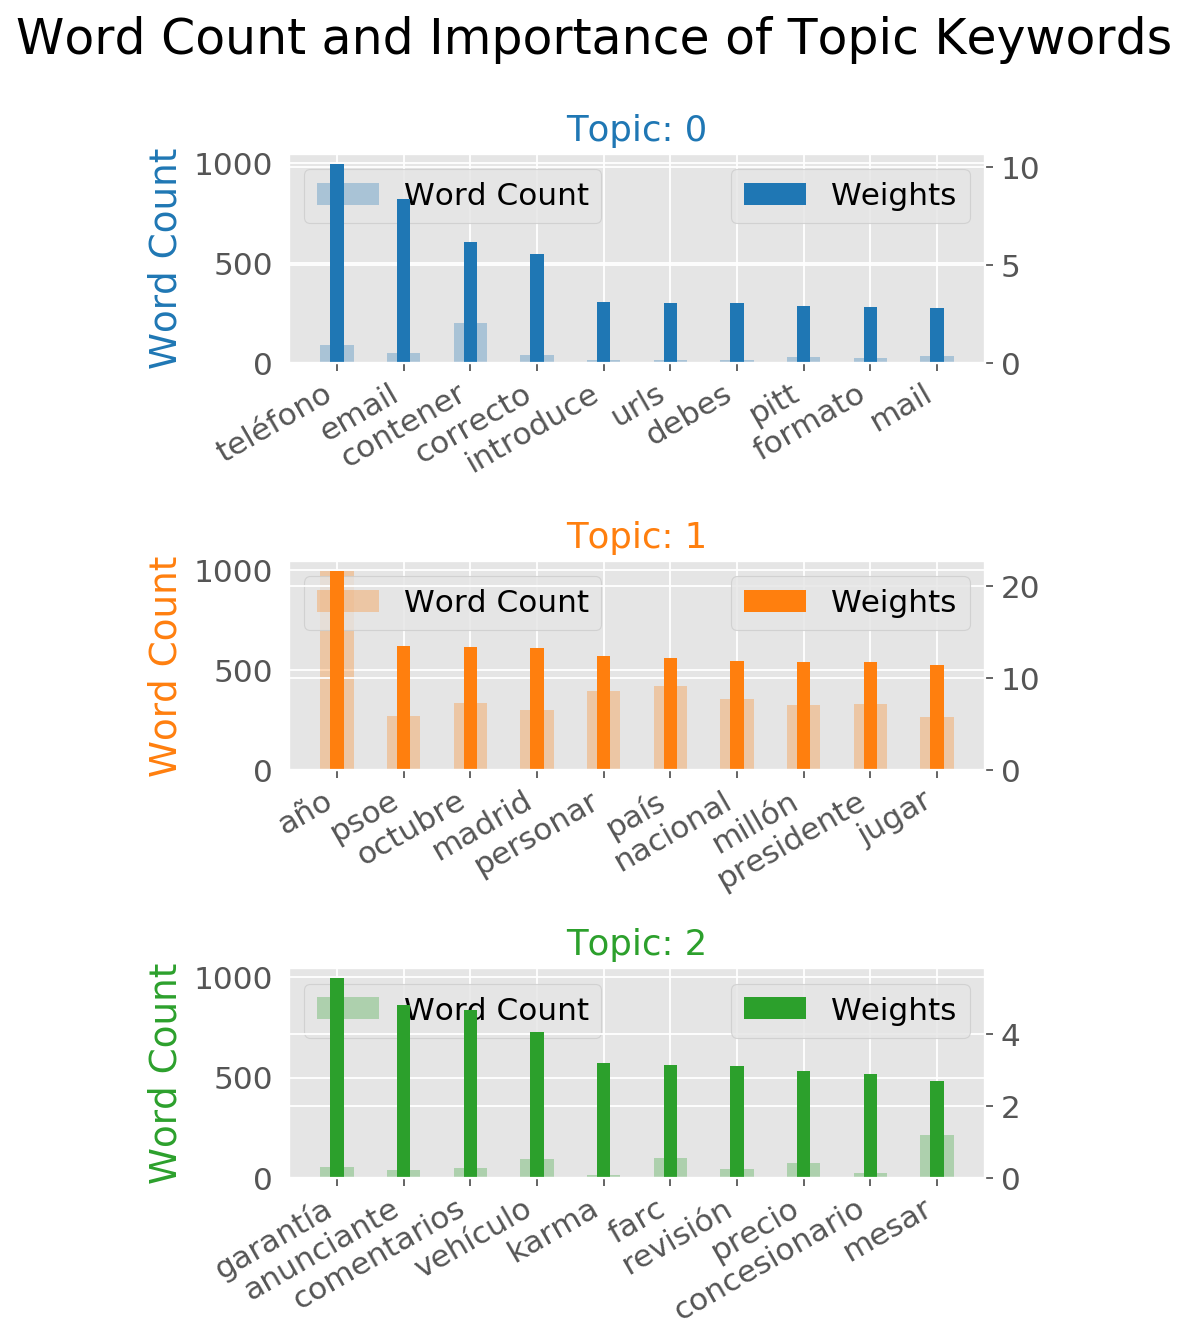

In [106]:
from collections import Counter
#topics = len(todo)
#Palabras por topico
#top =[(-topic_weights).argsort() for topic_weights in best_lda_model.components_]

#data_flat = [w for w_list in data_ready for w in w_list]
#counter = Counter(data_flat)


df_date_top_words = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
df_date_top_words
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(6,8), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_date_top_words.loc[df_date_top_words.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_date_top_words.loc[df_date_top_words.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0,100000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    
    ax.set_xticklabels(df_date_top_words.loc[df_date_top_words.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Cuadro de oraciones coloreado por tema
Cada palabra en el documento es representativa de uno de los 4 temas. Vamos a colorear cada palabra en los documentos dados por la identificación del tema al que se le atribuye.
El color del rectángulo adjunto es el tema asignado al documento.

In [0]:
#Guardando las palabras con su topico
words_topic=[]
#Recorre los topicos del dataframe
for i in range(len(df_date_top_words['topic_id'].unique())):
  #Recorre las palabras del dataframe
  for j in range(len(df_date_top_words['word'])):
    #Busca coincidencias entre los topicos y el dataframe
    if df_date_top_words['topic_id'][j] == i:
      #Guarda Las palabras dominantes en el texto con su respectivo topico
      words_topic.append([i,df_date_top_words['word'][j]])

In [0]:
#Buscar el top de palabras en el texto y las almacena por topico
def palabras(topic=0,numero=1):
  #Busca un texto en especifico del dataframe
  textos = df['text'][numero]
  #variable para almacenar los resultados de la busqueda
  ar = []
  #Recorre las palabras del texto indicado
  for y in range(len(textos)):
    #recorre las palabras principales del texto
    for j,k in words_topic:
      #Comprueba que exista la palabra
      if k == textos[y]:
        #Guardando la palabra encontrada con su topico
        ar.append([textos[y],j])
  return ar

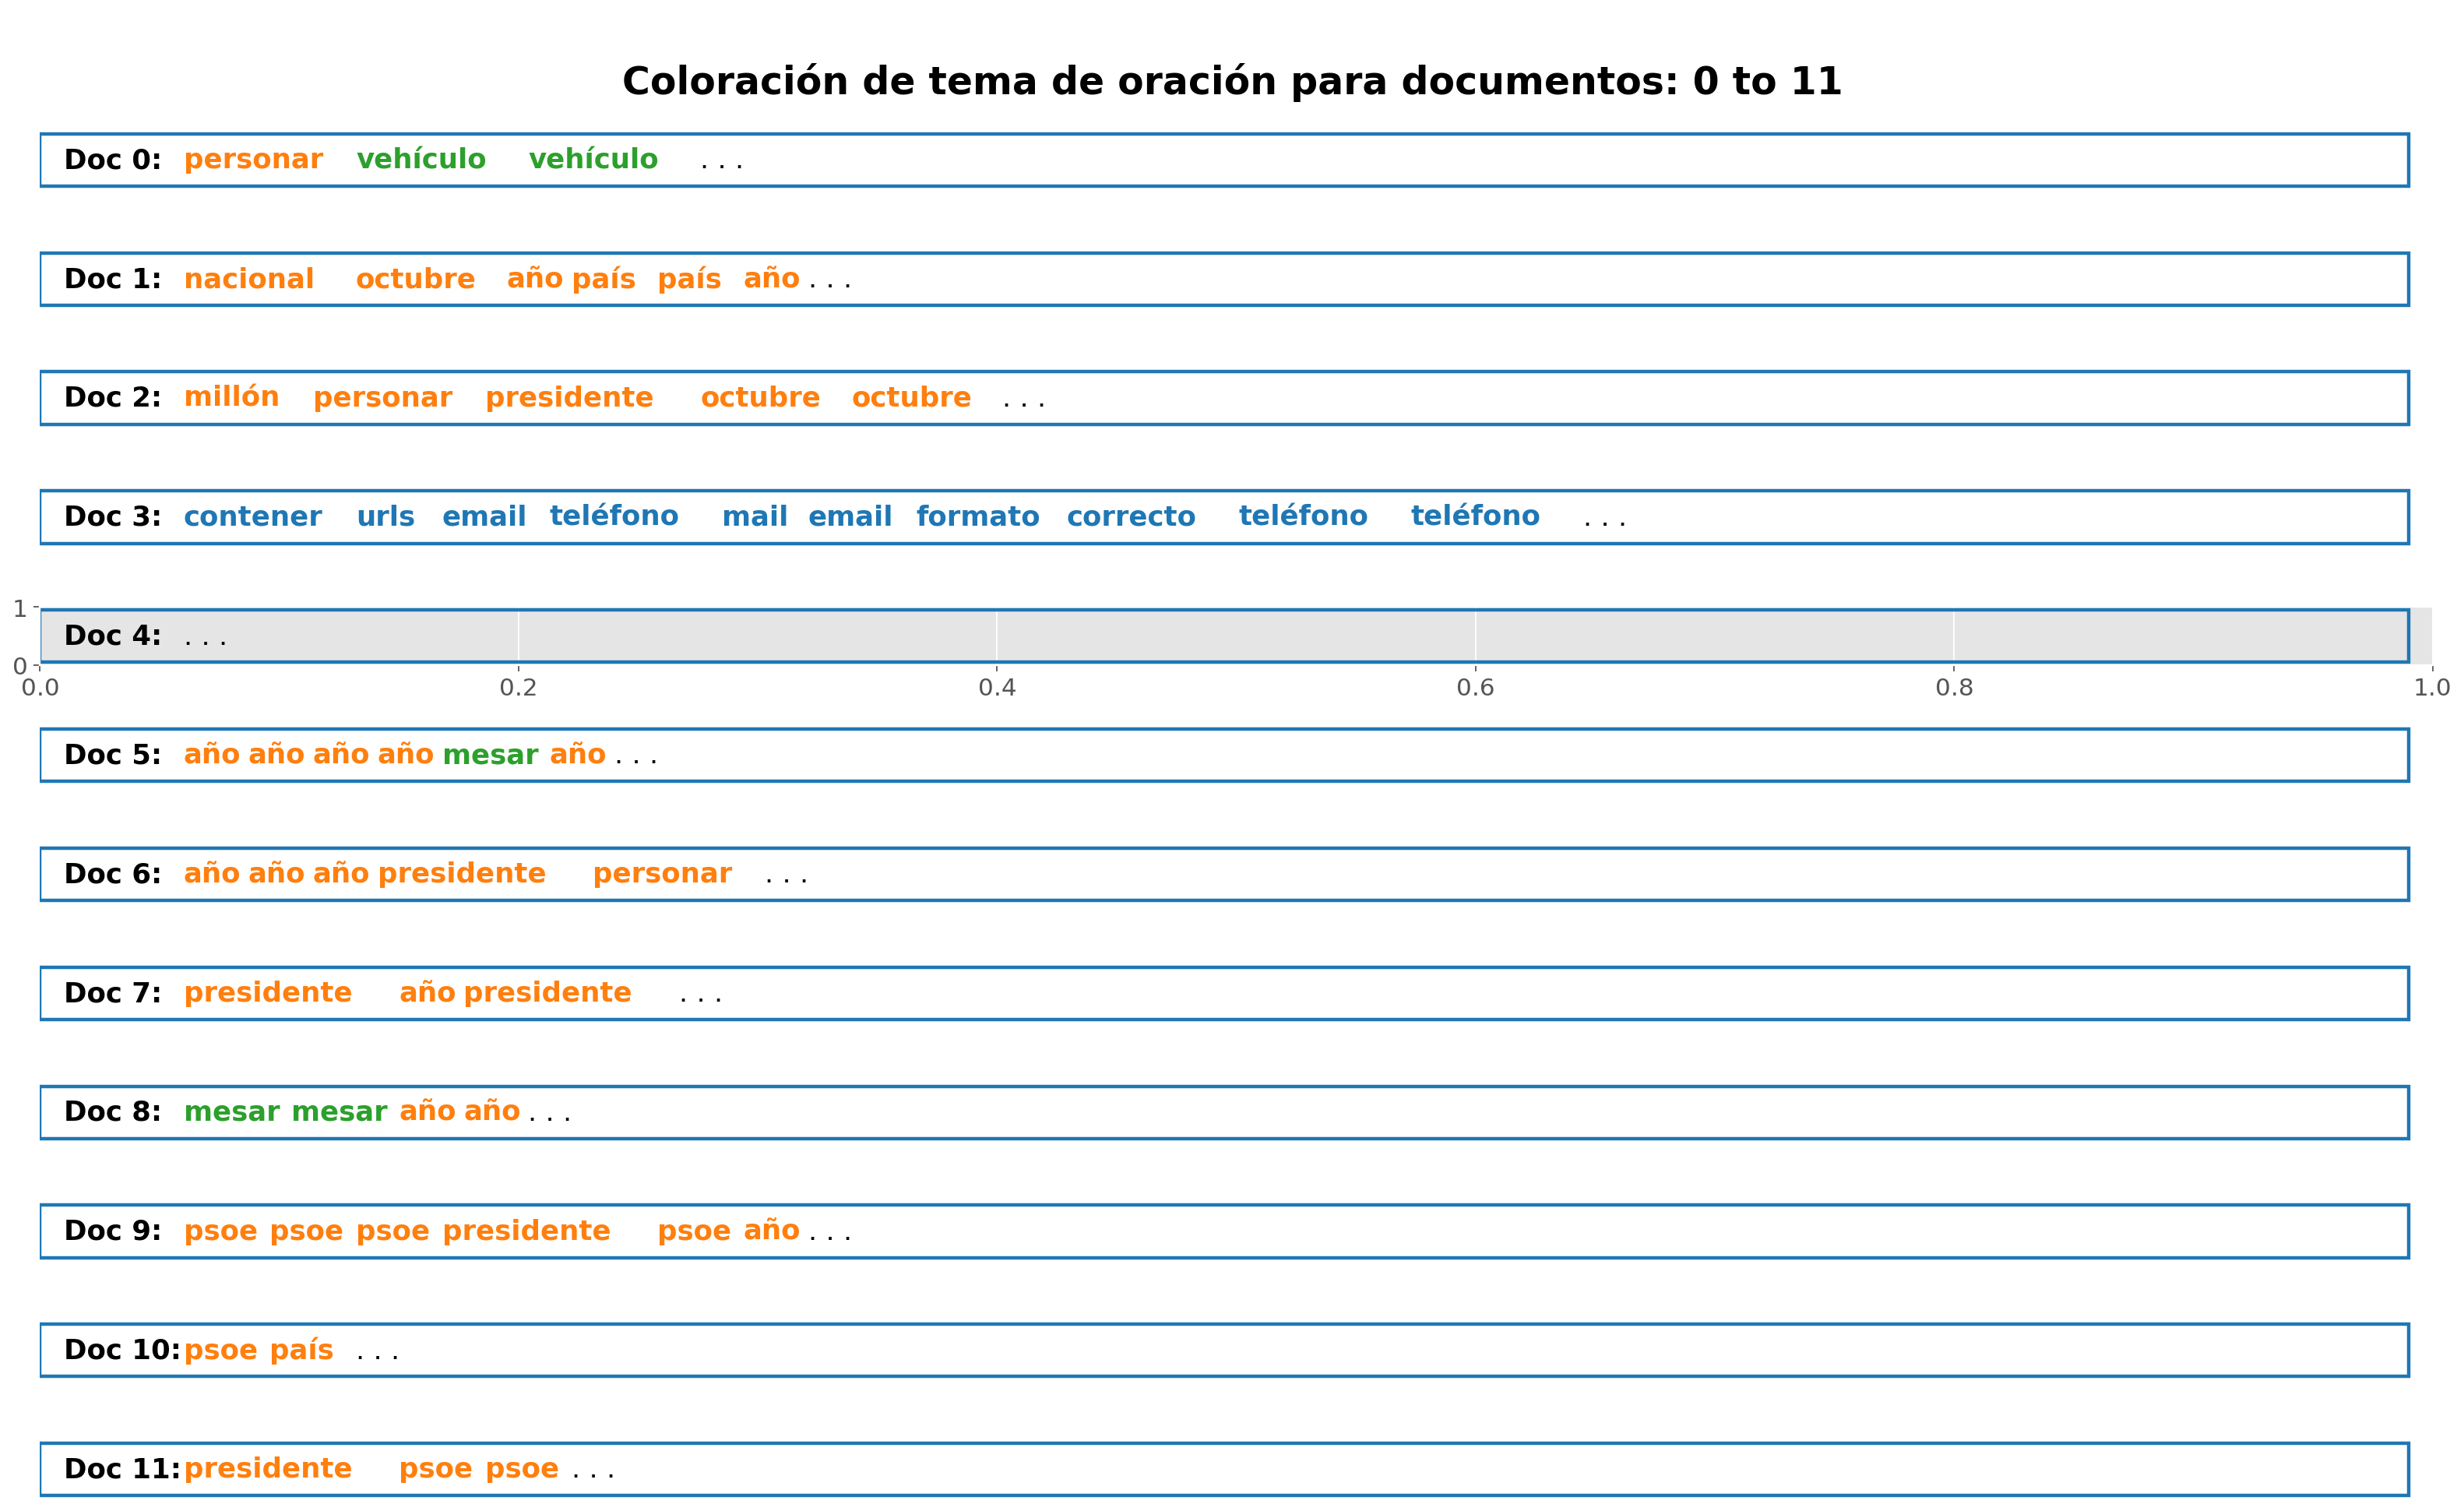

In [110]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle
#topicos = len(df_date_top_words['topic_id'].unique())
#inicio y fin de los graficos
end = 13
start = 0
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
axes[0].axis('off')
#Recorre los sublots
for i,ax in enumerate(axes):
  if i > 0:
    #Diccionario con los terminos mas relevantes de cada tema
    dictWords = {keywords.take(x):x for x in top[0]}
    #Palabraas dominantes en el tema
    word_dominanttopic = palabras(numero=i)
    ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
            fontsize=16, color='black', transform=ax.transAxes, fontweight=700)
    #almacena LAS probabilidades de los topicos en orden decendente
    topic_percs_sorted = sorted(W, key=lambda x: (x[1]), reverse=True)
    ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                          color=mycolors[int(topic_percs_sorted[0][0])], linewidth=2))
    word_pos = 0.06
    #Recoore las palabras dominantes en el texto buscando coincidencias
    for j,(word,topic) in enumerate(word_dominanttopic):
      #Indica el limite de palabras a mostrar
      if j < 10:
        ax.text(word_pos, 0.5, 
                word,horizontalalignment='left',
                verticalalignment='center',
                fontsize=16, color=mycolors[topic],
                transform=ax.transAxes, fontweight=700)
        #mueve la palabra a la siguiente iteracion
        word_pos += .009 * len(word) 
        ax.axis('off')

    ax.text(word_pos, 0.5, '. . .',
            horizontalalignment='left',
            verticalalignment='center',
            fontsize=16, color='black',
            transform=ax.transAxes) 

plt.subplots_adjust(wspace=0, hspace=0)
plt.suptitle('Coloración de tema de oración para documentos: ' + str(0) + ' to ' + str(13-2), fontsize=22, y=0.95, fontweight=700)
plt.tight_layout()
plt.show()

In [113]:
print(df['News'][10])

- PUBLICIDAD - 
Sumelzo denuncia que el PSOE aragonés ha iniciado una campaña contra ella La diputada y secretaria de Administraciones Públicas del PSOE, Susana Sumelzo, ha denunciado hoy, en una carta dirigida a sus compañeros del partido en Aragón, que desde esta federación se ha iniciado una campaña en su contra después de que decidiera no dimitir de la Ejecutiva Federal. En la carta, que Sumelzo ha publicado en su perfil de Facebook, afirma que dicha conspiración se habría gestado en una cena promovida por el portavoz socialista en el Ayuntamiento de Zaragoza, Carlos Perez Anadón, uno de los 17 miembros de la Ejecutiva que ha dimitido, y a la que habrían asistido compañeros de Zaragoza. Sumelzo enfatiza que "jamás" ha sido desleal con el secretario general del PSOE en Aragón, Javier Lambán, aunque reconoce que en alguna ocasión ha expresado una opinión política diferente a la del presidente autonómico. "He trabajado con todos vosotros mano a mano y siempre llevando como bandera a J

### ¿Cuáles son los temas más discutidos en los documentos?
Calculemos el número total de documentos atribuidos a cada tema.

In [114]:
df.head(4)

News  ... weightagt_topic
0  Garantía 12 meses  Comentarios del anunciante ...  ...            0.88
1  Cinco militares mexicanos murieron y 10 result...  ...            0.92
2  EL NACIONAL WEB 1 de octubre 2016 - 03:58 pm L...  ...            0.93
3  ACTUALIZA 3-Clinton busca mantener a Trump a l...  ...            0.92

[4 rows x 4 columns]

In [115]:
# Distribución de temas dominantes en cada documento
dominant_topic_in_each_doc = df.groupby('dominant_topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='cuenta').reset_index()
df_dominant_topic_in_each_doc

dominant_topic  cuenta
0               0      19
1               1     925
2               2      56

Distribución total del tema por peso real

In [116]:
# Auxiliar para almacenar los pesos
weightagt=[]
#Recorrer los topicos
for i in range(len(df.dominant_topic.unique())):
  #Suma los pesos ganadores por topico
  aux = df.loc[df.dominant_topic==i,:]
  #Almacenar suma de pesos
  weightagt.append([i,aux.weightagt_topic.sum()])
#Guardar resultado de pesos en dataframe
df_weightagt_topic = pd.DataFrame(weightagt,columns=['dominant_topic','suma'])
df_weightagt_topic

dominant_topic    suma
0               0   14.77
1               1  828.24
2               2   43.17

Las 3 palabras clave principales para cada tema

In [117]:
#Variable con las 3 id de palabras clave de cara tema 
top3 =[(-topic_weights).argsort()[:3] for topic_weights in H]
#Auxiliar para guardar las palabras con su topico
valores3=[]
#recorre los topicos con el id de la palabra
for i in range(len(top3)):
  #Diccionario con el id y la palabra
  dictWords3 = {keywords.take(x):x for x in top3[i]}
  #Recorre el diccionario en busqueda de la palabra
  for y in dictWords3.keys():
    #Guarda la palabra coon su topico
    valores3.append([i,y])


  
df_top3words_stacked = pd.DataFrame(valores3, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
df_top3words

topic_id                                  words
0         0          teléfono, \nemail, \ncontener
1         1                 año, \npsoe, \noctubre
2         2  garantía, \nanunciante, \ncomentarios

Hagamos dos tramas:

1.  El número de documentos para cada tema asignando el documento al tema que tiene más peso en ese documento.
2.  El número de documentos para cada tema al resumir la contribución de peso real de cada tema a los documentos respectivos.

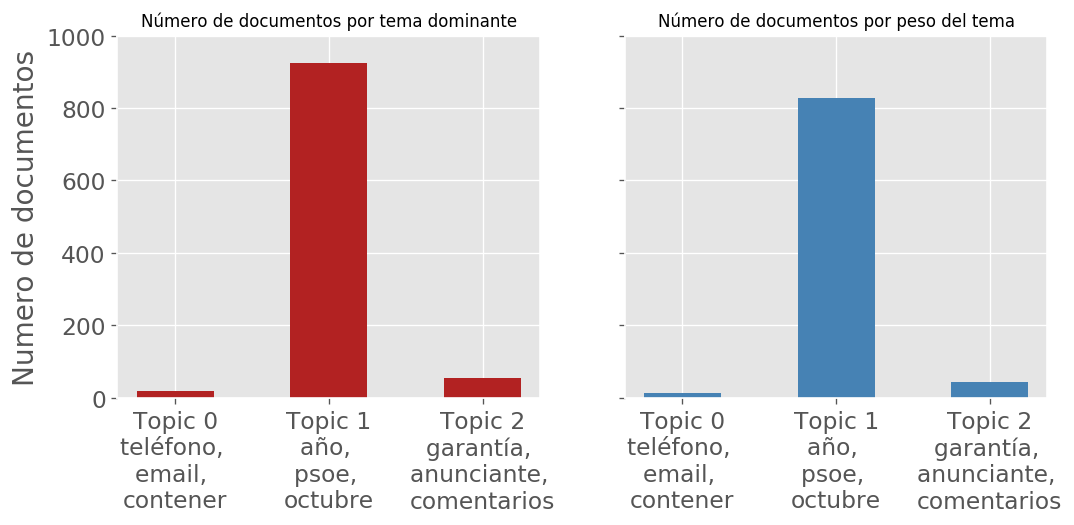

In [118]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='dominant_topic', height='cuenta', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.dominant_topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Número de documentos por tema dominante', fontdict=dict(size=10))
ax1.set_ylabel('Numero de documentos')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='dominant_topic', height='suma', data=df_weightagt_topic, width=.5, color='steelblue')
ax2.set_xticks(range(df_weightagt_topic.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Número de documentos por peso del tema', fontdict=dict(size=10))

plt.show()

# Visualizacion de Clusters

In [0]:
#Topicos
topics = ['Topico '+str(i) for i in range(len(df.dominant_topic.unique()))]
# Matriz de pesos de temas
df_W = pd.DataFrame(W,columns=topics)

#Mantenga los puntos bien separados (opcional)
#df_lda = df_lda[np.amax(df_lda, axis=1) > 0.35]

#df_document_topic=pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=docnames)

#Número de tema dominante en cada documento
topic_num = np.argmax(df_W.values, axis=1)

#Dataframe auxiliar con topico
#df_lda2 = df_lda
df_W['dominant_topic']=topic_num

In [0]:
#Palabra mas representativa de cada documento
#Variable para almacenr el indice de la palabra mas reprecentativa de cada texto
word_relevant=[]
#Recorrer vector que contiene el peso de cada palabra
for x in bag_of_wors_idf:
  #Almacenar la palabra con mas peso
  word_relevant.append(x.argmax())
#Variable para almacenar la palabra mas representativa
labeles=[]
#Recorriendo los indices mas reprecentativos
for x in word_relevant:
  #Capturando la palabra con el indice y almacenandolas en la variable labeles
  labeles.append(vectorizer_tfidf.get_feature_names()[x])

In [133]:
df.head(1)

News  ... weightagt_topic
0  Garantía 12 meses  Comentarios del anunciante ...  ...            0.88

[1 rows x 4 columns]

In [0]:
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

colores_cluster = []
for x in range(len(df['dominant_topic'])):#topic_num:
  colores_cluster.append(cols[df.dominant_topic[x]])

## Visualizacion de clusters (seaborn - https://seaborn.pydata.org/generated/seaborn.pairplot.html)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


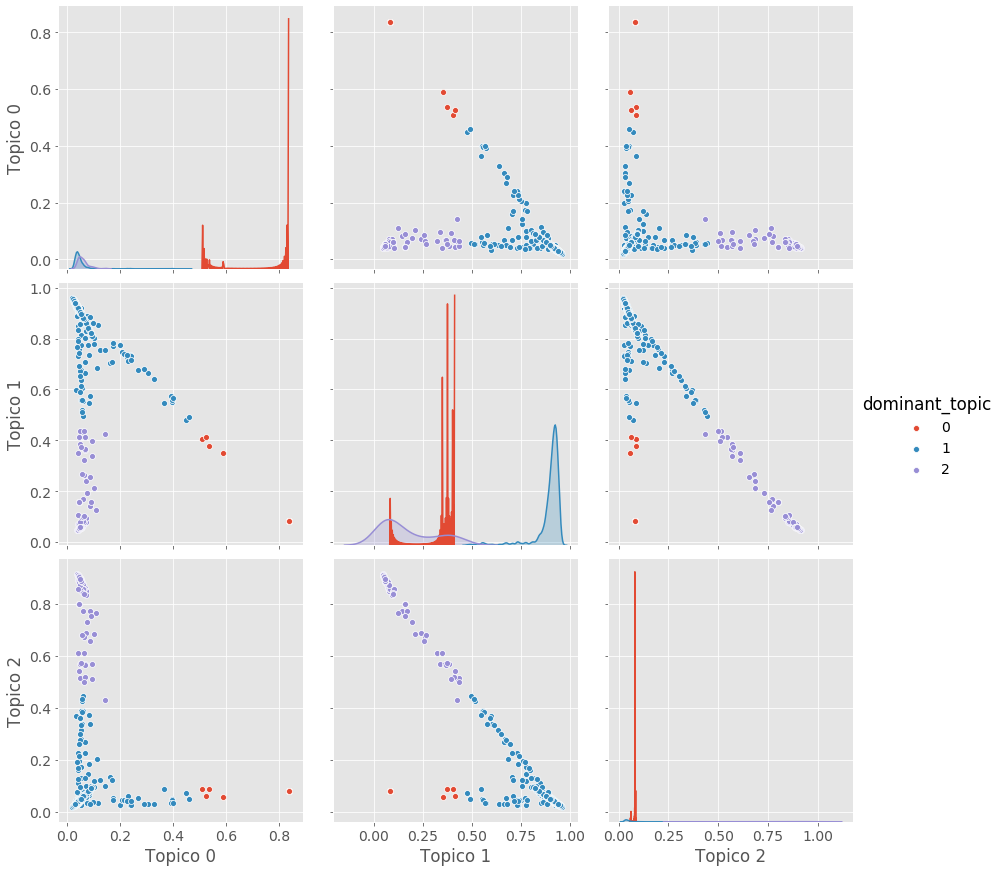

In [151]:
import seaborn as sb
sb.pairplot(df_W, hue='dominant_topic',size=4,vars=topics,kind='scatter')

## SOM (somoclu - https://somoclu.readthedocs.io/en/stable/example.html)

In [119]:
!pip install somoclu

     |████████████████████████████████| 6.2MB 2.8MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=419181 sha256=4ce1e30b506feecae0b97d08c4db6673fd50ca2e567672bff5c8f25856fdd6ea
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
import somoclu

### Mapas planos 
Capacitamos a Somoclu con la configuración de parámetros predeterminada, solicitando un mapa grande que califique como un mapa emergente de autoorganización para estos datos:

In [121]:
n_columns=300
n_rows=350
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(W)

CPU times: user 5min 17s, sys: 334 ms, total: 5min 17s
Wall time: 2min 40s


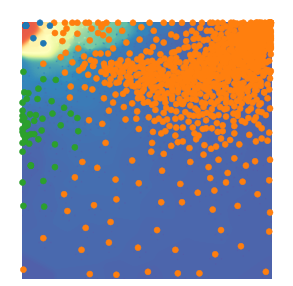

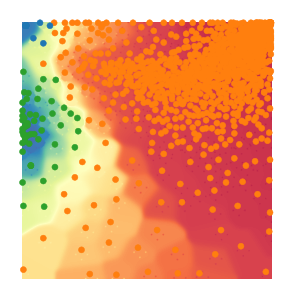

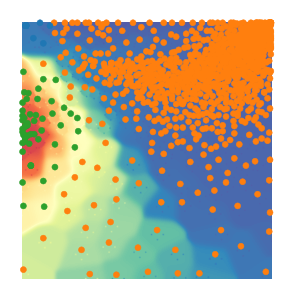

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [132]:
som.view_component_planes(figsize=(5,5),bestmatches=True,bestmatchcolors=colores_cluster)

Podemos trazar la matriz U, junto con las mejores unidades coincidentes para cada punto de datos. Codificamos por color las unidades con las clases de los puntos de datos y también agregamos las etiquetas de los puntos de datos.

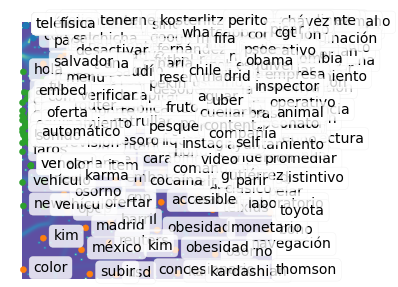

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [135]:
som.view_umatrix(bestmatches=True,figsize=(5,5),bestmatchcolors=colores_cluster,labels=labeles) #bestmatchcolors=colors,

También podemos acercarnos a una región de interés, por ejemplo, la densa esquina superior derecha:

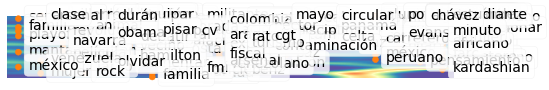

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [138]:
import matplotlib
som.view_umatrix(bestmatches=True, bestmatchcolors=colores_cluster, labels=labeles,
                 zoom=((0, 50), (280, n_columns)))


### Topología toroidal, rejilla hexagonal 
Podemos repetir lo anterior con una topología toroidal especificando el tipo de mapa de la siguiente manera:

In [139]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(W)

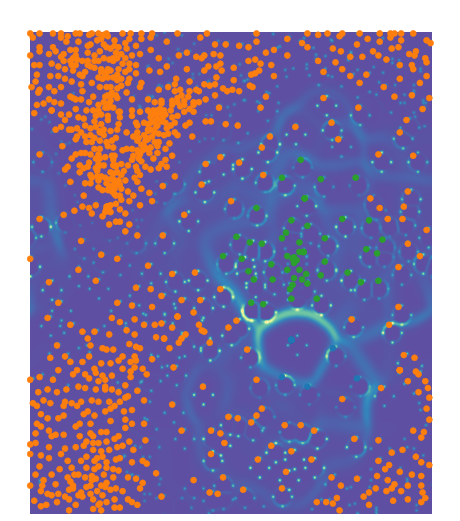

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [140]:
som.view_umatrix(bestmatches=True,bestmatchcolors=colores_cluster)

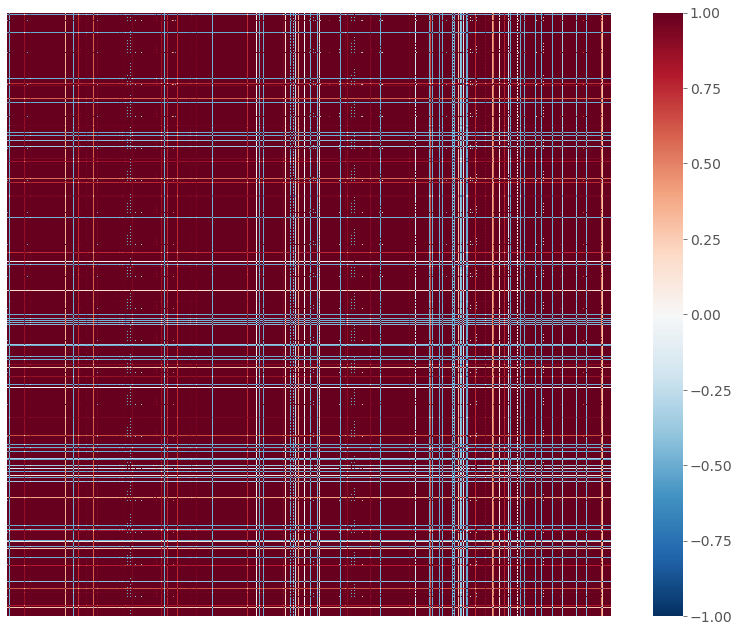

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [141]:
som.view_similarity_matrix(W)

Observe cómo los bordes del mapa se conectan al otro lado. Las neuronas hexagonales también se implementan:

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal",
                      compactsupport=False)
som.train(lda_output)

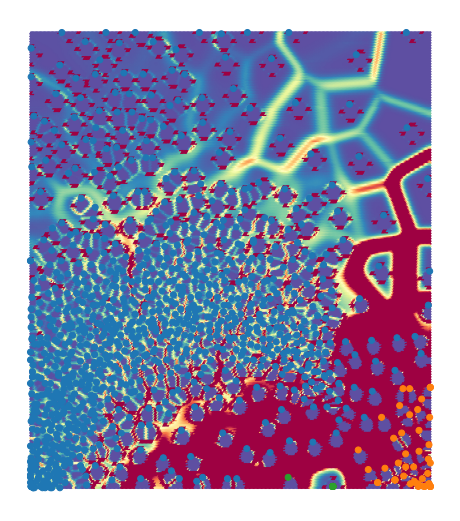

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True,bestmatchcolors=colores_cluster)

La separación de los puntos individuales está más marcada con estas neuronas.

### Inicialización con análisis de componentes principales y agrupamiento de resultados 
Podemos pasar un libro de códigos inicial de nuestra elección, pero también podemos pedirle a Somoclu que inicialice el libro de códigos con vectores del subespacio abarcados por los dos primeros valores propios de la matriz de correlación. Para hacer esto, necesitamos pasar un argumento opcional al constructor:

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(lda_output)

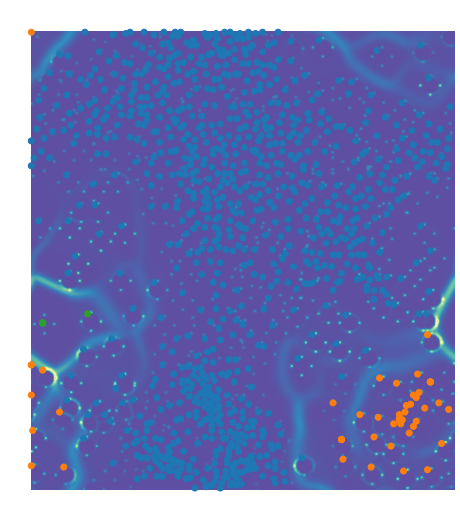

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colores_cluster)

Si bien uno esperaría resultados completamente deterministas en ejecuciones repetidas con la inicialización basada en PCA, este no es el caso. El orden en que llegan las instancias de datos es importante: dado que Somoclu usa múltiples núcleos, no hay control sobre el orden de cada lote, por lo tanto, los mapas mostrarán una pequeña variación incluso con una inicialización de PCA.

También podemos postprocesar el libro de códigos con un algoritmo de agrupamiento arbitrario que se incluye en scikit-learn . El algoritmo predeterminado es K-means con ocho grupos. Después de la agrupación, las etiquetas para cada nodo están disponibles en el objeto SOM en la clustersvariable de clase. Si no pasamos colores a las funciones de visualización de la matriz y el agrupamiento ya está hecho, las rutinas de trazado colorean automáticamente las mejores unidades de coincidencia de acuerdo con la estructura de agrupamiento

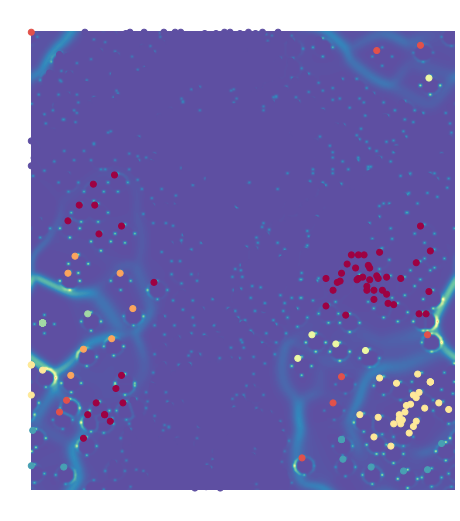

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.cluster()
som.view_umatrix(bestmatches=True)

Por supuesto, podemos elegir otro algoritmo de agrupación, pero los métodos de agrupación topológica tendrán poco sentido con su parametrización predeterminada. DBSCAN, por ejemplo, asignará la misma clase a todos los nodos:

In [0]:
#from sklearn.cluster import DBSCAN


In [0]:
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

### Inicialización con análisis de componentes principales y agrupamiento de resultados
Podemos pasar un libro de códigos inicial de nuestra elección, pero también podemos pedirle a Somoclu que inicialice el libro de códigos con vectores del subespacio abarcados por los dos primeros valores propios de la matriz de correlación. Para hacer esto, necesitamos pasar un argumento opcional al constructor: